# Do you want to know why you lose hair?

## 📖 Background
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## 💾 The data

The survey provides the information you need in the `Predict Hair Fall.csv` in the `data` folder.

#### Data contains information on persons in this survey. Each row represents one person.
- "Id" - A unique identifier for each person.
- "Genetics" - Whether the person has a family history of baldness.
- "Hormonal Changes" - Indicates whether the individual has experienced hormonal changes (Yes/No).
- "Medical Conditions" - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- "Medications & Treatments" - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- "Nutritional Deficiencies" - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- "Stress" - Indicates the stress level of the individual (Low/Moderate/High).
- "Age" - Represents the age of the individual.
- "Poor Hair Care Habits" - Indicates whether the individual practices poor hair care habits (Yes/No).
- "Environmental Factors" - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- "Smoking" - Indicates whether the individual smokes (Yes/No).
- "Weight Loss" - Indicates whether the individual has experienced significant weight loss (Yes/No).
- "Hair Loss" - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

# 👨‍🦲 Executive Summary

## Table of Contents
### 1. [Descriptive Statistics](#descriptive-statistics)
    - What are the key statistical measures of our dataset?
    - How is the data distributed?
    - What are the notable patterns and outliers?
### 2. [Age Analysis](#age-analysis)
    - How does age correlate with hair loss?
    - What age groups are most affected?
       - Distribution by decades
       - Peak age ranges
       - Age-related patterns
### 3. [Medical Conditions Analysis](#medical-conditions-analysis) 
    - Which medical conditions show strongest correlation with hair loss?
    - How do different conditions interact?
       - Comorbidity patterns
       - Severity relationships
       - Treatment impacts
### 4. [Nutritional Deficiencies Analysis](#nutritional-deficiencies-analysis)
    - What nutritional factors impact hair loss most?
    - How do deficiencies combine and interact?
       - Single vs multiple deficiencies
       - Deficiency patterns
       - Supplementation effects
### 5. [Machine Learning Analysis](#machine-learning-analysis) (To be completed)
    - Can we predict hair loss risk?
    - What features are most predictive?

---

## Descriptive Statistics & Visualization

### Age Analysis
- The overall average age in the dataset is 41 years
- Age distribution shows a relatively normal distribution with most participants between 30-50 years
- **People with hair loss tend to be older (average age 44) compared to those without hair loss (average age 38)**
 - Stress levels appear to correlate with age:
   - Low stress: Average age 39
   - Moderate stress: Average age 41
   - High stress: Average age 43
 
### Medical Conditions Analysis
The **three most common medical conditions** in the dataset are:
 
1. **Dermatitis**
    - Most common condition
    - Associated with higher rates of hormonal changes
    - Predominantly affects people with moderate to high stress levels
    - Shows strong correlation with poor hair care habits
 
2. **Thyroid Problems**
    - Second most prevalent condition
    - Higher incidence in participants with nutritional deficiencies
    - Strong correlation with hormonal changes
    - More common in older age groups
 
3. **Psoriasis**
    - Third most common condition
    - Often associated with environmental factors
    - Shows correlation with smoking habits
    - More prevalent in participants with high stress levels
 
*Note: 110 participants had no recorded medical condition data*
 
### Nutritional Deficiencies Analysis
Key findings about nutritional deficiencies:
- **Vitamin D deficiency is the most common nutritional issue**
- Iron deficiency is the second most prevalent
- Biotin deficiency ranks third
- 80 participants had no recorded nutritional deficiency data
 
**Correlations with hair loss:**
- Vitamin D deficiency shows the strongest correlation with hair loss
- Iron deficiency is more common in participants without hair loss
- Multiple deficiencies tend to occur more frequently in participants with high stress levels

In [1]:
# Import related libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

color_palettes = {
            'Genetics': {'yes': '#2ecc71', 'no': '#e74c3c'},
            'Hormonal Changes': {'yes': '#2ecc71', 'no': '#e74c3c'},
            'Medical Conditions': {'no data': '#e0e0e0', 'eczema': '#ff7043', 'dermatosis': '#9575cd', 
                                 'ringworm': '#4db6ac', 'psoriasis': '#4dd0e1', 'alopecia areata': '#81c784',
                                 'scalp infection': '#aed581', 'seborrheic dermatitis': '#dce775', 
                                 'dermatitis': '#ffd54f', 'thyroid problems': '#ffb74d', 
                                 'androgenetic alopecia': '#ff8a65'},
            'Medications & Treatments': {'no data': '#e0e0e0', 'antibiotics': '#ba68c8', 
                                      'antifungal cream': '#7986cb', 'accutane': '#4fc3f7',
                                      'chemotherapy': '#4dd0e1', 'steroids': '#4db6ac',
                                      'rogaine': '#81c784', 'blood pressure medication': '#aed581',
                                      'immunomodulators': '#dce775', 'antidepressants': '#fff176',
                                      'heart medication': '#ffb74d'},
            'Nutritional Deficiencies': {'magnesium deficiency': '#7e57c2', 'protein deficiency': '#5c6bc0',
                                       'biotin deficiency': '#42a5f5', 'iron deficiency': '#29b6f6',
                                       'selenium deficiency': '#26c6da', 'omega-3 fatty acids': '#26a69a',
                                       'zinc deficiency': '#66bb6a', 'vitamin a deficiency': '#9ccc65',
                                       'vitamin d deficiency': '#d4e157', 'no data': '#e0e0e0',
                                       'vitamin e deficiency': '#ffee58'},
            'Stress': {'high': '#f44336', 'moderate': '#ff9800', 'low': '#ffc107'},
            'Poor Hair Care Habits': {'yes': '#2ecc71', 'no': '#e74c3c'},
            'Environmental Factors': {'yes': '#2ecc71', 'no': '#e74c3c'},
            'Smoking': {'yes': '#2ecc71', 'no': '#e74c3c'},
            'Weight Loss': {'yes': '#2ecc71', 'no': '#e74c3c'},
            'Hair Loss': {1: '#2ecc71', 0: '#e74c3c'}
        }


Bad key savefig.frameon in file /Users/gamzekecibas/opt/anaconda3/envs/comp511/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/gamzekecibas/opt/anaconda3/envs/comp511/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/gamzekecibas/opt/anaconda3/envs/comp511/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  #

In [2]:
# Change path
data = pd.read_csv('/Users/gamzekecibas/Desktop/GIT/data-science-practice/hairloss-challenge/data/raw/Predict Hair Fall.csv')
data.head(10)

Id Genetics Hormonal Changes Medical Conditions  \
0  133992      Yes               No            No Data   
1  148393       No               No             Eczema   
2  155074       No               No         Dermatosis   
3  118261      Yes              Yes           Ringworm   
4  111915       No               No          Psoriasis   
5  139661      Yes               No          Psoriasis   
6  169255      Yes              Yes            No Data   
7  112032      Yes               No         Dermatosis   
8  140785      Yes               No             Eczema   
9  187999       No              Yes           Ringworm   

  Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                  No Data      Magnesium deficiency  Moderate   19   
1              Antibiotics      Magnesium deficiency      High   43   
2         Antifungal Cream        Protein deficiency  Moderate   26   
3              Antibiotics        Biotin Deficiency   Moderate   46   
4                 Accutane           Iron deficiency  Moderate   30   
5              Antibiotics      Magnesium deficiency       Low   37   
6                  No Data       Selenium deficiency      High   40   
7             Chemotherapy       Omega-3 fatty acids      High   35   
8                 Steroids       Selenium deficiency  Moderate   19   
9                  Rogaine      Magnesium deficiency  Moderate   49   

  Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   Hair Loss  
0                    Yes                   Yes      No           No          0  
1                    Yes                   Yes      No           No          0  
2                    Yes                   Yes      No          Yes          0  
3                    Yes                   Yes      No           No          0  
4                     No                   Yes     Yes           No          1  
5                     No                   Yes      No          Yes          1  
6                    Yes                    No      No           No          1  
7                    Yes                    No     Yes           No          0  
8                     No                    No     Yes          Yes          1  
9                    Yes                   Yes     Yes           No          0

## Insights about the dataset

In [3]:
# Get column name & data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


* In first glance, there are no missing values.

In [4]:
# Check duplicates
data.duplicated().sum()


0

* There are no duplicates in the dataset.

In [5]:
# Get unique values of each column that is not integer or float
for column in data.columns:
    if (data[column].dtype != 'int64') and (data[column].dtype != 'float64'):
        print(f"Unique values of {column}: {data[column].unique()}")

Unique values of Genetics: ['Yes' 'No']
Unique values of Hormonal Changes: ['No' 'Yes']
Unique values of Medical Conditions: ['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
Unique values of Medications & Treatments: ['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']
Unique values of Nutritional Deficiencies : ['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' 'No Data'
 'Vitamin E deficiency']
Unique values of Stress: ['Moderate' 'High' 'Low']
Unique values of Poor Hair Care Habits : ['Yes' 'No']
Unique values of Environmental Factors: ['Yes' 'No']
Unique values of Smoking: ['No' 'Yes']
Unique

In [6]:
# Adjust data values and column names
# Remove redundant spaces from data values and column names
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.columns = data.columns.str.strip()

# For each object type column, make them lower case
for column in data.columns:
    if (data[column].dtype != 'int64') and (data[column].dtype != 'float64'):
        data[column] = data[column].str.lower()


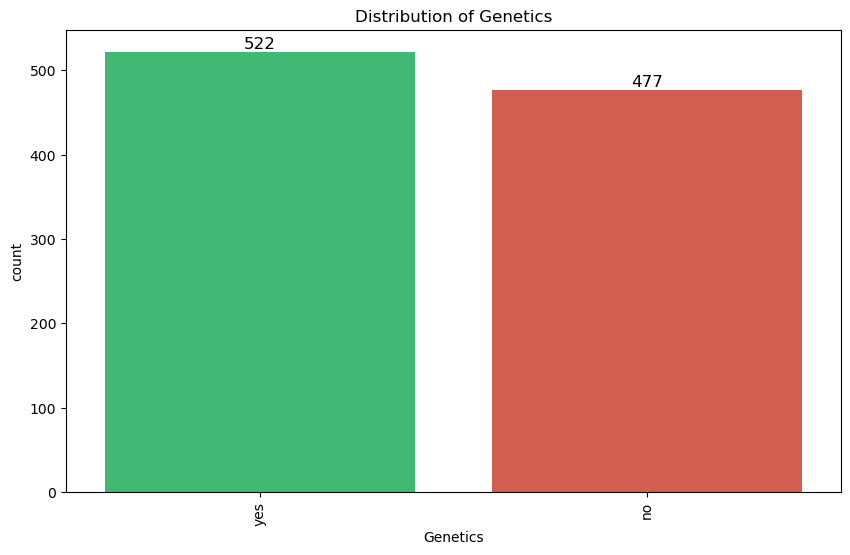

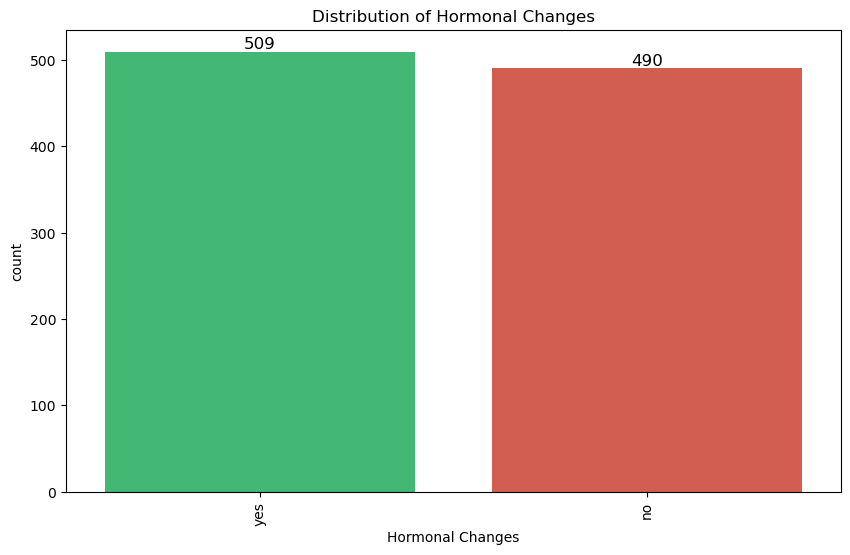

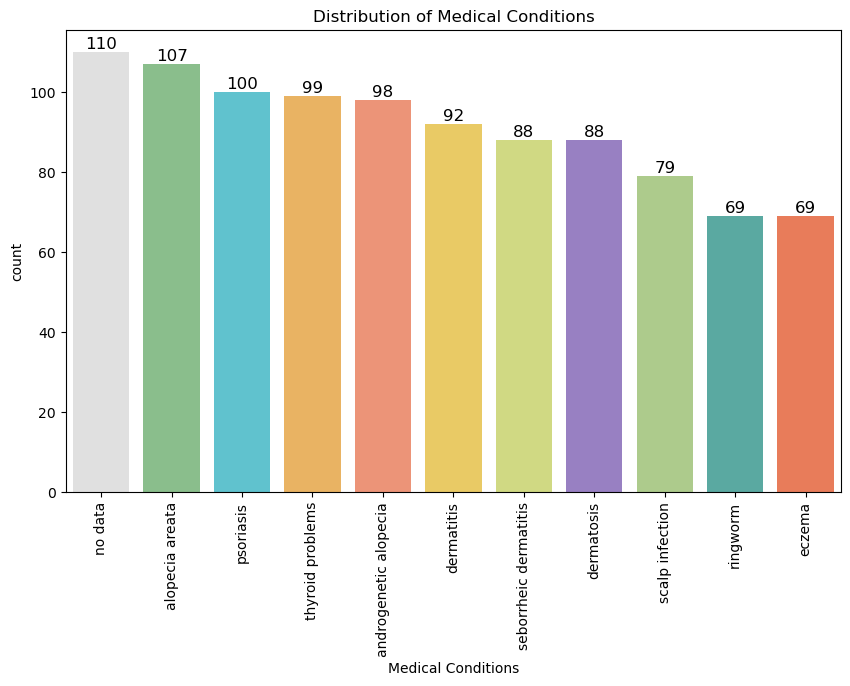

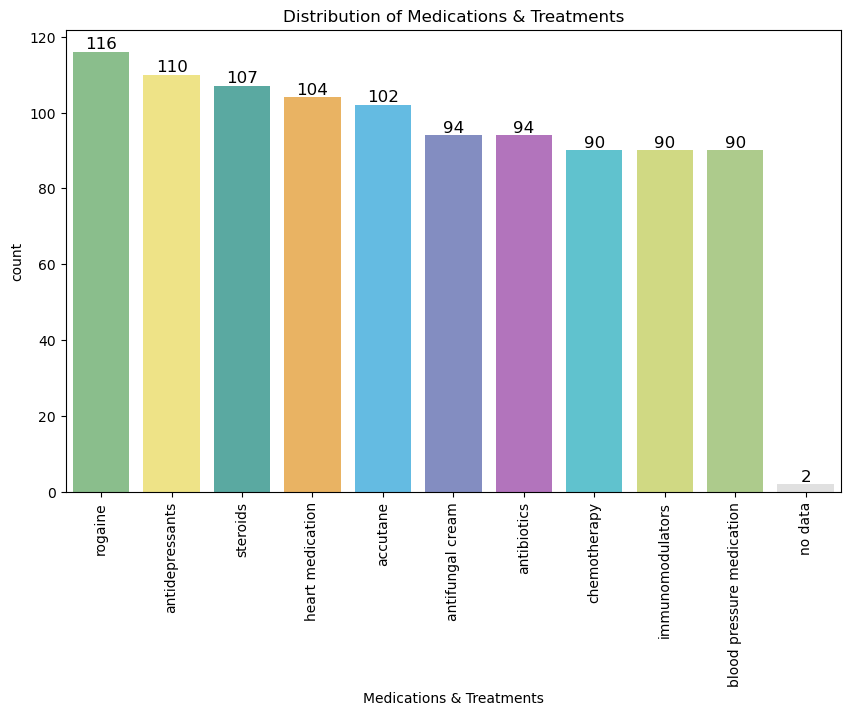

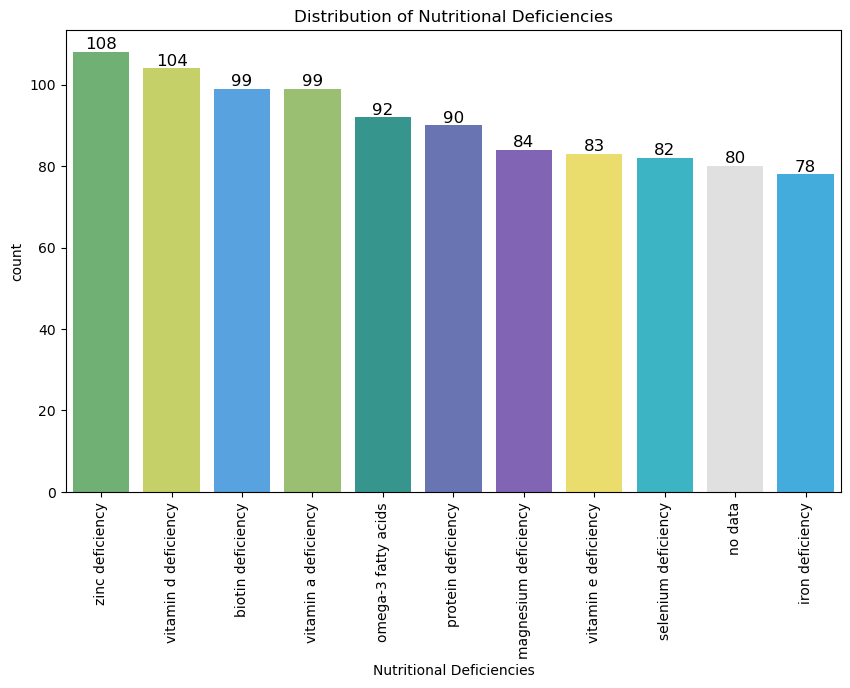

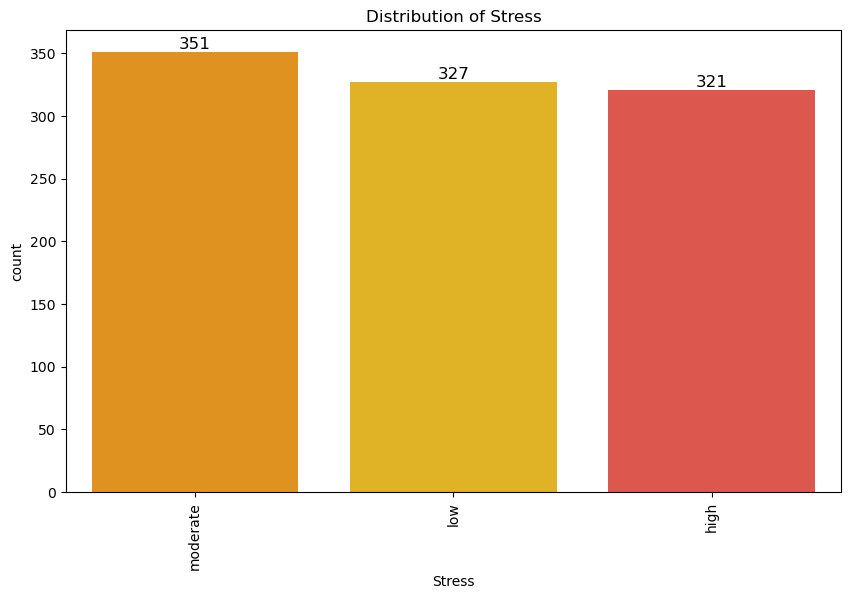

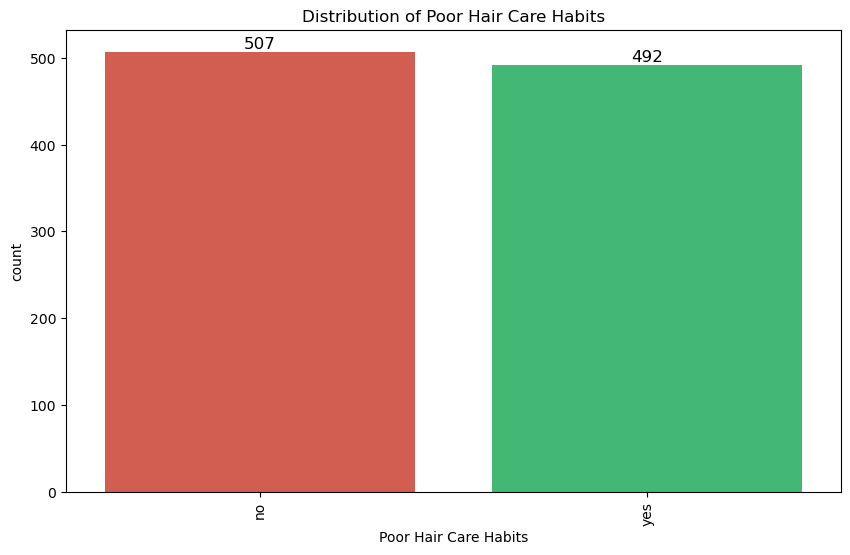

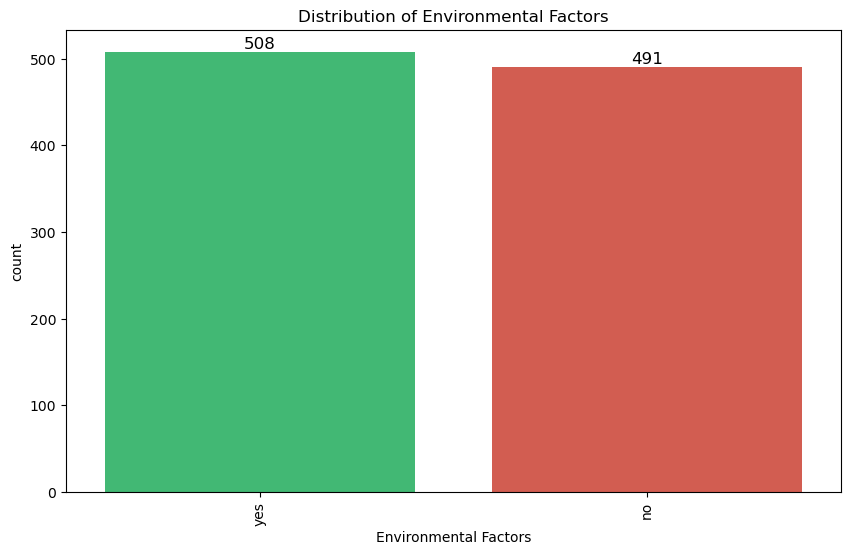

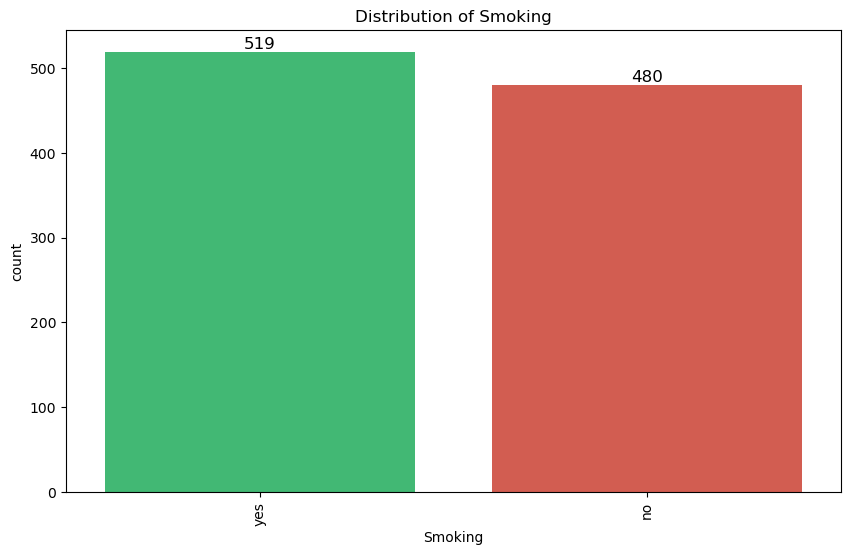

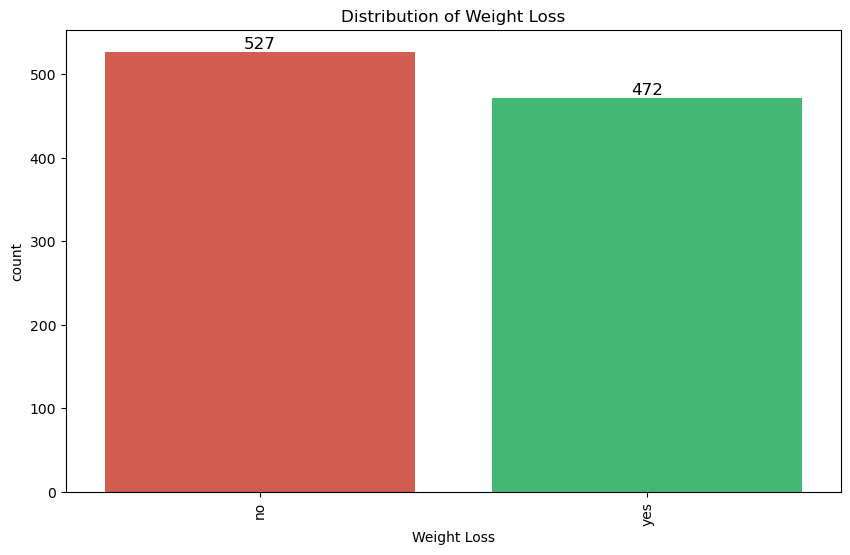

In [7]:
# plot their distribution
for column in data.columns:
    if (data[column].dtype != 'int64') and (data[column].dtype != 'float64'):
        plt.figure(figsize=(10, 6))
        sns.countplot(x=data[column], palette=color_palettes.get(column, None), order=data[column].value_counts().index)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=90)
        # Write count of each bar
        for p in plt.gca().patches:
            plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                          fontsize=12, color='black', ha='center', va='bottom')
        plt.show()


In [8]:
# Please replace 'No Data' values with np.nan in all columns
data = data.replace('no data', np.nan)
# count nan values in each column
data.isnull().sum()


Id                            0
Genetics                      0
Hormonal Changes              0
Medical Conditions          110
Medications & Treatments      2
Nutritional Deficiencies     80
Stress                        0
Age                           0
Poor Hair Care Habits         0
Environmental Factors         0
Smoking                       0
Weight Loss                   0
Hair Loss                     0
dtype: int64

* Now, we can see there are some missing values because of 'No Data' values in some columns.
* Actual missing values are in 'Medical Conditions' and 'Nutritional Deficiencies' columns are represented above.

## LEVEL 1: DESCRIPTIVE STATISTICS

Average age in the dataset: 34.0



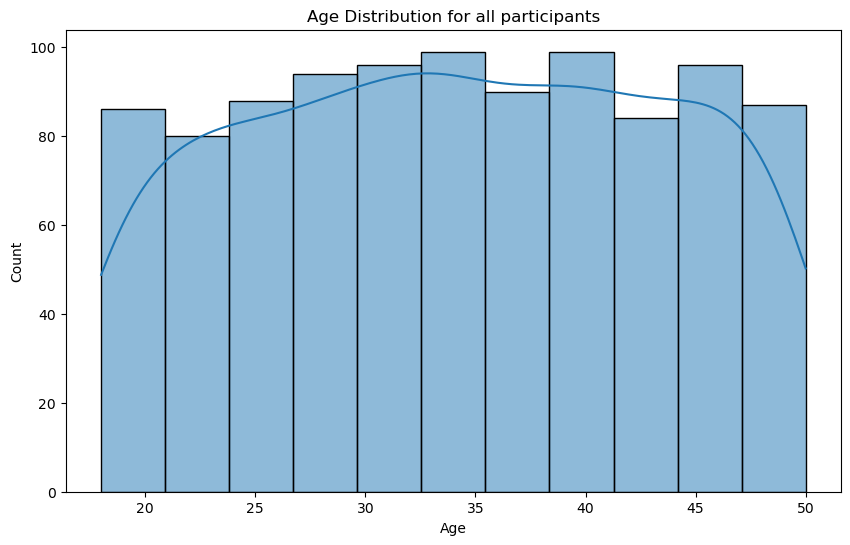

Average age in the dataset without hair loss: 35.0
Average age in the dataset with hair loss: 34.0



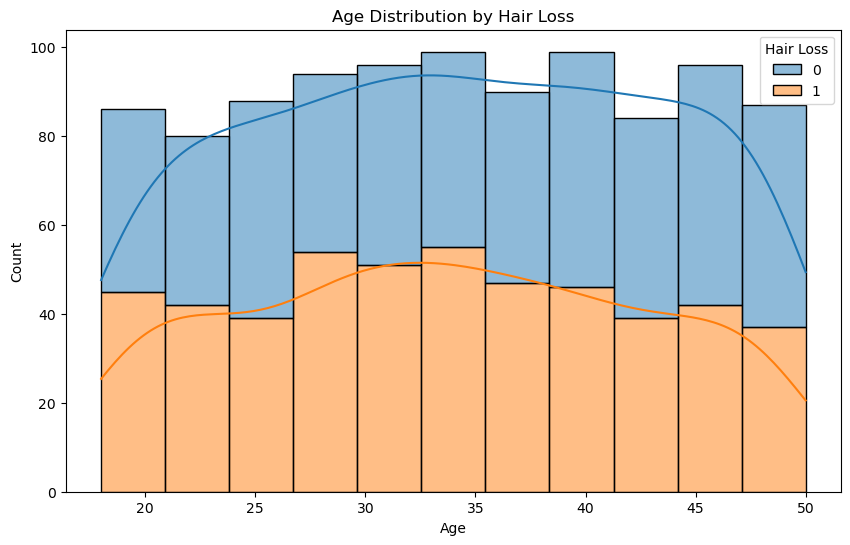

Average age in the dataset with low stress level: 34.0
Average age in the dataset with moderate stress level: 34.0
Average age in the dataset with high stress level: 34.0



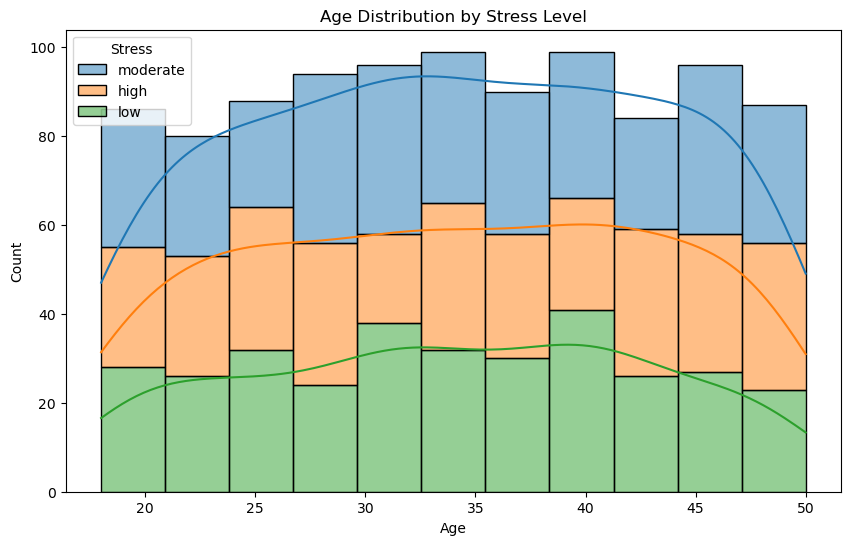

In [9]:
# It can be answered because there is no missing & duplicated value in 'Age' column.capitalize
# 1. What is the average age? What is the age distribution?
# Get age average of all participants
average_age = data['Age'].mean()
print(f"Average age in the dataset: {np.round(average_age)}\n")

#Plot all age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution for all participants')
plt.show()

# ------------------------------------------------------------------------------------------------

# Get average age by hair loss
average_age_by_hair_loss = data.groupby('Hair Loss')['Age'].mean()
print(f"Average age in the dataset without hair loss: {np.round(average_age_by_hair_loss[0])}")
print(f"Average age in the dataset with hair loss: {np.round(average_age_by_hair_loss[1])}\n")

# Plot age distribution by hair loss
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Hair Loss', multiple='stack', kde=True)
plt.title('Age Distribution by Hair Loss')
plt.show()

# ------------------------------------------------------------------------------------------------

# Get average age by stress level
average_age_by_stress = data.groupby('Stress')['Age'].mean()
print(f"Average age in the dataset with low stress level: {np.round(average_age_by_stress[0])}")
print(f"Average age in the dataset with moderate stress level: {np.round(average_age_by_stress[1])}")
print(f"Average age in the dataset with high stress level: {np.round(average_age_by_stress[2])}\n")

# Get age distribution by stress level
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Stress', multiple='stack', kde=True)
plt.title('Age Distribution by Stress Level')
plt.show()

The most common medical conditions:
alopecia areata          107
psoriasis                100
thyroid problems          99
androgenetic alopecia     98
dermatitis                92
seborrheic dermatitis     88
dermatosis                88
scalp infection           79
ringworm                  69
eczema                    69
Name: Medical Conditions, dtype: int64



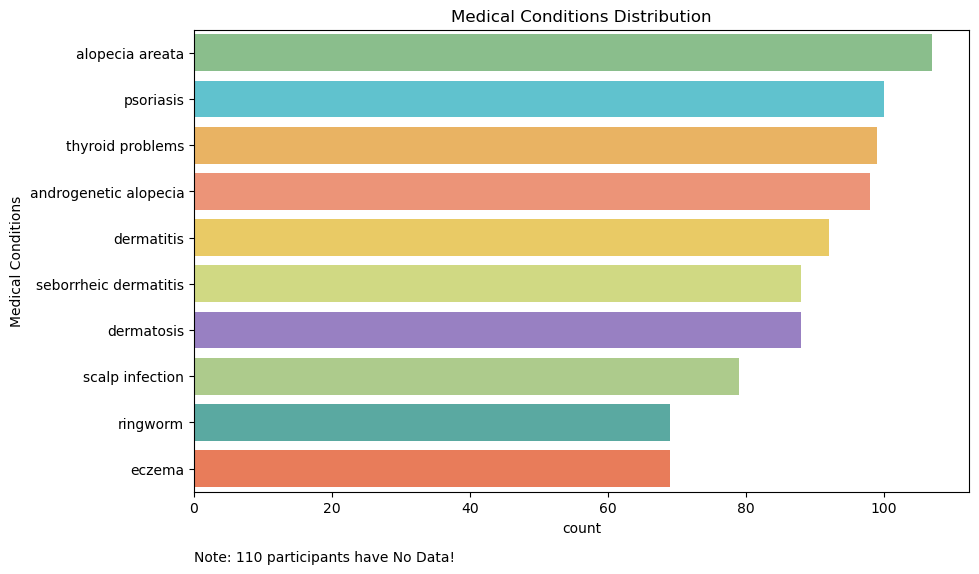

The most three common medical conditions are:
alopecia areata
psoriasis
thyroid problems

These conditions are written to top_three_medical_conditions list


In [10]:
# 2. Which medical conditions are the most common? How often do they occur?
# Get the most common medical conditions
top_three_medical_conditions = []
medical_conditions_counts = data['Medical Conditions'].value_counts()
print(f"The most common medical conditions:\n{medical_conditions_counts}\n")

# Plot the most common medical conditions
plt.figure(figsize=(10, 6))
# Filter out 'No Data' and plot remaining conditions
data_filtered = data[data['Medical Conditions'] != 'No Data']
sns.countplot(y=data_filtered['Medical Conditions'], 
              palette=color_palettes['Medical Conditions'],
              order=data_filtered['Medical Conditions'].value_counts().index)
plt.title('Medical Conditions Distribution')

num_of_no_data = data['Medical Conditions'].isna().sum()

plt.text(0, 11, f'Note: {num_of_no_data} participants have No Data!', fontsize=10)
plt.show()

print("The most three common medical conditions are:")
for condition in medical_conditions_counts.index[:3]:
    print(condition)
    top_three_medical_conditions.append(condition)
print("\nThese conditions are written to top_three_medical_conditions list")

In [11]:
# Get the most common medical conditions specifications

for condition in top_three_medical_conditions:
    print(f"\n{condition.title()} specifications:")
    # Get columns excluding Id and Medical Conditions
    cols_to_analyze = [col for col in data.columns if col not in ['Id', 'Medical Conditions']]
    
    for col in cols_to_analyze:
        col_counts = data[data['Medical Conditions'] == condition][col].value_counts()
        if not col_counts.empty:
            print(f"{col}: {col_counts.index[0]}")


Alopecia Areata specifications:
Genetics: no
Hormonal Changes: yes
Medications & Treatments: accutane
Nutritional Deficiencies: biotin deficiency
Stress: moderate
Age: 30
Poor Hair Care Habits: no
Environmental Factors: no
Smoking: no
Weight Loss: no
Hair Loss: 1

Psoriasis specifications:
Genetics: yes
Hormonal Changes: no
Medications & Treatments: blood pressure medication
Nutritional Deficiencies: vitamin a deficiency
Stress: moderate
Age: 29
Poor Hair Care Habits: no
Environmental Factors: yes
Smoking: yes
Weight Loss: yes
Hair Loss: 1

Thyroid Problems specifications:
Genetics: no
Hormonal Changes: no
Medications & Treatments: accutane
Nutritional Deficiencies: omega-3 fatty acids
Stress: moderate
Age: 33
Poor Hair Care Habits: yes
Environmental Factors: yes
Smoking: yes
Weight Loss: yes
Hair Loss: 0


In [12]:
# Get ids of participants who have the most three common medical conditions in a dictionary where key is the condition and value is a list of ids
medical_conditions_ids = {}
for condition in top_three_medical_conditions:
    medical_conditions_ids[condition] = data[data['Medical Conditions'] == condition]['Id'].tolist()

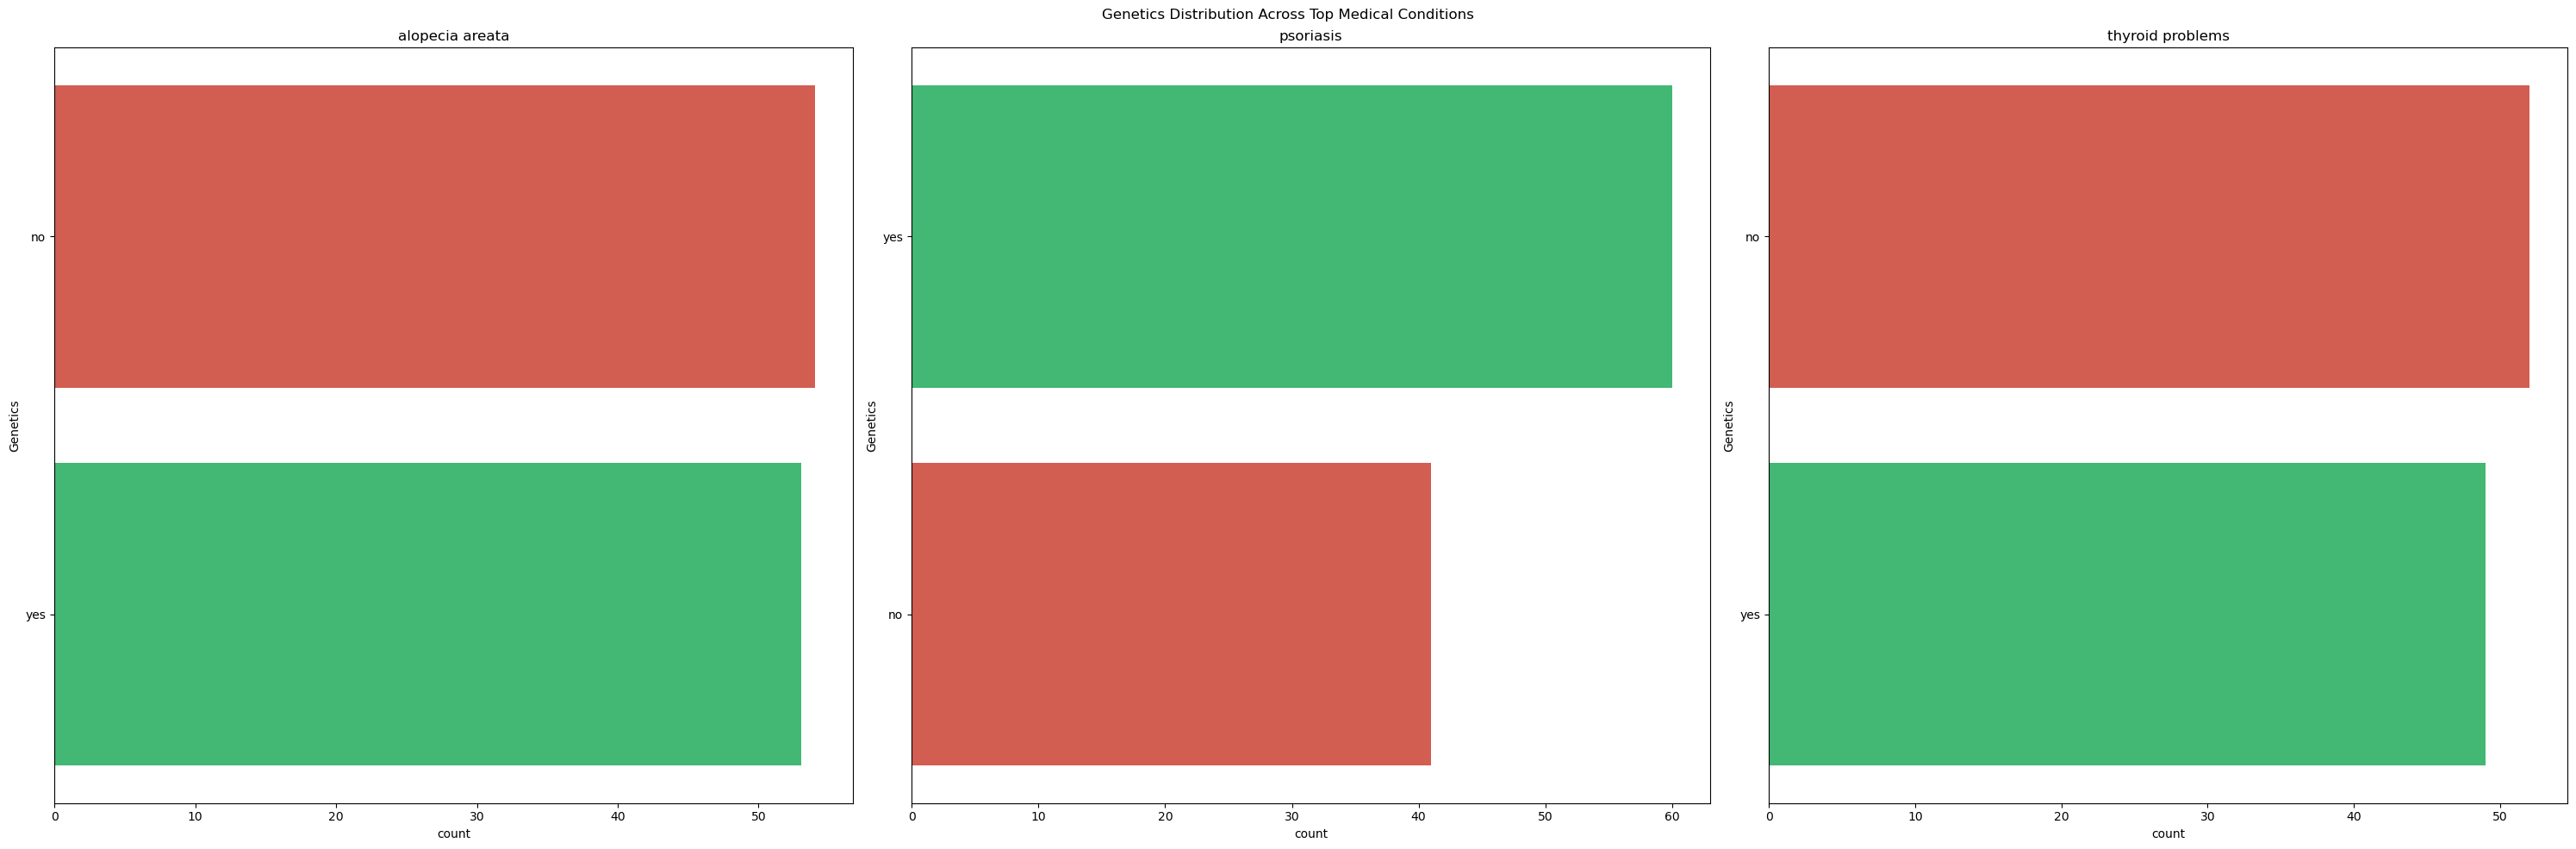

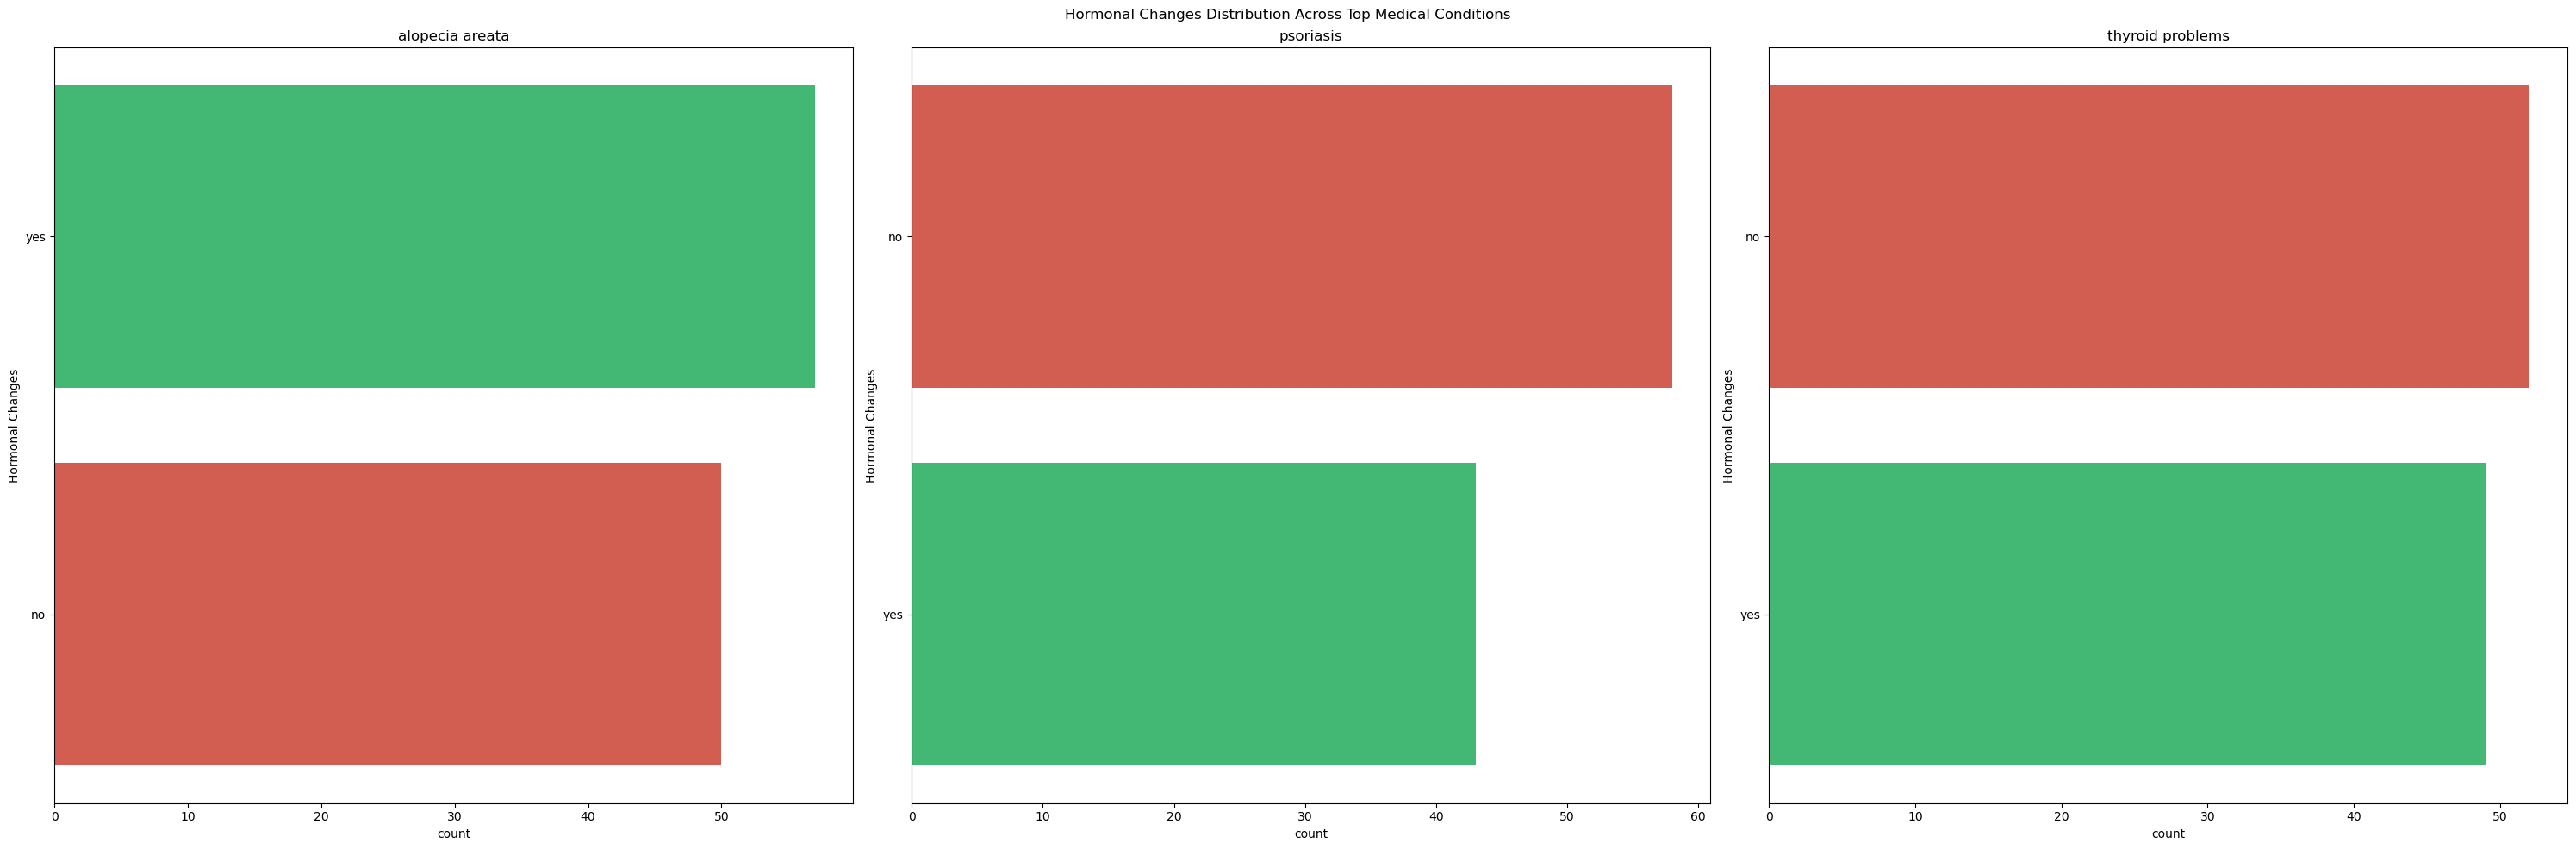

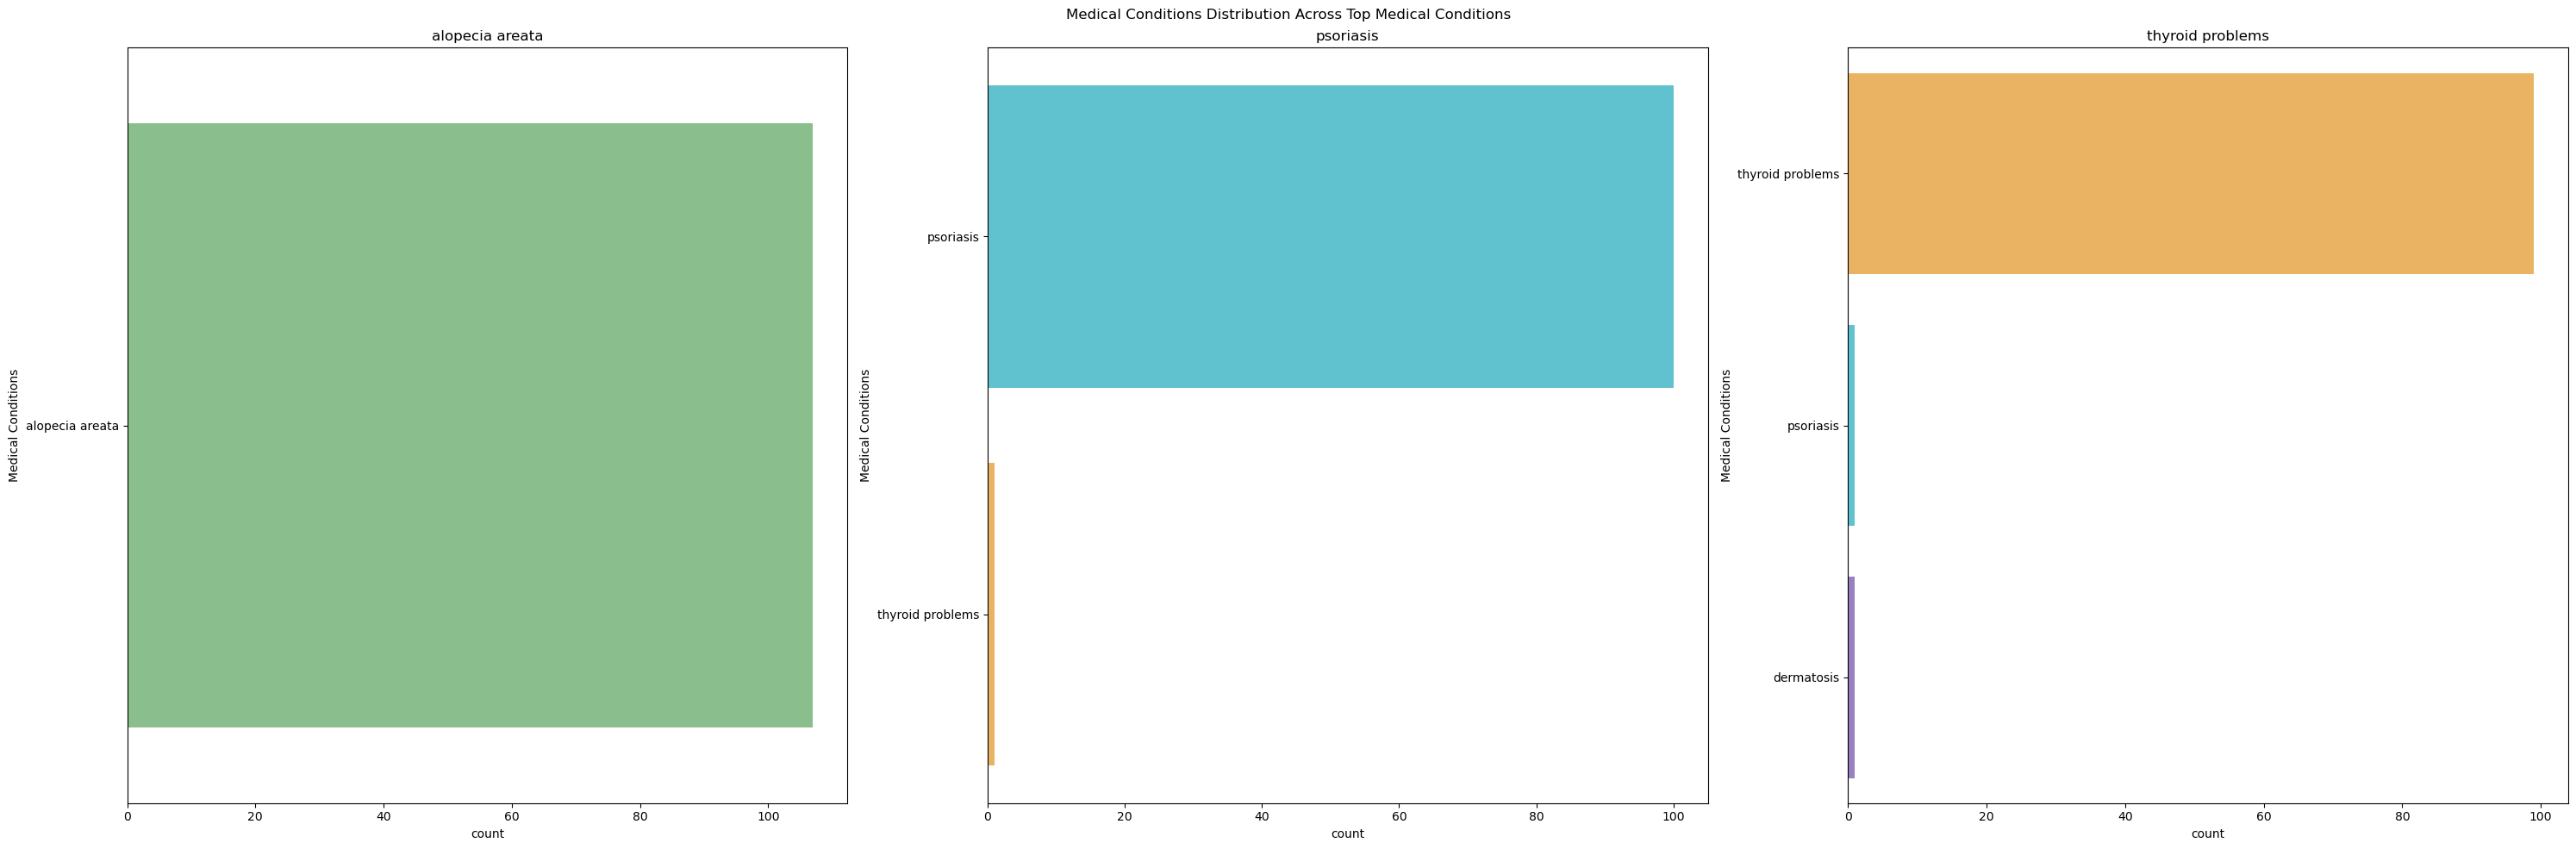

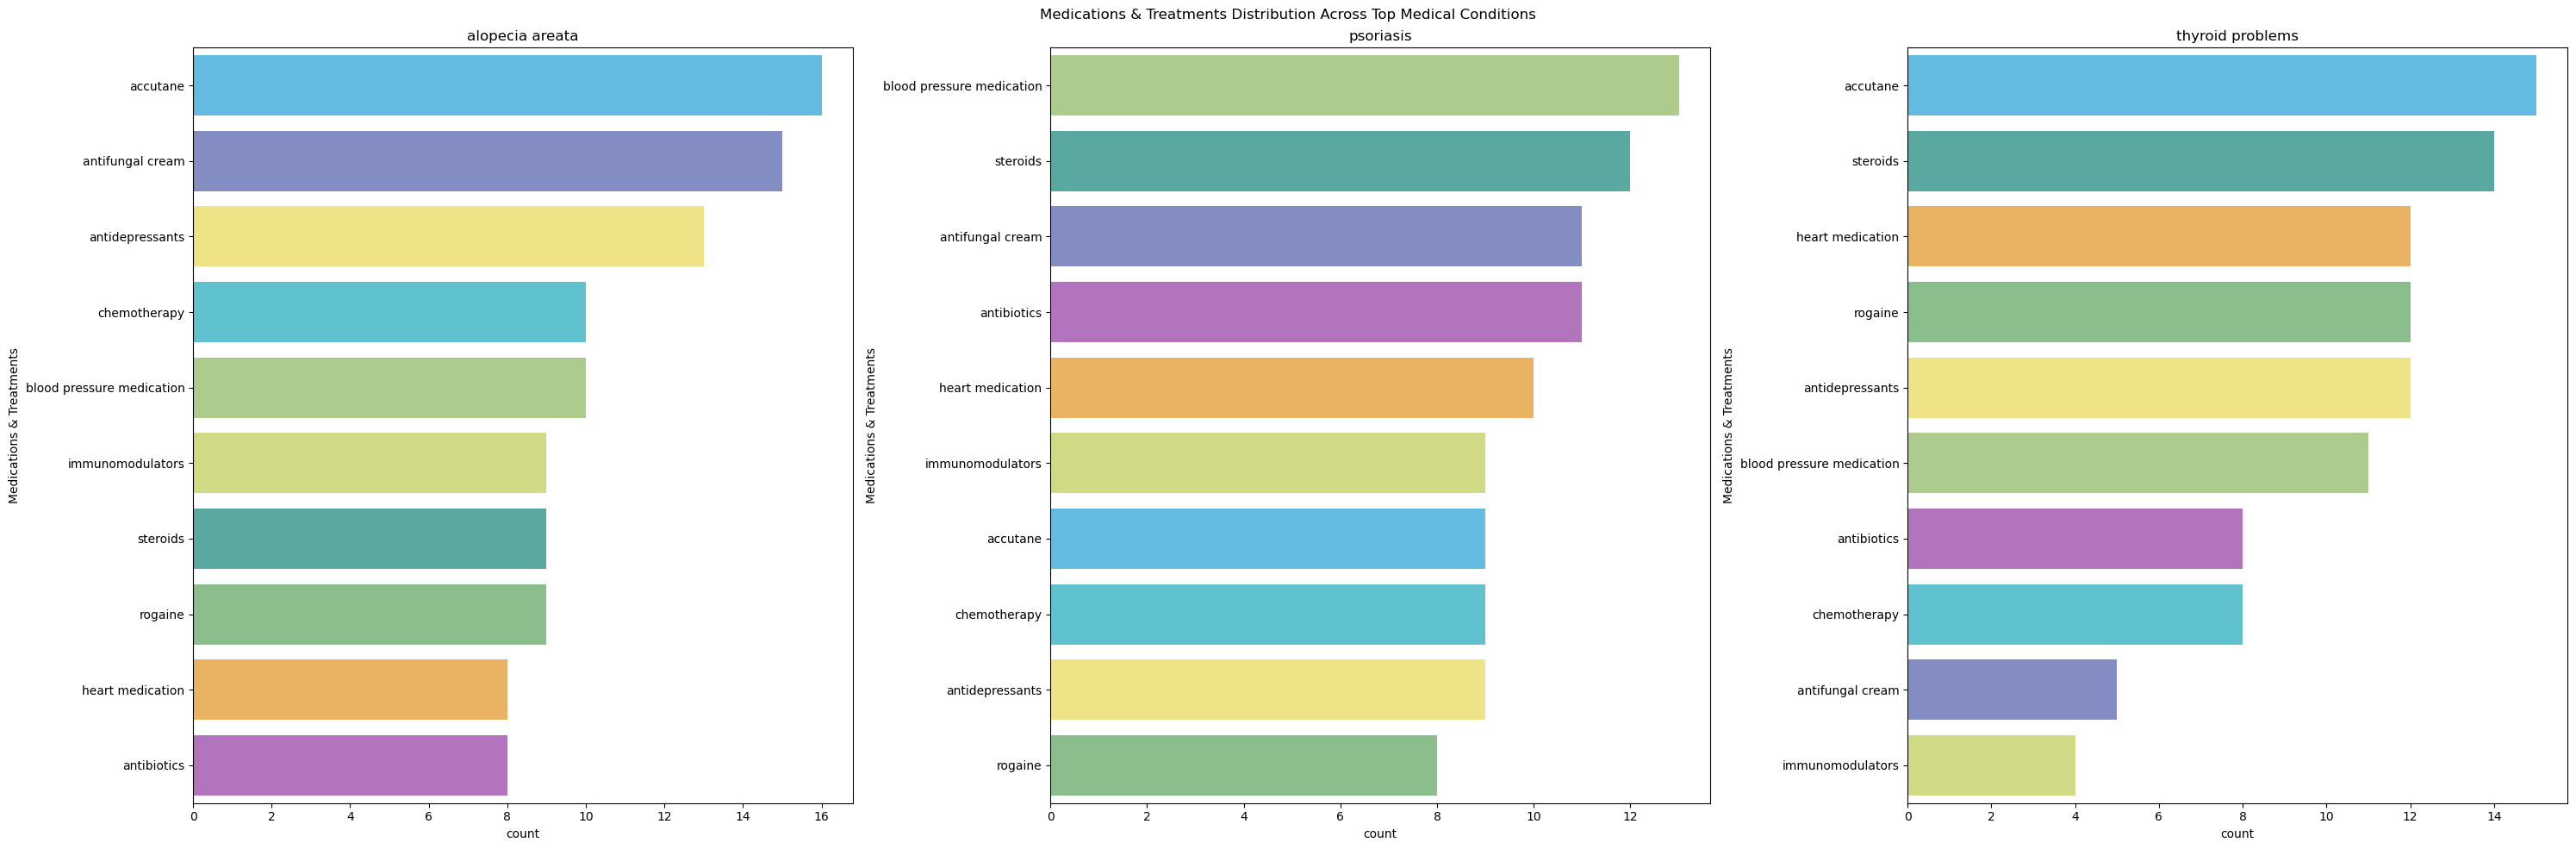

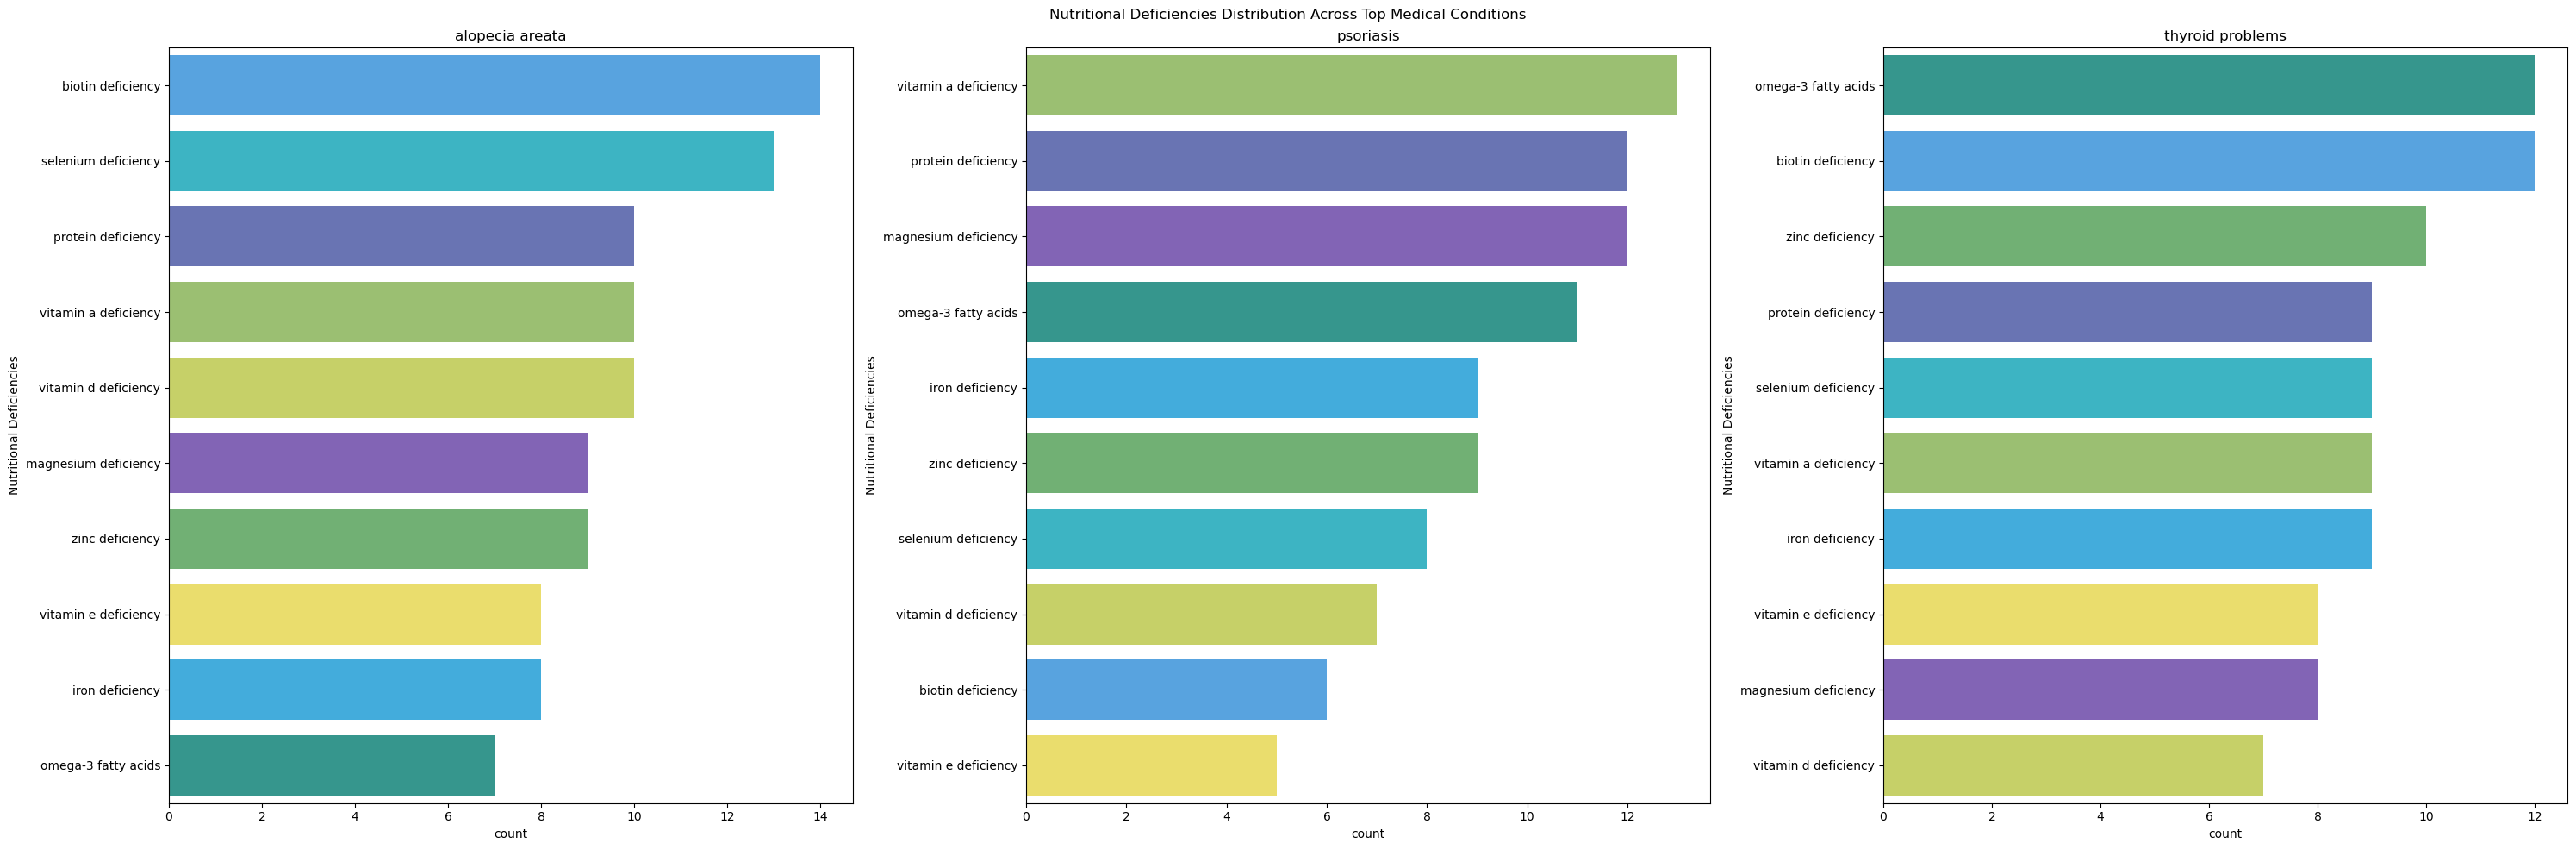

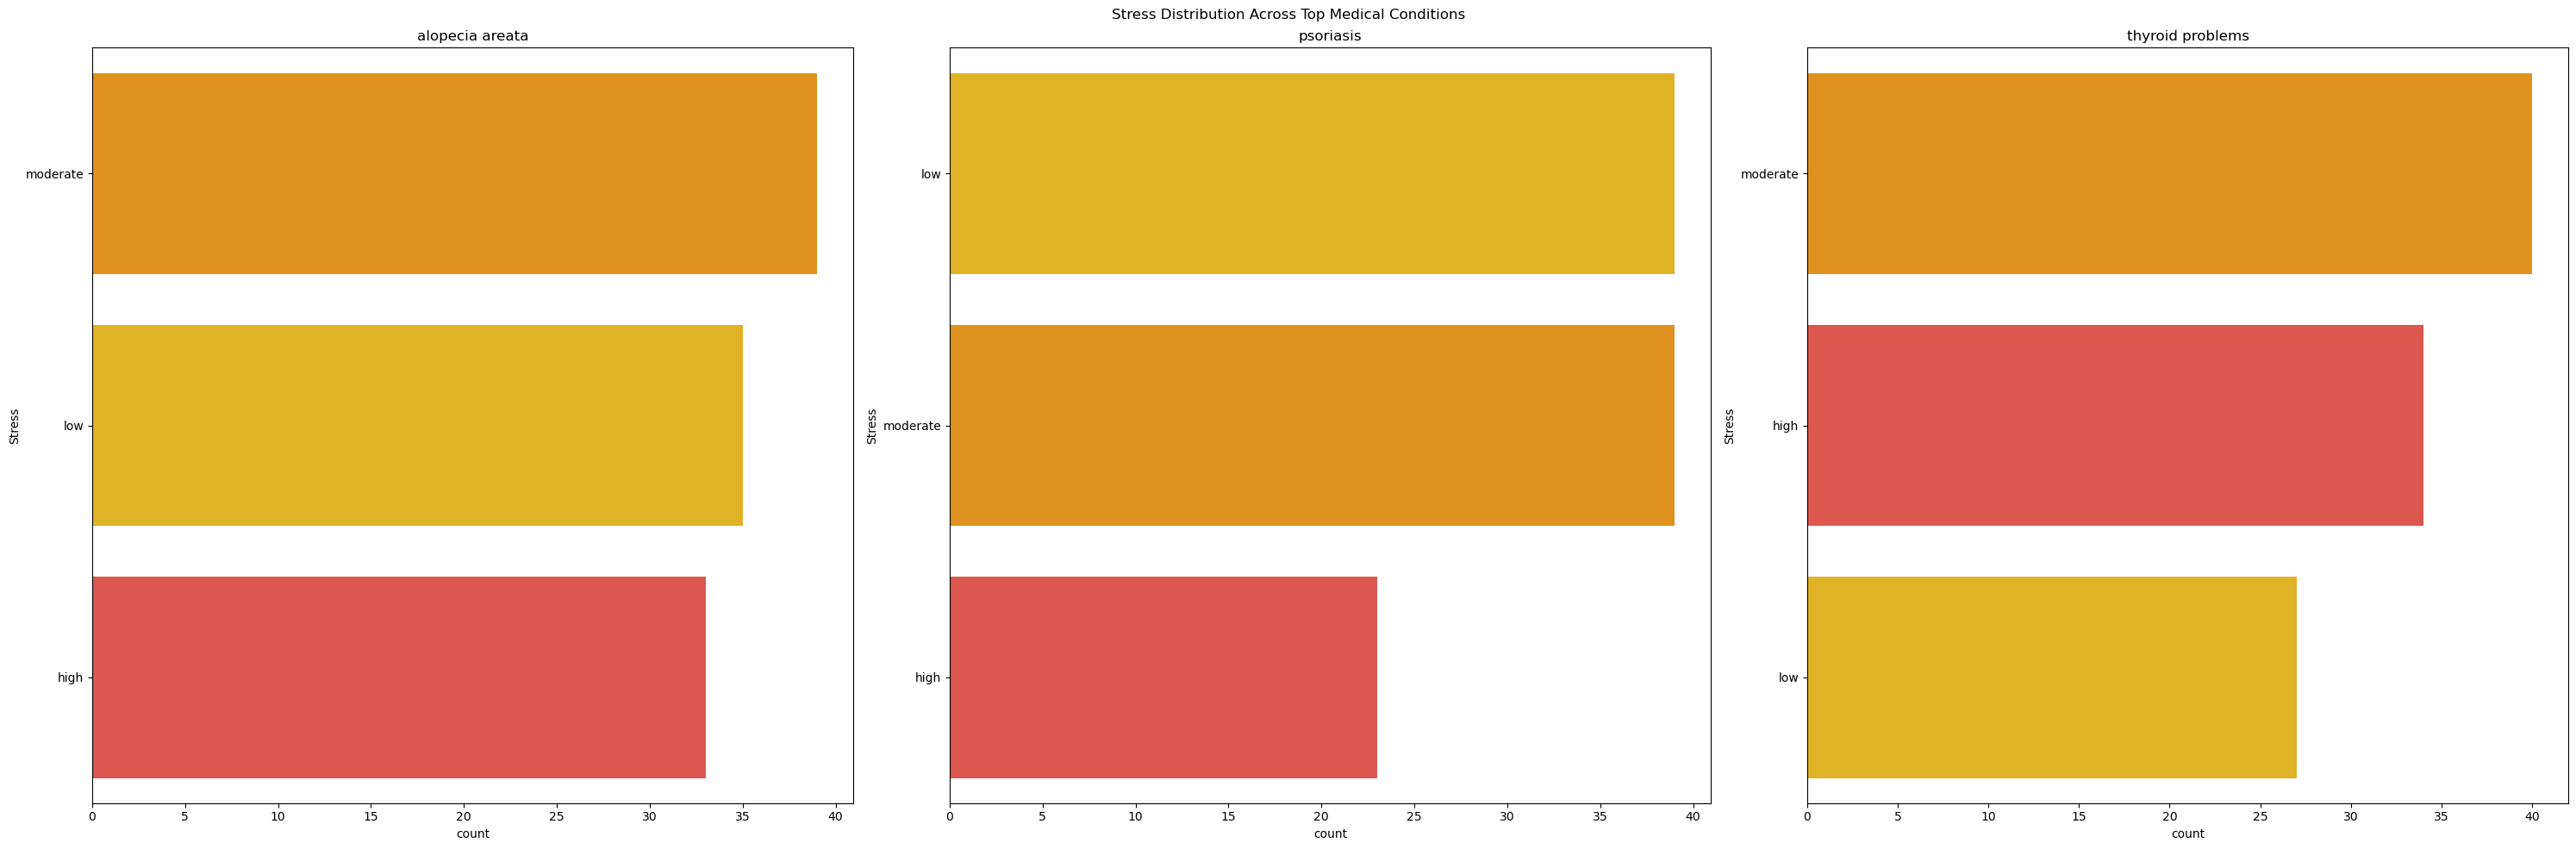

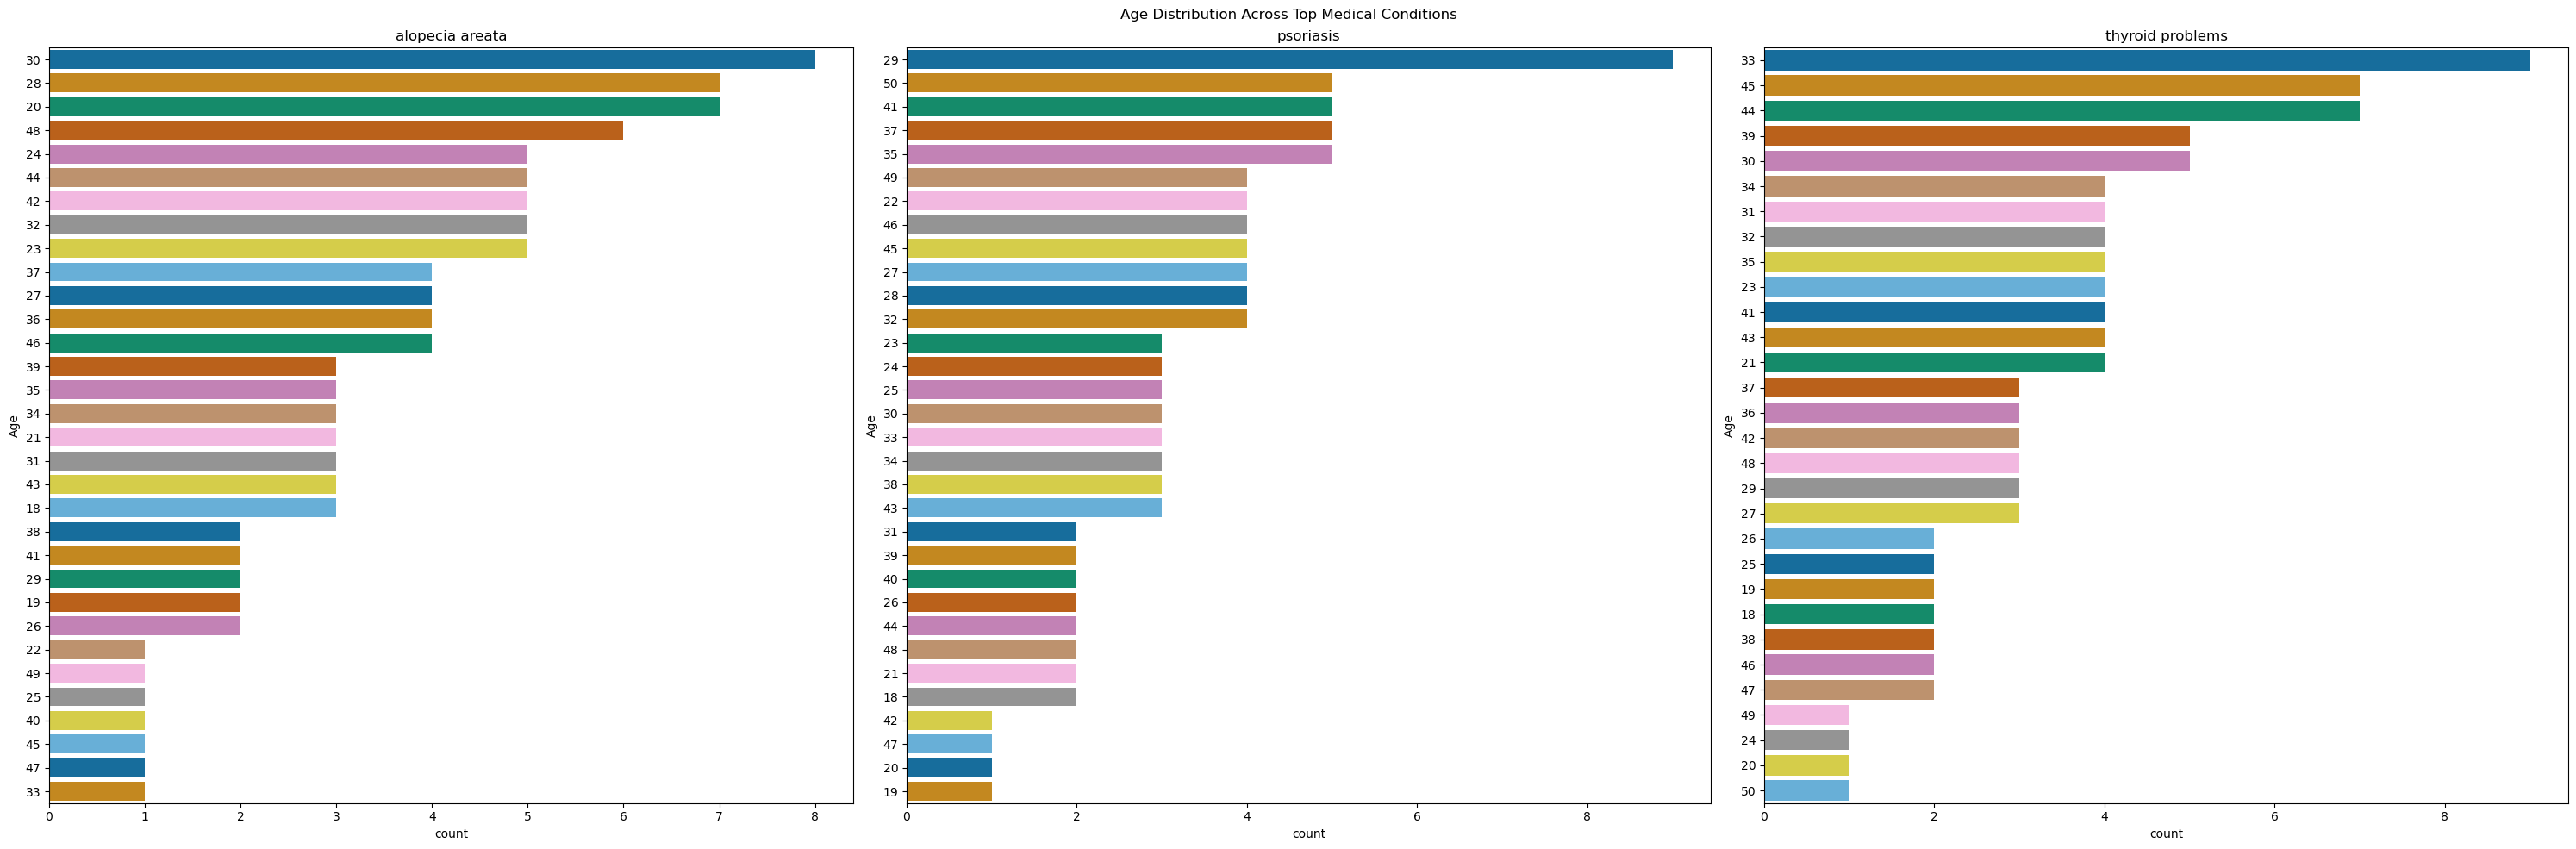

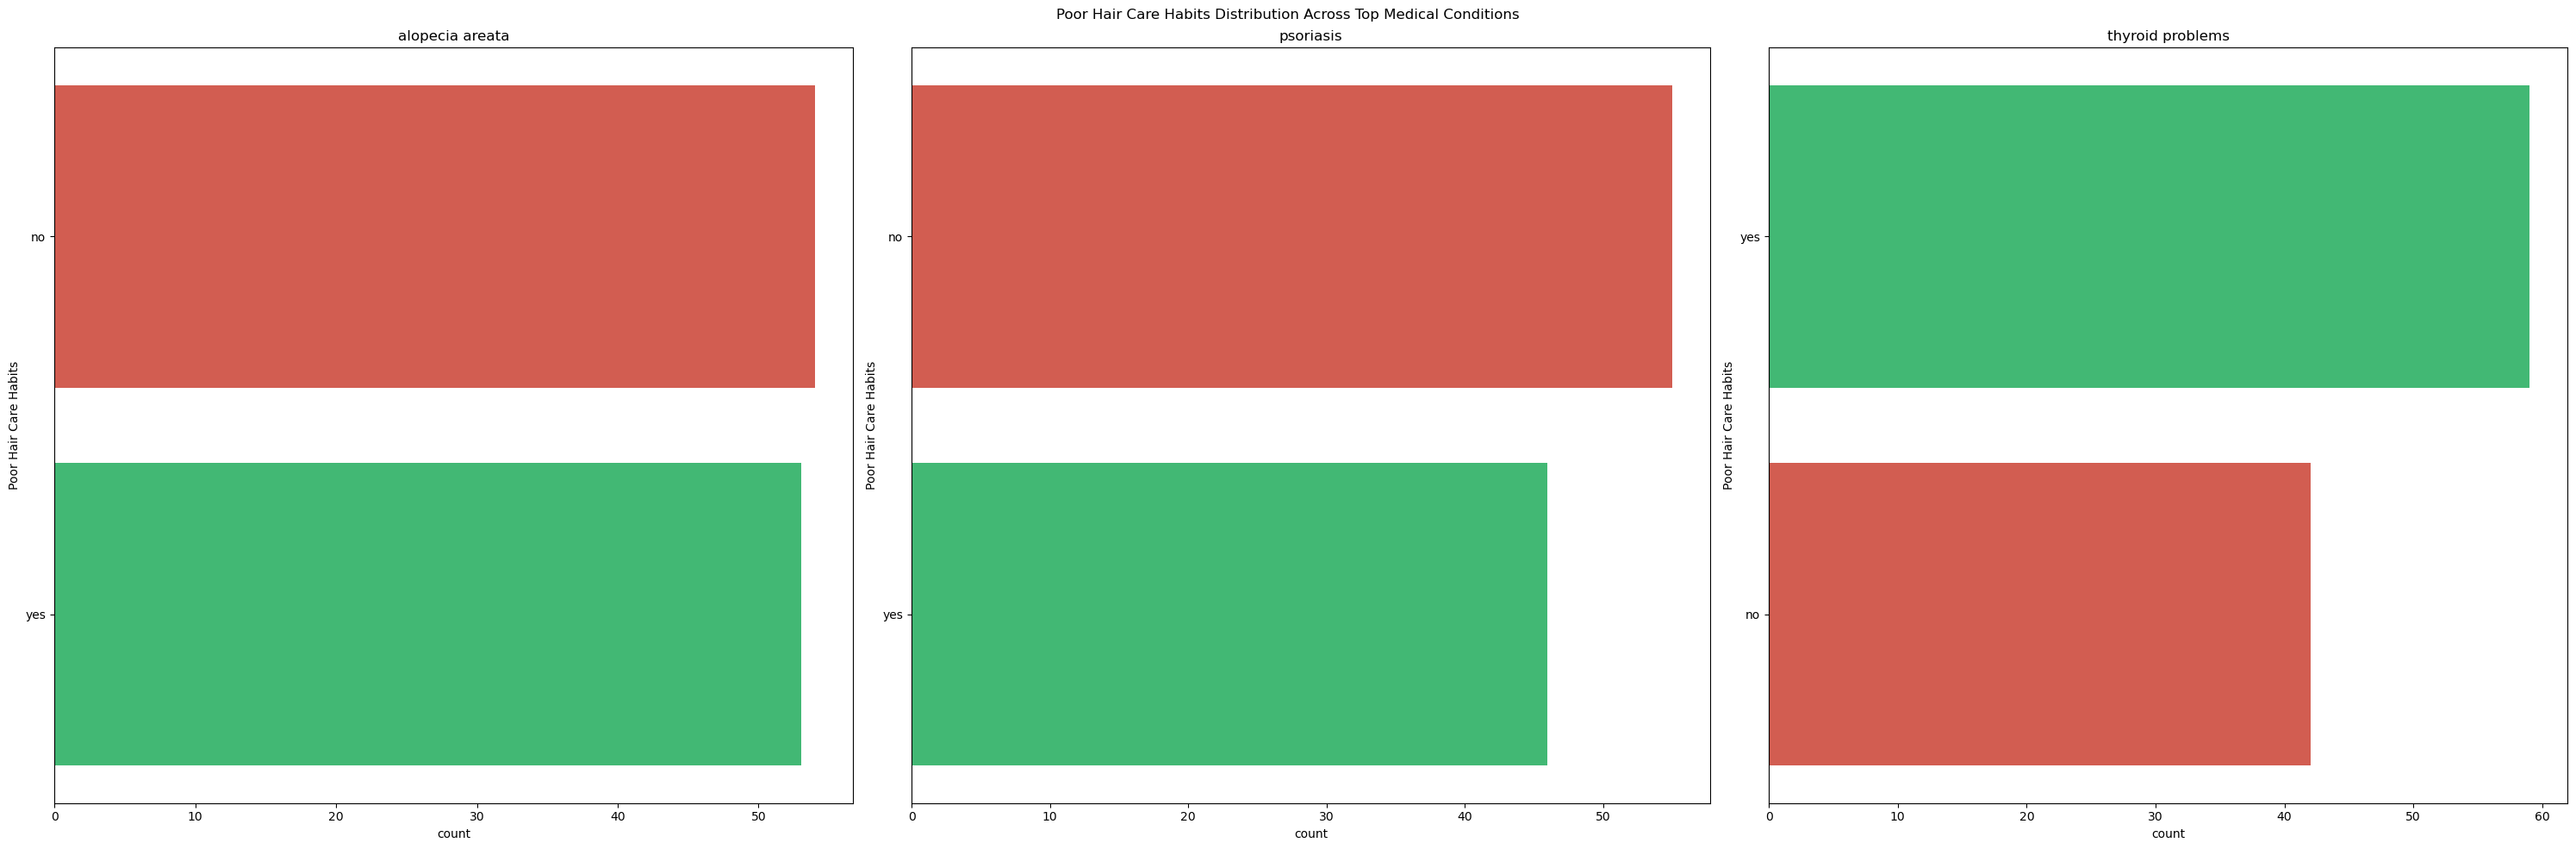

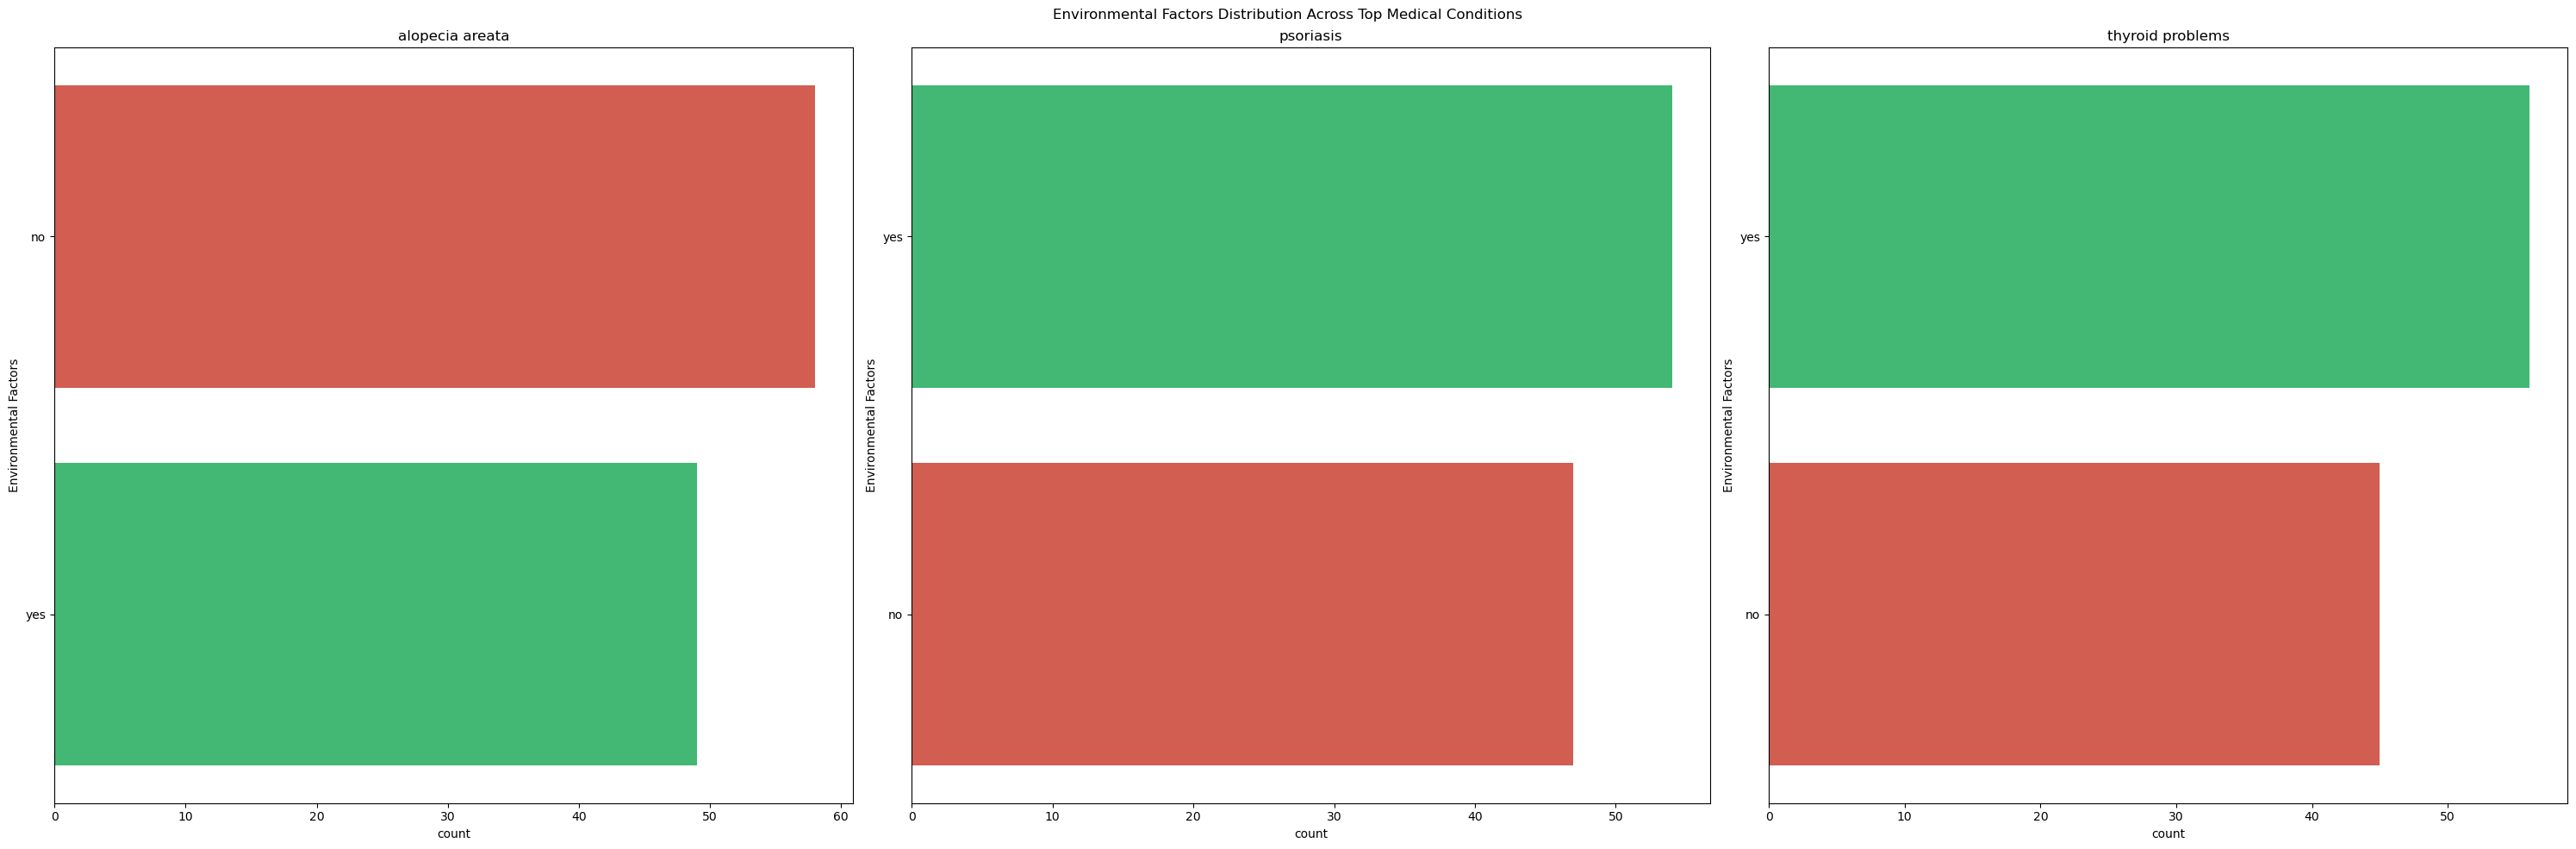

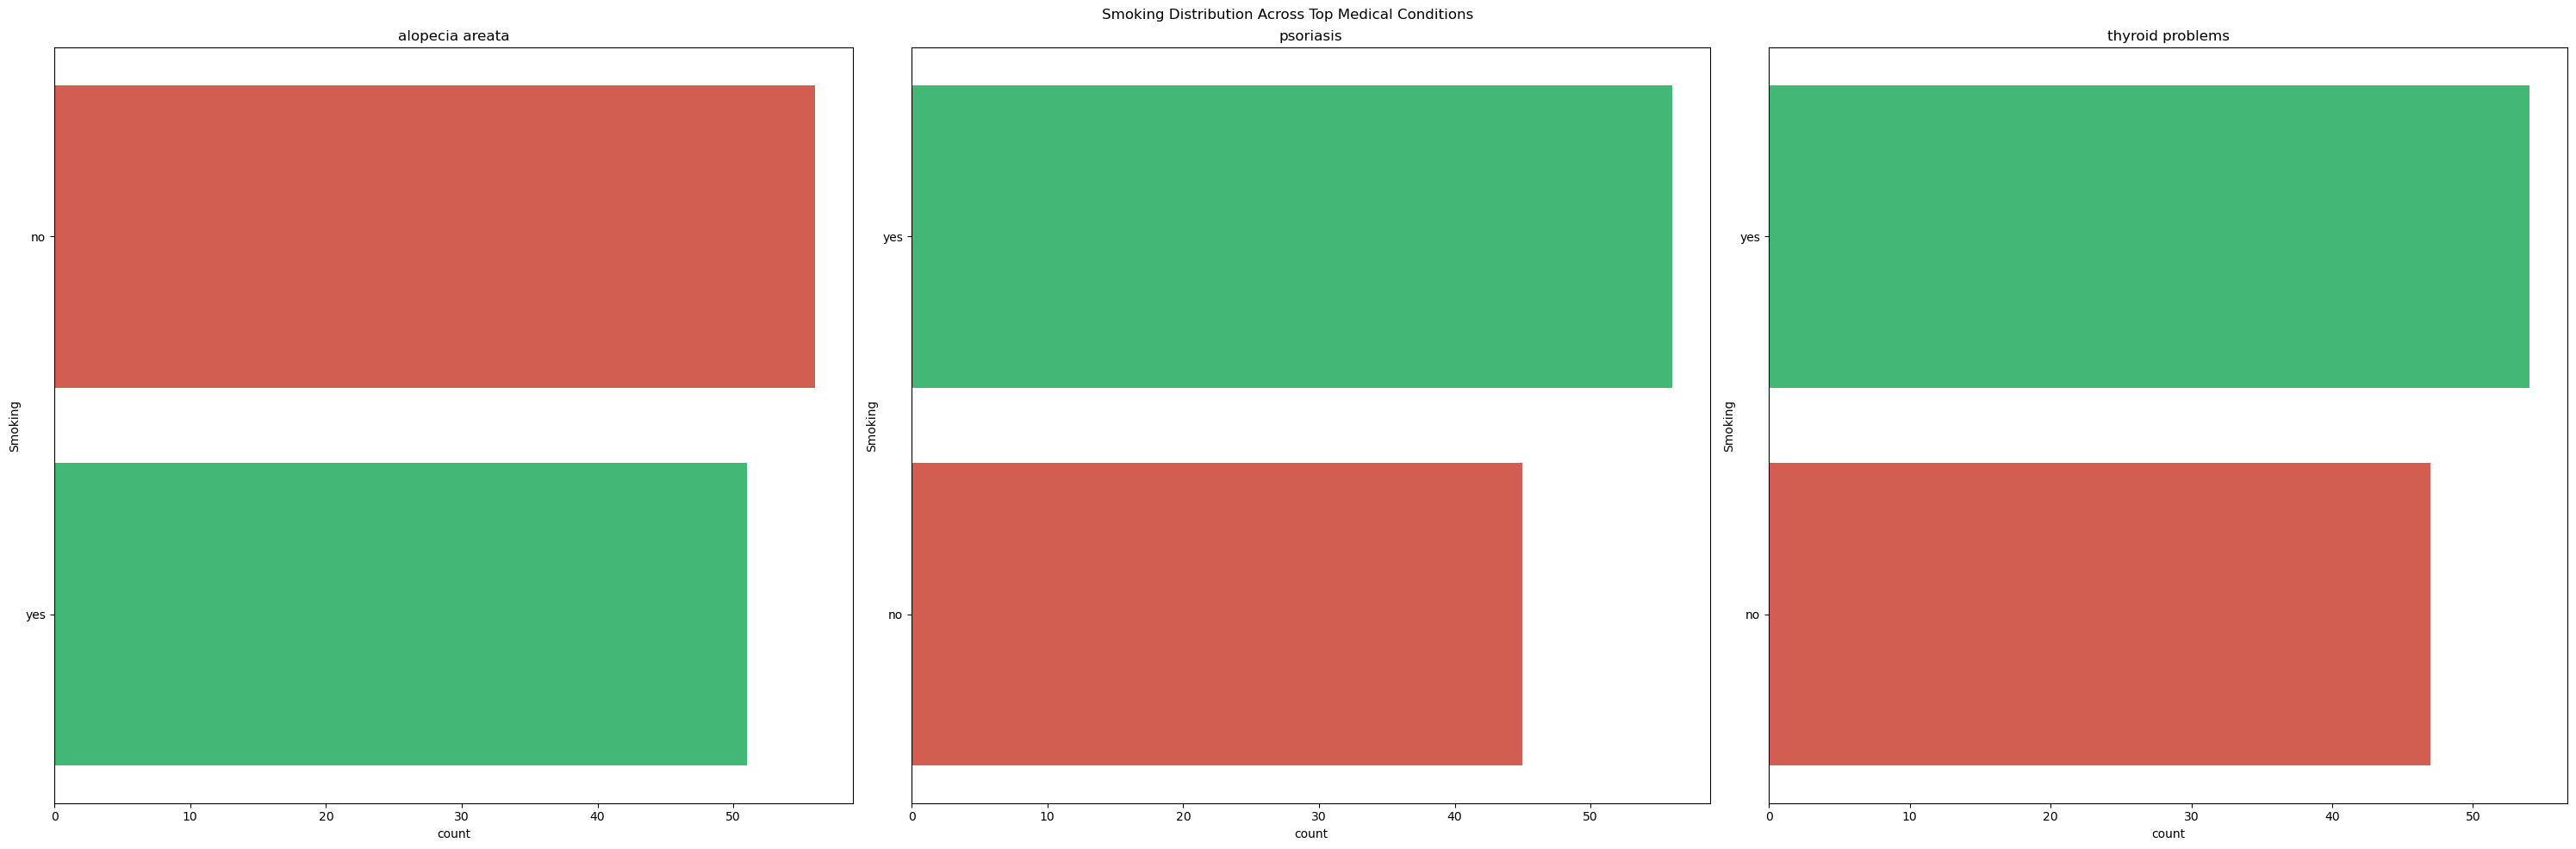

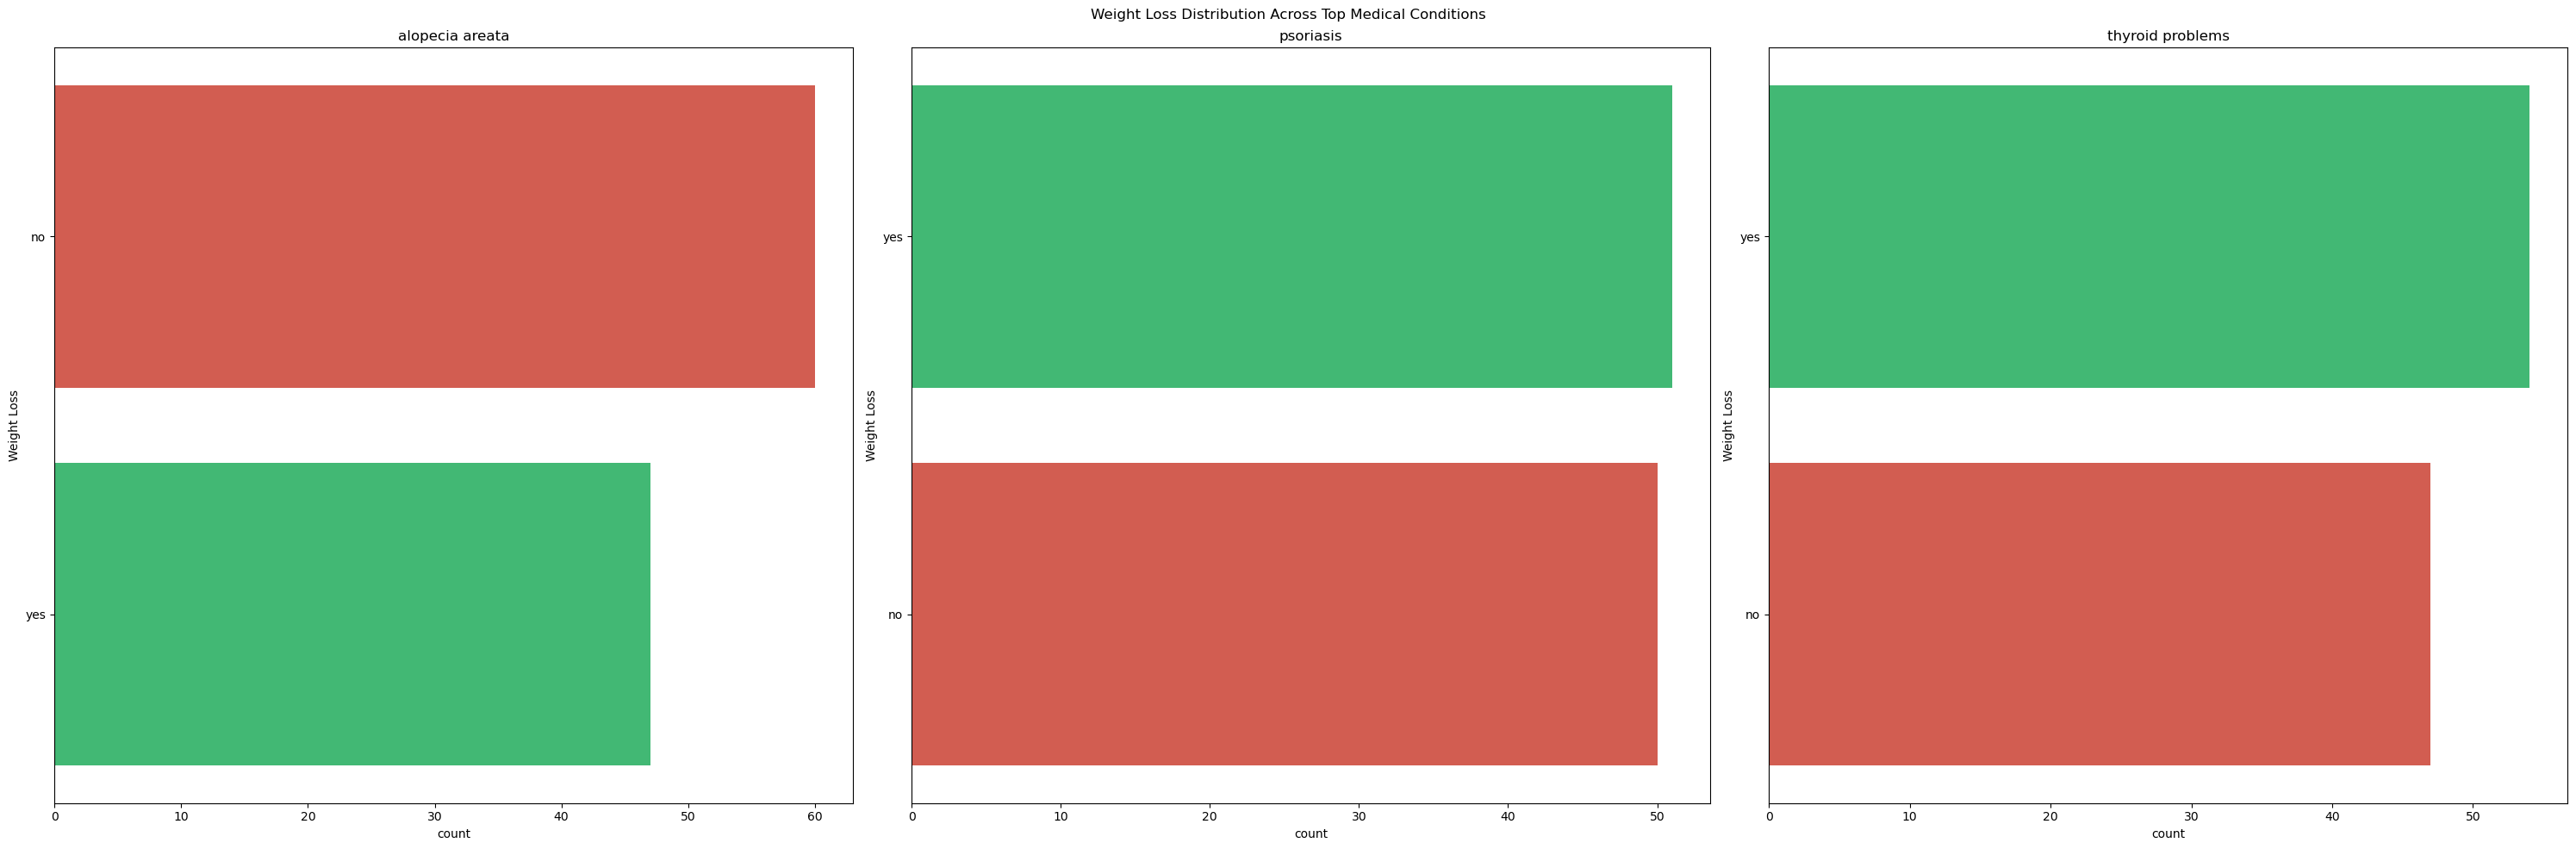

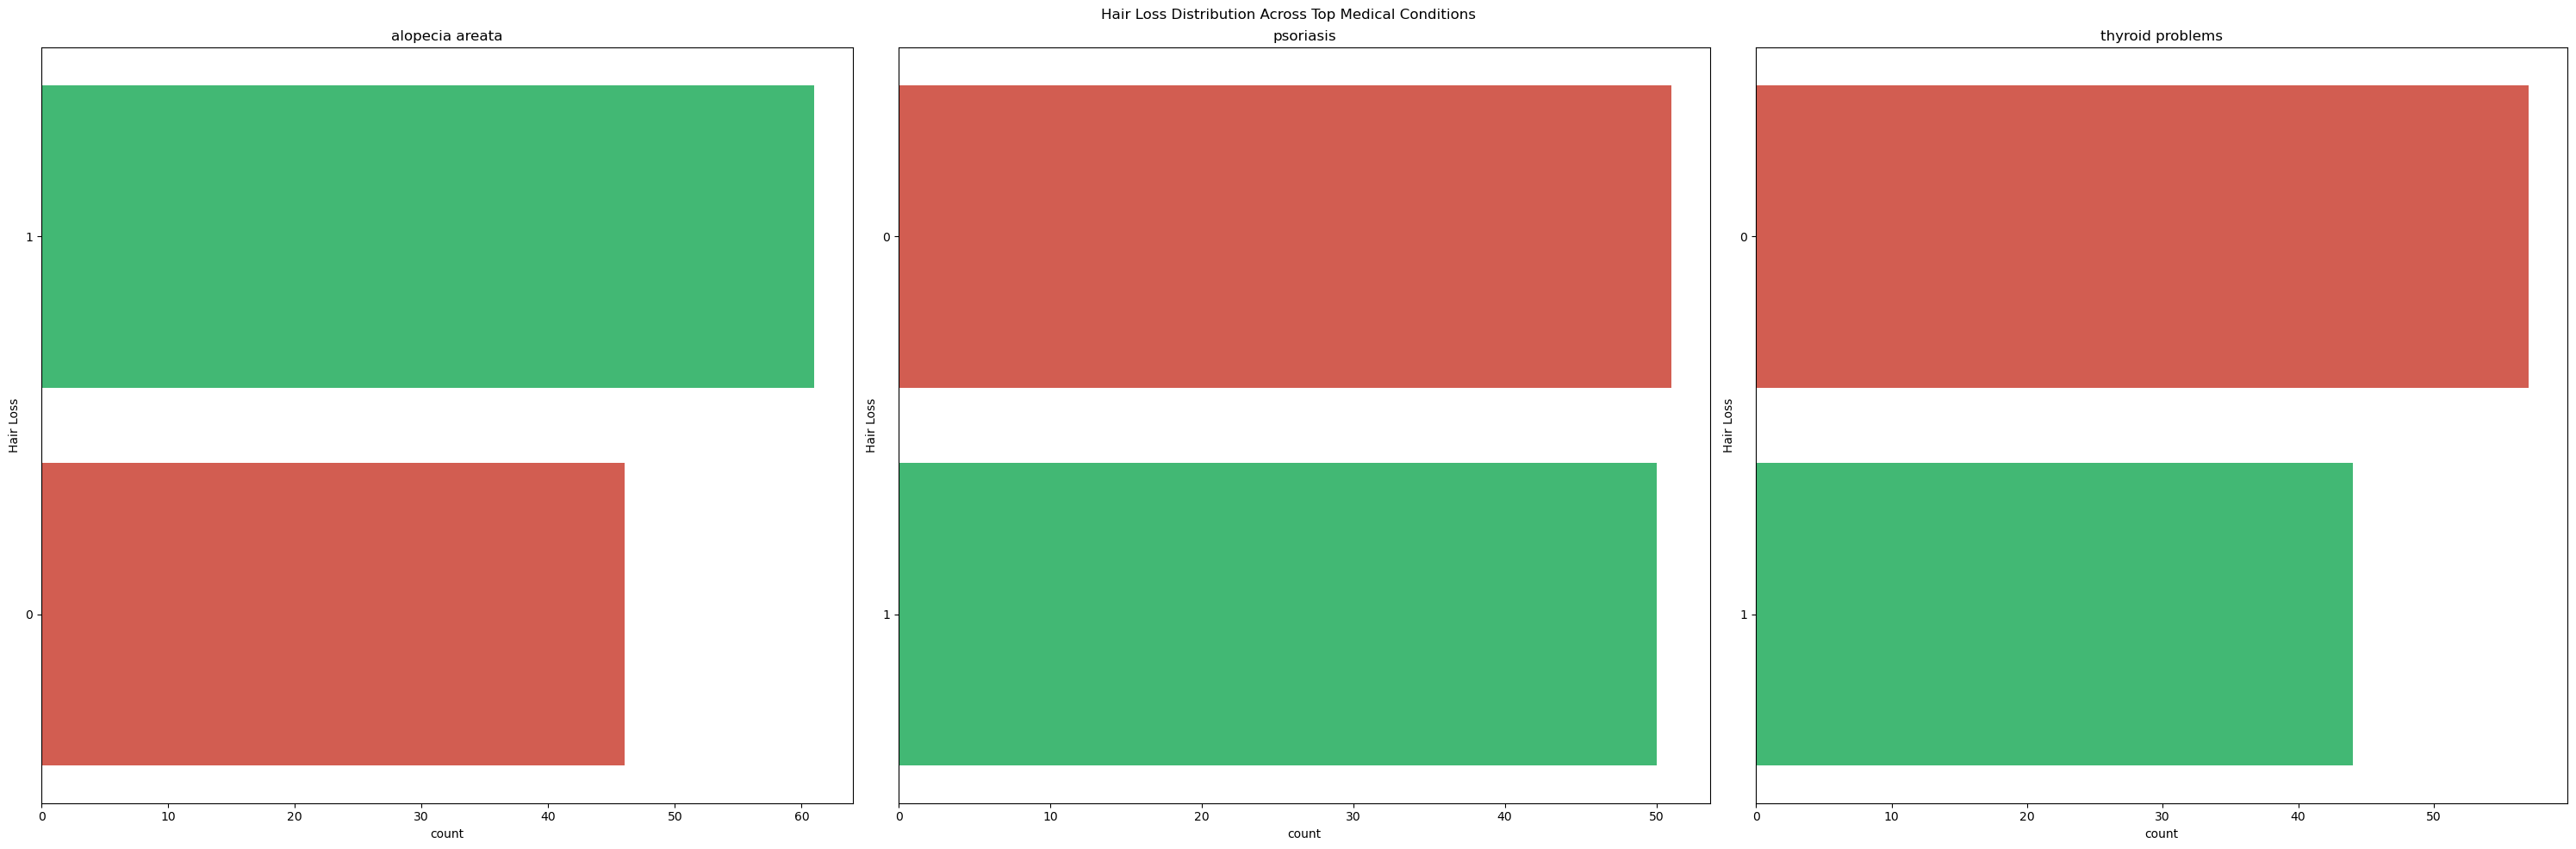

In [13]:
# Create a df for each condition and visualize their distributions for each column
# Create subplots for each column comparing all 3 conditions
for col in data.columns[1:]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
    fig.suptitle(f'{col} Distribution Across Top Medical Conditions')
    
    try:
        # Plot for first condition
        condition1_df = data[data['Id'].isin(medical_conditions_ids[top_three_medical_conditions[0]])]
        sns.countplot(y=condition1_df[col], 
                    order=condition1_df[col].value_counts().index, 
                    ax=ax1,
                    palette=color_palettes[col])
        ax1.set_title(top_three_medical_conditions[0])
        
        # Plot for second condition
        condition2_df = data[data['Id'].isin(medical_conditions_ids[top_three_medical_conditions[1]])]
        sns.countplot(y=condition2_df[col], 
                    order=condition2_df[col].value_counts().index, 
                    ax=ax2,
                    palette=color_palettes[col])
        ax2.set_title(top_three_medical_conditions[1])
        
        # Plot for third condition
        condition3_df = data[data['Id'].isin(medical_conditions_ids[top_three_medical_conditions[2]])]
        sns.countplot(y=condition3_df[col], 
                    order=condition3_df[col].value_counts().index, 
                    ax=ax3,
                    palette=color_palettes[col])
        ax3.set_title(top_three_medical_conditions[2])
        
    except: # If there is undefined color palette, use default color palette
        # Plot for first condition
        condition1_df = data[data['Id'].isin(medical_conditions_ids[top_three_medical_conditions[0]])]
        sns.countplot(y=condition1_df[col], 
                    order=condition1_df[col].value_counts().index, 
                    ax=ax1,
                    palette='colorblind')
        ax1.set_title(top_three_medical_conditions[0])
        
        # Plot for second condition
        condition2_df = data[data['Id'].isin(medical_conditions_ids[top_three_medical_conditions[1]])]
        sns.countplot(y=condition2_df[col], 
                    order=condition2_df[col].value_counts().index, 
                    ax=ax2,
                    palette='colorblind')
        ax2.set_title(top_three_medical_conditions[1])
        
        # Plot for third condition
        condition3_df = data[data['Id'].isin(medical_conditions_ids[top_three_medical_conditions[2]])]
        sns.countplot(y=condition3_df[col], 
                    order=condition3_df[col].value_counts().index, 
                    ax=ax3,
                    palette='colorblind')
        ax3.set_title(top_three_medical_conditions[2])
    plt.tight_layout()
    plt.show()


The most common nutritional deficiencies:
zinc deficiency         108
vitamin d deficiency    104
biotin deficiency        99
vitamin a deficiency     99
omega-3 fatty acids      92
protein deficiency       90
magnesium deficiency     84
vitamin e deficiency     83
selenium deficiency      82
iron deficiency          78
Name: Nutritional Deficiencies, dtype: int64



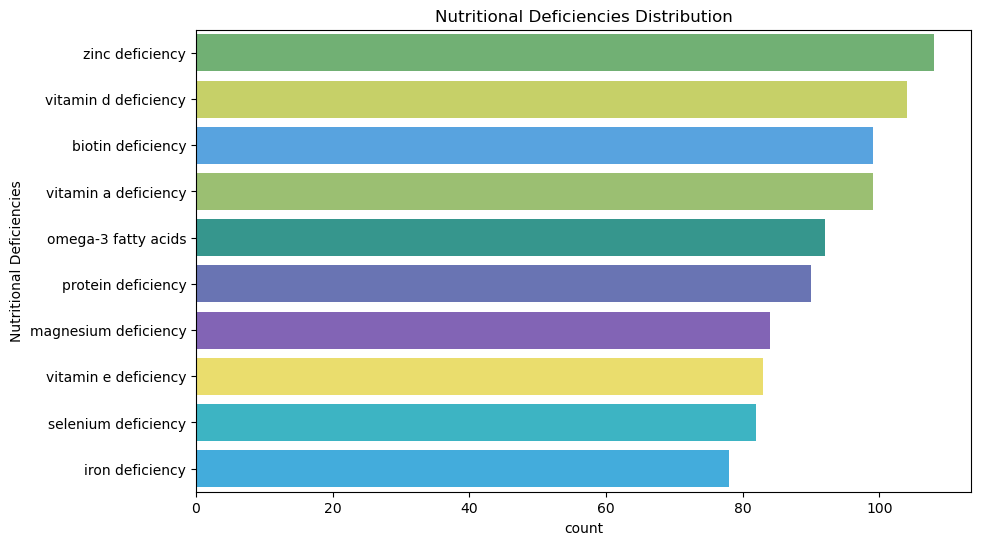

In [14]:
# 3. What types of nutritional deficiencies are there and how often do they occur?
# Get the most common nutritional deficiencies
top_three_nutritional_deficiencies = []
nutritional_deficiencies_counts = data['Nutritional Deficiencies'].value_counts()
print(f"The most common nutritional deficiencies:\n{nutritional_deficiencies_counts}\n")

# Plot the most common nutritional deficiencies
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Nutritional Deficiencies'], 
              palette=color_palettes['Nutritional Deficiencies'],
              order=data['Nutritional Deficiencies'].value_counts().index)
plt.title('Nutritional Deficiencies Distribution')
plt.show()

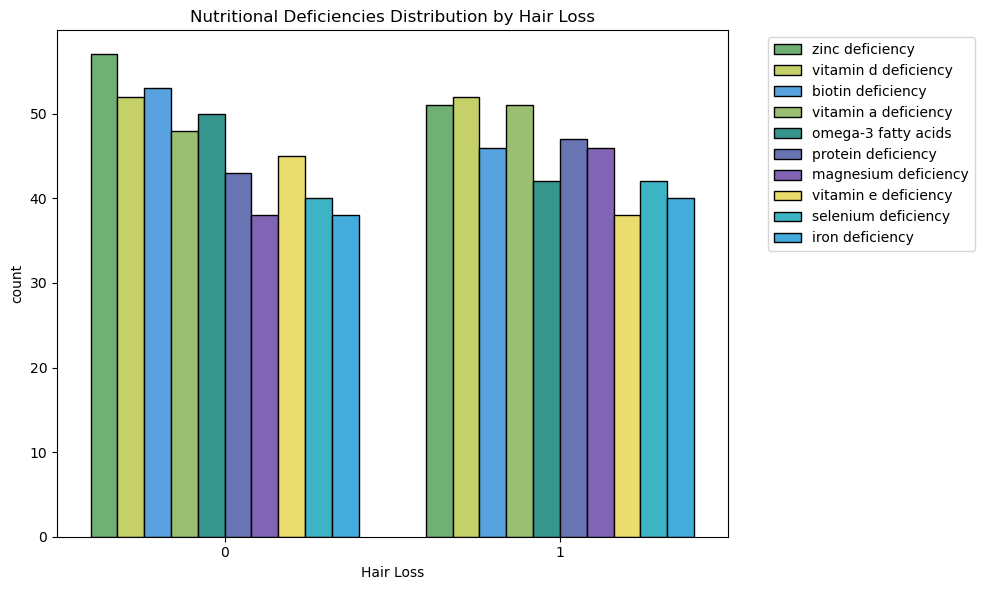

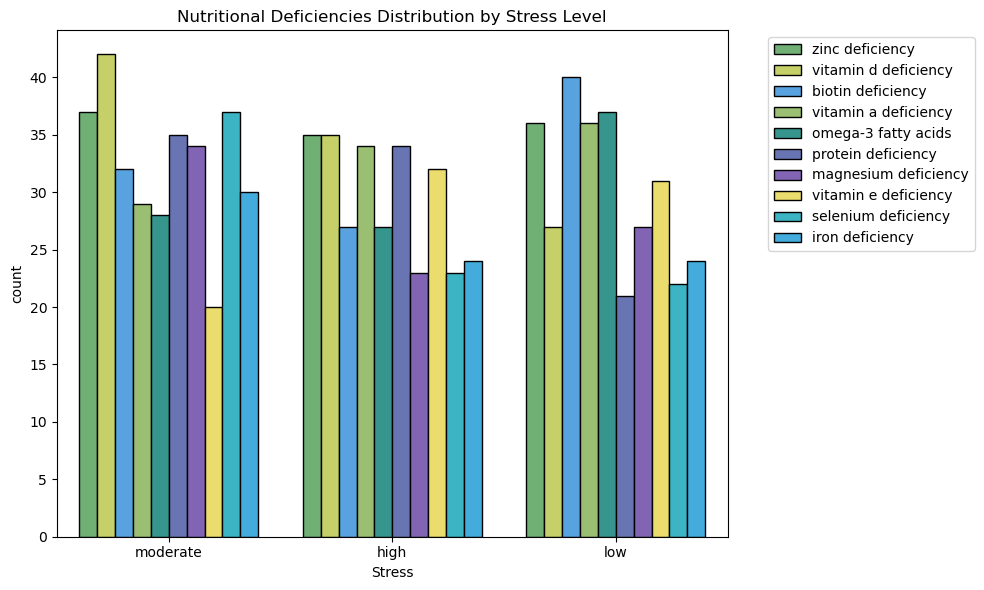

In [15]:
# Get the distribution of nutritional deficiencies by hair loss
plt.figure(figsize=(10, 6))
sns.countplot(x='Hair Loss', hue='Nutritional Deficiencies', data=data,
              palette=color_palettes['Nutritional Deficiencies'],
              edgecolor='black', linewidth=1,
              hue_order=data['Nutritional Deficiencies'].value_counts().index)
plt.title('Nutritional Deficiencies Distribution by Hair Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Get the distribution of nutritional deficiencies by stress level 
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress', hue='Nutritional Deficiencies', data=data,
              palette=color_palettes['Nutritional Deficiencies'], 
              edgecolor='black', linewidth=1,
              hue_order=data['Nutritional Deficiencies'].value_counts().index)
plt.title('Nutritional Deficiencies Distribution by Stress Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. Machine Learning Analysis
# TASKS:
1. A classification model can be built to predict whether an individual will suffer from hair loss based on given factors.
2. Use cluster analysis to explore whether there are different types of hair loss groups in the data set.
3. Use algorithms such as decision trees or random forests to identify the key factors that best predict hair loss.

In [16]:
# Create a new df called ml_data where categorical columns are mapped to numeric values
ml_data = data.drop('Id', axis=1).copy()
map_dict = {}

for column in ml_data.columns:
    if ml_data[column].dtype == 'object':
        # Get unique values and create mapping dictionary
        unique_values = ml_data[column].unique()
        value_map = {}
        
        # Handle NaN values first by mapping to 0
        if pd.isna(unique_values).any():
            value_map[np.nan] = 0
            # Filter out NaN values for the rest of the mapping
            unique_values = unique_values[~pd.isna(unique_values)]
        
        # Map remaining values starting from 1
        for idx, val in enumerate(unique_values):
            value_map[val] = idx + 1
        
        # Map values to numbers
        ml_data[column] = ml_data[column].map(value_map)
        
        # Store mapping for reference
        map_dict[column] = value_map
        
        print(f"The mapping for {column} is: {value_map}")


print("\nThe structure of final dataset is:")
ml_data.info()

The mapping for Genetics is: {'yes': 1, 'no': 2}
The mapping for Hormonal Changes is: {'no': 1, 'yes': 2}
The mapping for Medical Conditions is: {nan: 0, 'eczema': 1, 'dermatosis': 2, 'ringworm': 3, 'psoriasis': 4, 'alopecia areata': 5, 'scalp infection': 6, 'seborrheic dermatitis': 7, 'dermatitis': 8, 'thyroid problems': 9, 'androgenetic alopecia': 10}
The mapping for Medications & Treatments is: {nan: 0, 'antibiotics': 1, 'antifungal cream': 2, 'accutane': 3, 'chemotherapy': 4, 'steroids': 5, 'rogaine': 6, 'blood pressure medication': 7, 'immunomodulators': 8, 'antidepressants': 9, 'heart medication': 10}
The mapping for Nutritional Deficiencies is: {nan: 0, 'magnesium deficiency': 1, 'protein deficiency': 2, 'biotin deficiency': 3, 'iron deficiency': 4, 'selenium deficiency': 5, 'omega-3 fatty acids': 6, 'zinc deficiency': 7, 'vitamin a deficiency': 8, 'vitamin d deficiency': 9, 'vitamin e deficiency': 10}
The mapping for Stress is: {'moderate': 1, 'high': 2, 'low': 3}
The mapping f

In [148]:
ml_data_one_hot_ver = data.copy()
# in this version of dataset, if the column has unique values as yes/no replace them with 1/0.
ml_data_one_hot_ver = ml_data_one_hot_ver.applymap(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)
# If the column has different values, apply that create a new column for each unique value such as
# from Medications & Treatments column create 13 different columns for each medication/treatment and the values are 1 if the participant has the treatment/medication and 0 otherwise.
for column in ml_data_one_hot_ver.columns:
    if ml_data_one_hot_ver[column].dtype == 'object':
        print(column)
        if ml_data_one_hot_ver[column].unique().size > 2:
            # First create nan column for this feature
            ml_data_one_hot_ver[f"nan_{str(column).lower().split()[0]}"] = ml_data_one_hot_ver[column].isna().astype(int)
            
            # Then create columns for each non-nan unique value
            for unique_value in ml_data_one_hot_ver[column].unique():
                if pd.notna(unique_value):  # Only create columns for non-nan values
                    print(unique_value)
                    ml_data_one_hot_ver[f"{unique_value}"] = (ml_data_one_hot_ver[column] == unique_value).astype(int)
                
            ml_data_one_hot_ver = ml_data_one_hot_ver.drop(columns=[column])

ml_data_one_hot_ver = ml_data_one_hot_ver.drop(['nan_medical', 'nan_medications', 'nan_nutritional', 'nan_stress', 'Id'], axis=1)
# add new column as total_medications and total_treatments and total_nutritional_deficiencies
ml_data_one_hot_ver['total_medications'] = ml_data_one_hot_ver[['antibiotics', 'antifungal cream', 'accutane', 'chemotherapy', 'steroids', 'rogaine', 'blood pressure medication', 'immunomodulators', 'antidepressants', 'heart medication']].sum(axis=1)
ml_data_one_hot_ver['total_medicals'] = ml_data_one_hot_ver[['eczema', 'dermatosis', 'ringworm', 'psoriasis', 'alopecia areata', 'scalp infection', 'seborrheic dermatitis', 'dermatitis', 'thyroid problems', 'androgenetic alopecia']].sum(axis=1)
ml_data_one_hot_ver['total_nutritional_deficiencies'] = ml_data_one_hot_ver[['magnesium deficiency', 'protein deficiency', 'biotin deficiency', 'iron deficiency', 'selenium deficiency', 'omega-3 fatty acids', 'zinc deficiency', 'vitamin a deficiency', 'vitamin d deficiency', 'vitamin e deficiency']].sum(axis=1)
print(ml_data_one_hot_ver.head(3))

Medical Conditions
eczema
dermatosis
ringworm
psoriasis
alopecia areata
scalp infection
seborrheic dermatitis
dermatitis
thyroid problems
androgenetic alopecia
Medications & Treatments
antibiotics
antifungal cream
accutane
chemotherapy
steroids
rogaine
blood pressure medication
immunomodulators
antidepressants
heart medication
Nutritional Deficiencies
magnesium deficiency
protein deficiency
biotin deficiency
iron deficiency
selenium deficiency
omega-3 fatty acids
zinc deficiency
vitamin a deficiency
vitamin d deficiency
vitamin e deficiency
Stress
moderate
high
low
   Genetics  Hormonal Changes  Age  Poor Hair Care Habits  \
0         1                 0   19                      1   
1         0                 0   43                      1   
2         0                 0   26                      1   

   Environmental Factors  Smoking  Weight Loss  Hair Loss  eczema  dermatosis  \
0                      1        0            0          0       0           0   
1                    

In [126]:
# 1. Risk Scores
ml_data_one_hot_ver['lifestyle_risk_score'] = ml_data_one_hot_ver[['Poor Hair Care Habits', 'Smoking', 'Environmental Factors']].sum(axis=1)
ml_data_one_hot_ver['genetic_hormonal_risk'] = ml_data_one_hot_ver[['Genetics', 'Hormonal Changes']].sum(axis=1)

# 2. Deficiency Severity
ml_data_one_hot_ver['vitamin_deficiency_count'] = ml_data_one_hot_ver[['vitamin a deficiency', 'vitamin d deficiency', 'vitamin e deficiency']].sum(axis=1)
ml_data_one_hot_ver['mineral_deficiency_count'] = ml_data_one_hot_ver[['magnesium deficiency', 'iron deficiency', 'selenium deficiency', 'zinc deficiency']].sum(axis=1)

# 3. Medical Condition Groupings
ml_data_one_hot_ver['skin_conditions_count'] = ml_data_one_hot_ver[['eczema', 'dermatosis', 'psoriasis', 'dermatitis', 'seborrheic dermatitis']].sum(axis=1)
ml_data_one_hot_ver['scalp_specific_issues'] = ml_data_one_hot_ver[['scalp infection', 'ringworm', 'alopecia areata']].sum(axis=1)

# 4. Medication Impact Score
ml_data_one_hot_ver['strong_medication_score'] = ml_data_one_hot_ver[['chemotherapy', 'steroids', 'immunomodulators']].sum(axis=1)
ml_data_one_hot_ver['regular_medication_score'] = ml_data_one_hot_ver[['antibiotics', 'antifungal cream', 'blood pressure medication', 'heart medication', 'antidepressants']].sum(axis=1)

# 5. Ratios and Proportions
ml_data_one_hot_ver['deficiency_to_medication_ratio'] = ml_data_one_hot_ver['total_nutritional_deficiencies'] / (ml_data_one_hot_ver['total_medications'] + 1e-5)  # Adding 1 to avoid division by zero

# 6. Composite Risk Score (weighted sum)
ml_data_one_hot_ver['composite_risk_score'] = (
    2 * ml_data_one_hot_ver['Genetics'] +  # Higher weight for genetic factors
    2 * ml_data_one_hot_ver['Hormonal Changes'] +  # Higher weight for hormonal factors
    1.5 * ml_data_one_hot_ver['strong_medication_score'] +
    ml_data_one_hot_ver['skin_conditions_count'] +
    ml_data_one_hot_ver['vitamin_deficiency_count'] +
    ml_data_one_hot_ver['mineral_deficiency_count']
)

In [129]:
# Check correlation between each column and hair loss
ml_data.corrwith(ml_data['Hair Loss']).sort_values(ascending=False)

Hair Loss                   1.000000
Weight Loss                 0.044838
Poor Hair Care Habits       0.039119
Medical Conditions          0.037847
Environmental Factors       0.018937
Hormonal Changes            0.007104
Medications & Treatments   -0.016458
Stress                     -0.026889
Nutritional Deficiencies   -0.031141
Genetics                   -0.041309
Smoking                    -0.056906
Age                        -0.062481
dtype: float64

In [130]:
ml_data_one_hot_ver.corrwith(ml_data_one_hot_ver['Hair Loss']).sort_values(ascending=False)

Hair Loss                         1.000000
alopecia areata                   0.050287
total_medicals                    0.049405
Weight Loss                       0.044838
seborrheic dermatitis             0.043938
androgenetic alopecia             0.042035
Genetics                          0.041309
composite_risk_score              0.038897
steroids                          0.037340
genetic_hormonal_risk             0.034358
moderate                          0.030942
magnesium deficiency              0.030373
scalp_specific_issues             0.023593
antibiotics                       0.022185
mineral_deficiency_count          0.016265
protein deficiency                0.015560
vitamin a deficiency              0.011710
skin_conditions_count             0.010467
strong_medication_score           0.009814
iron deficiency                   0.008919
selenium deficiency               0.008790
chemotherapy                      0.008567
heart medication                  0.008262
rogaine    

In [131]:
ml_data_one_hot_ver.columns

Index(['Genetics', 'Hormonal Changes', 'Age', 'Poor Hair Care Habits',
       'Environmental Factors', 'Smoking', 'Weight Loss', 'Hair Loss',
       'eczema', 'dermatosis', 'ringworm', 'psoriasis', 'alopecia areata',
       'scalp infection', 'seborrheic dermatitis', 'dermatitis',
       'thyroid problems', 'androgenetic alopecia', 'antibiotics',
       'antifungal cream', 'accutane', 'chemotherapy', 'steroids', 'rogaine',
       'blood pressure medication', 'immunomodulators', 'antidepressants',
       'heart medication', 'magnesium deficiency', 'protein deficiency',
       'biotin deficiency', 'iron deficiency', 'selenium deficiency',
       'omega-3 fatty acids', 'zinc deficiency', 'vitamin a deficiency',
       'vitamin d deficiency', 'vitamin e deficiency', 'moderate', 'high',
       'low', 'total_medications', 'total_medicals',
       'total_nutritional_deficiencies', 'lifestyle_risk_score',
       'genetic_hormonal_risk', 'vitamin_deficiency_count',
       'mineral_deficiency_co

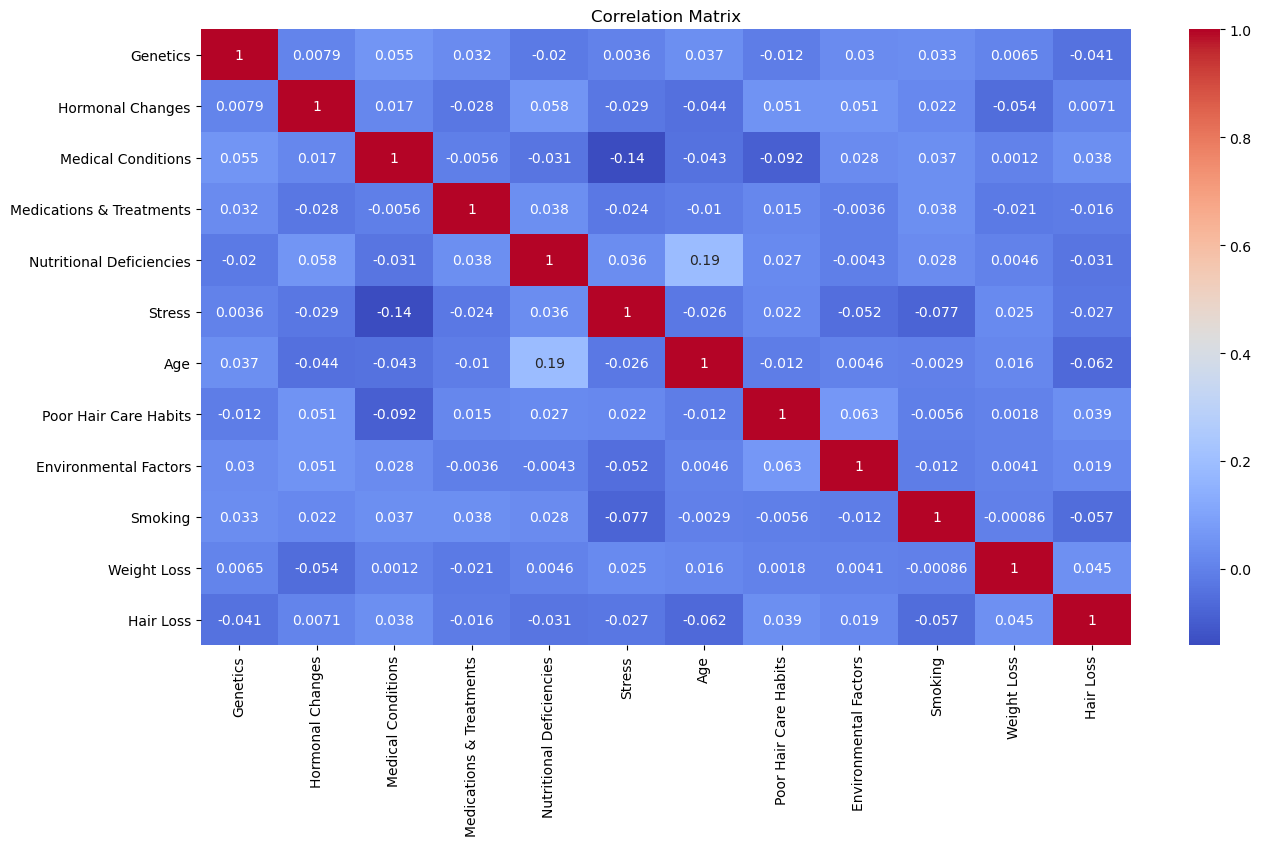

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(ml_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Since the data is not normally distributed (as seen from previous Shapiro test), 
# we should use non-parametric Mann-Whitney U test to compare hair loss and no hair loss groups
from scipy.stats import mannwhitneyu

# Split data into two groups
hair_loss_group = ml_data[ml_data['Hair Loss'] == 1]
no_hair_loss_group = ml_data[ml_data['Hair Loss'] == 0]

# Compare groups for each feature
features = [col for col in ml_data.columns if col != 'Hair Loss']
for feature in features:
    statistic, pvalue = mannwhitneyu(hair_loss_group[feature], 
                                   no_hair_loss_group[feature],
                                   alternative='two-sided')
    print(f"\n{feature}:")
    print(f"Mann-Whitney U statistic: {statistic:.4f}")
    print(f"p-value: {pvalue:.4f}")
    print(f"Significant difference: {'Yes' if pvalue < 0.05 else 'No'}")



Genetics:
Mann-Whitney U statistic: 119599.0000
p-value: 0.1919
Significant difference: No

Hormonal Changes:
Mann-Whitney U statistic: 125633.0000
p-value: 0.8225
Significant difference: No

Medical Conditions:
Mann-Whitney U statistic: 130110.5000
p-value: 0.2375
Significant difference: No

Medications & Treatments:
Mann-Whitney U statistic: 122369.0000
p-value: 0.6002
Significant difference: No

Nutritional Deficiencies:
Mann-Whitney U statistic: 120363.0000
p-value: 0.3343
Significant difference: No

Stress:
Mann-Whitney U statistic: 121075.0000
p-value: 0.3929
Significant difference: No

Age:
Mann-Whitney U statistic: 115713.5000
p-value: 0.0475
Significant difference: Yes

Poor Hair Care Habits:
Mann-Whitney U statistic: 129626.5000
p-value: 0.2166
Significant difference: No

Environmental Factors:
Mann-Whitney U statistic: 127109.0000
p-value: 0.5498
Significant difference: No

Smoking:
Mann-Whitney U statistic: 117653.5000
p-value: 0.0722
Significant difference: No

Weight Los

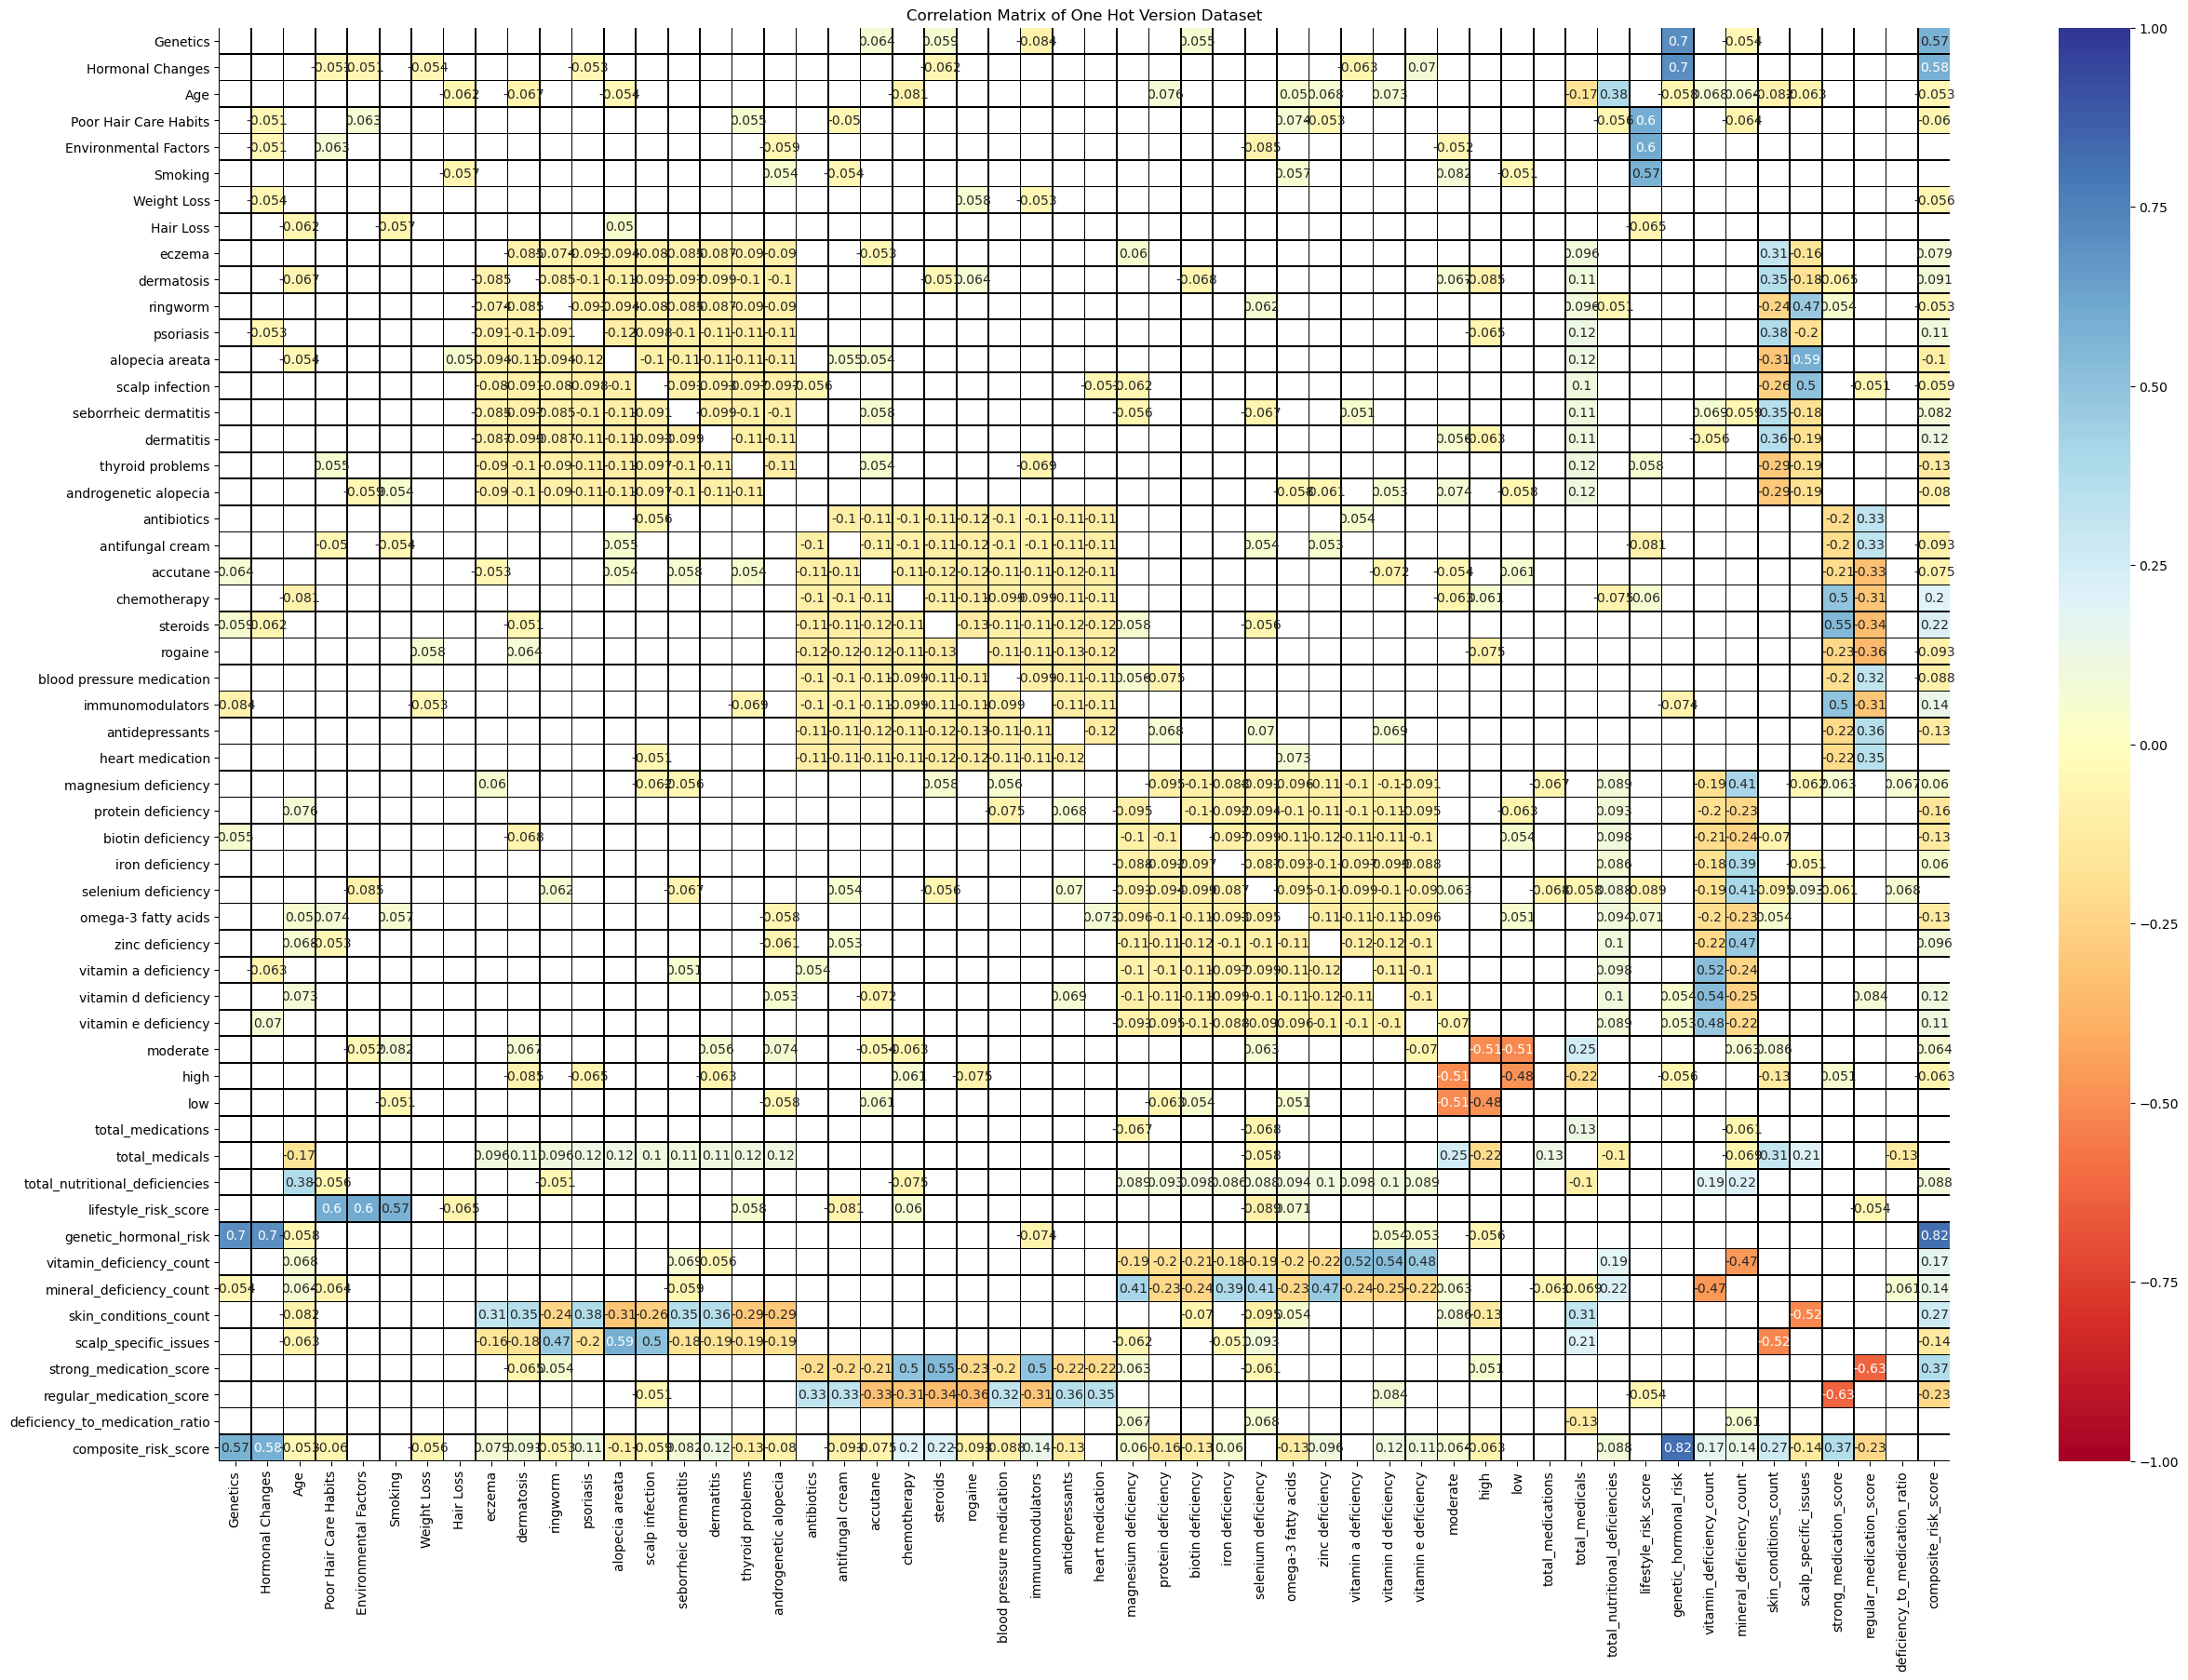

In [132]:
plt.figure(figsize=(30, 20))
corr_matrix = ml_data_one_hot_ver.corr()
mask = (abs(corr_matrix) >= 0.05) & (abs(corr_matrix) <= 0.99)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1, mask=~mask, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of One Hot Version Dataset')
plt.show()

In [133]:
ml_data_one_hot_ver.columns

Index(['Genetics', 'Hormonal Changes', 'Age', 'Poor Hair Care Habits',
       'Environmental Factors', 'Smoking', 'Weight Loss', 'Hair Loss',
       'eczema', 'dermatosis', 'ringworm', 'psoriasis', 'alopecia areata',
       'scalp infection', 'seborrheic dermatitis', 'dermatitis',
       'thyroid problems', 'androgenetic alopecia', 'antibiotics',
       'antifungal cream', 'accutane', 'chemotherapy', 'steroids', 'rogaine',
       'blood pressure medication', 'immunomodulators', 'antidepressants',
       'heart medication', 'magnesium deficiency', 'protein deficiency',
       'biotin deficiency', 'iron deficiency', 'selenium deficiency',
       'omega-3 fatty acids', 'zinc deficiency', 'vitamin a deficiency',
       'vitamin d deficiency', 'vitamin e deficiency', 'moderate', 'high',
       'low', 'total_medications', 'total_medicals',
       'total_nutritional_deficiencies', 'lifestyle_risk_score',
       'genetic_hormonal_risk', 'vitamin_deficiency_count',
       'mineral_deficiency_co

In [171]:
# Split training and test data
from sklearn.model_selection import train_test_split

print("Training and test data is being created by calculated features one hot version dataset...")
X = ml_data_one_hot_ver_calc.drop(['hair_loss'], axis=1)
y = ml_data_one_hot_ver_calc['hair_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, 
                                                    stratify=y)  ## for much balanced train/test split

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# print hair loss and no hair loss counts in training and test data
# print a table to counts of hair loss and no hair loss in training and test data
print(f"\n{'':<15} {'Training':<15} {'Test':<15}")
print(f"{'Hair loss':<15} {(y_train == 1).sum():<15} {(y_test == 1).sum():<15}")
print(f"{'No hair loss':<15} {(y_train == 0).sum():<15} {(y_test == 0).sum():<15}\n")
print(f"Hair loss/ no hair loss ratio in training data: {np.round((y_train == 1).sum() / (y_train == 0).sum(), 2)}")
print(f"Hair loss/ no hair loss ratio in test data: {np.round((y_test == 1).sum() / (y_test == 0).sum(), 2)}")

Training and test data is being created by calculated features one hot version dataset...
X_train shape: (799, 22)
X_test shape: (200, 22)
y_train shape: (799,)
y_test shape: (200,)

                Training        Test           
Hair loss       398             99             
No hair loss    401             101            

Hair loss/ no hair loss ratio in training data: 0.99
Hair loss/ no hair loss ratio in test data: 0.98


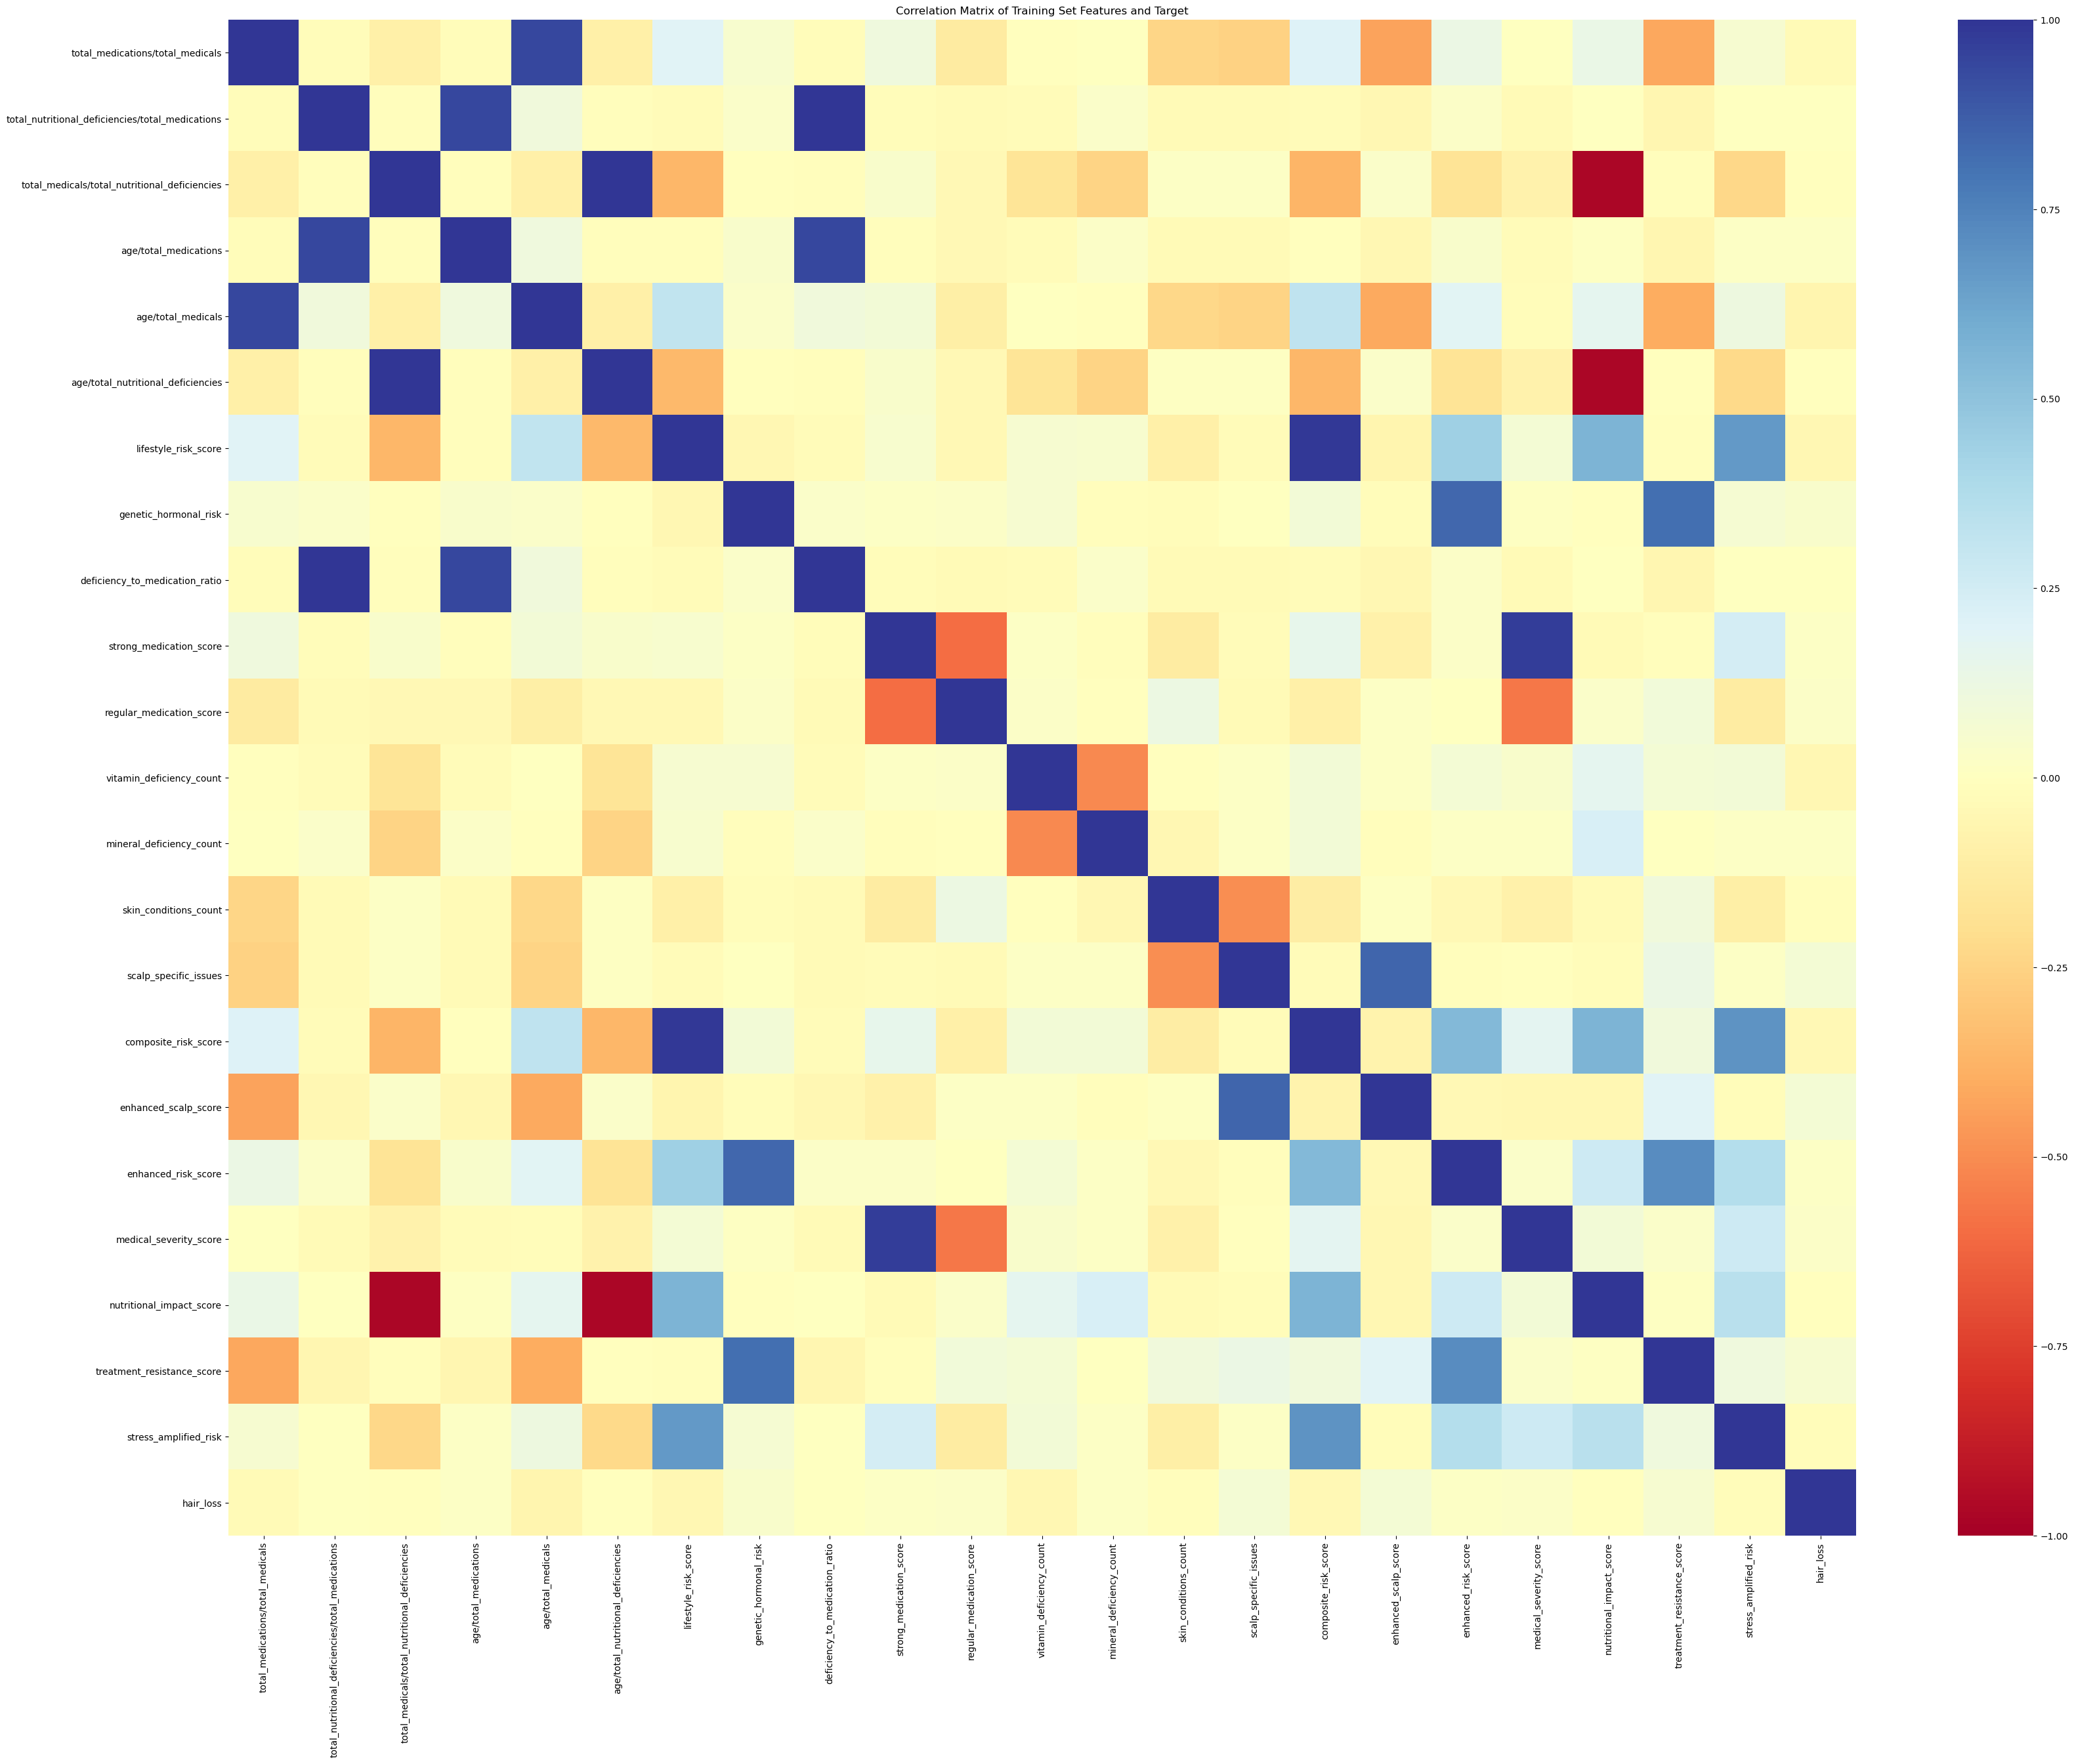

In [172]:
# Check correlation of training set with y_train, i want to create a heatmap to see which features are most correlated with y_train
# Add y_train to get correlations with target
train_data = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(40, 30))
sns.heatmap(train_data.corr(), annot=False, cmap='RdYlBu', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Training Set Features and Target')
plt.show()

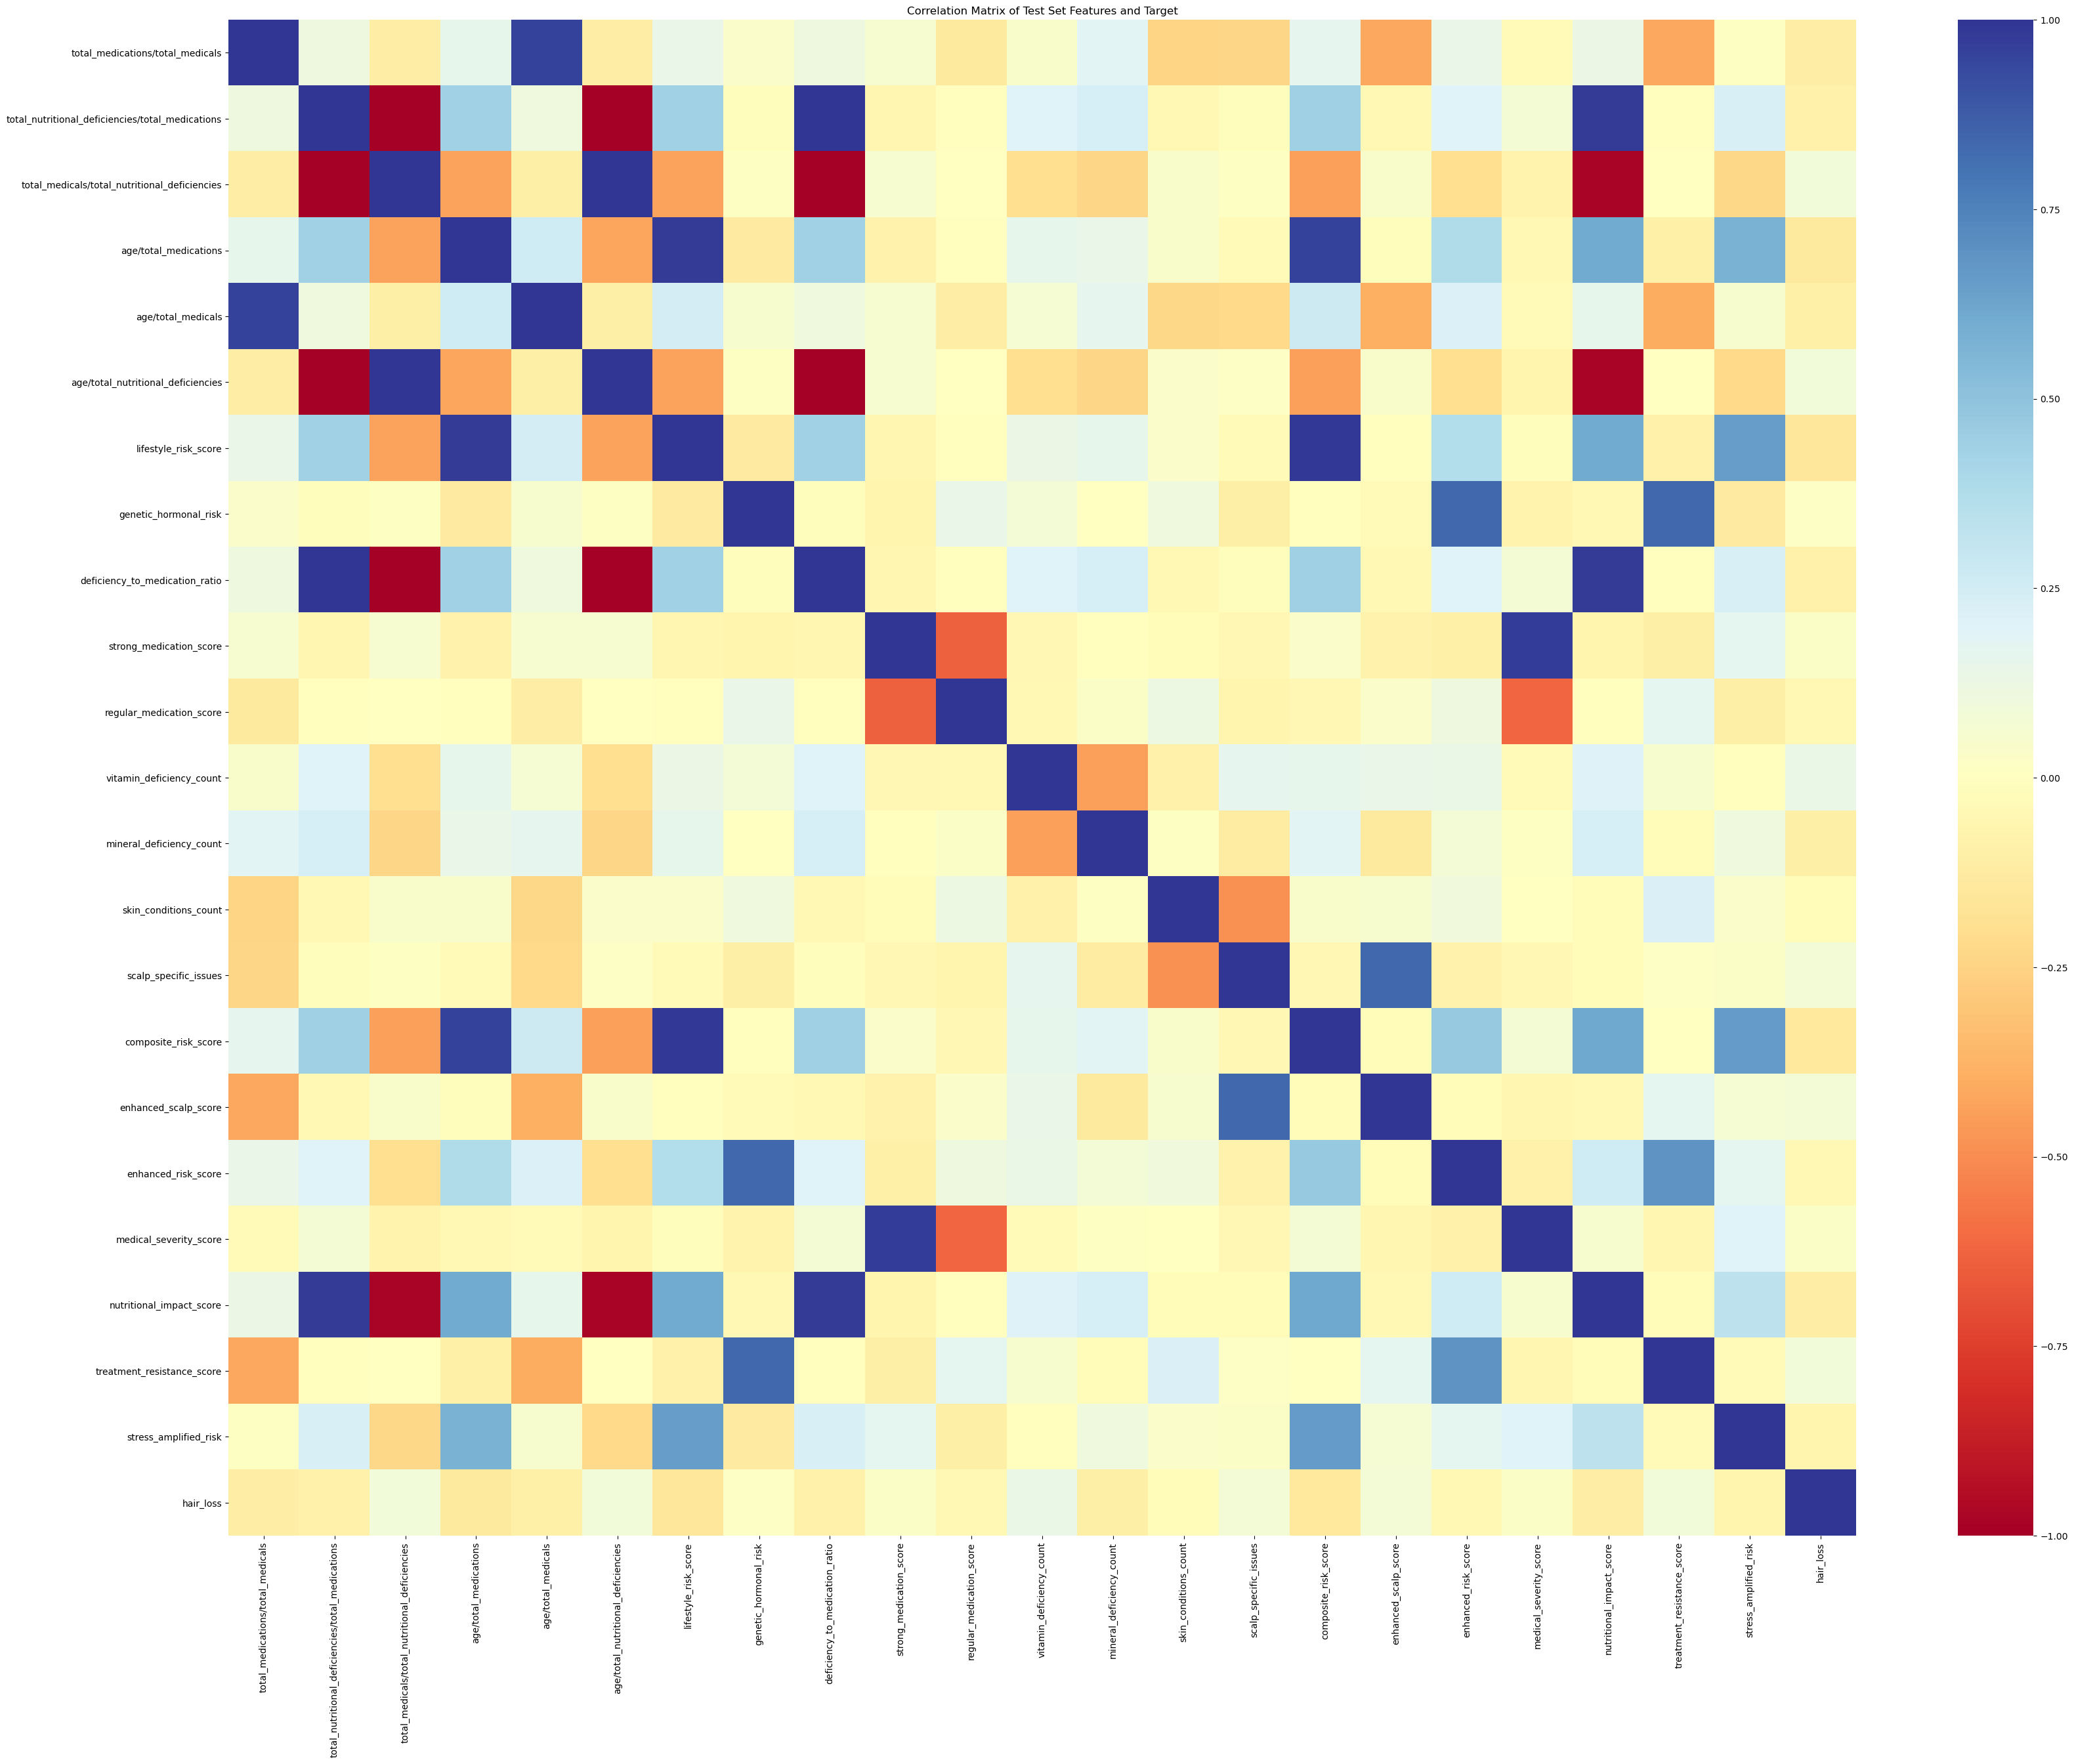

In [173]:
test_data = pd.concat([X_test, y_test], axis=1)

plt.figure(figsize=(40, 30))
sns.heatmap(test_data.corr(), annot=False, cmap='RdYlBu', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Test Set Features and Target')
plt.show()

Correlation between training and test sets: 0.02


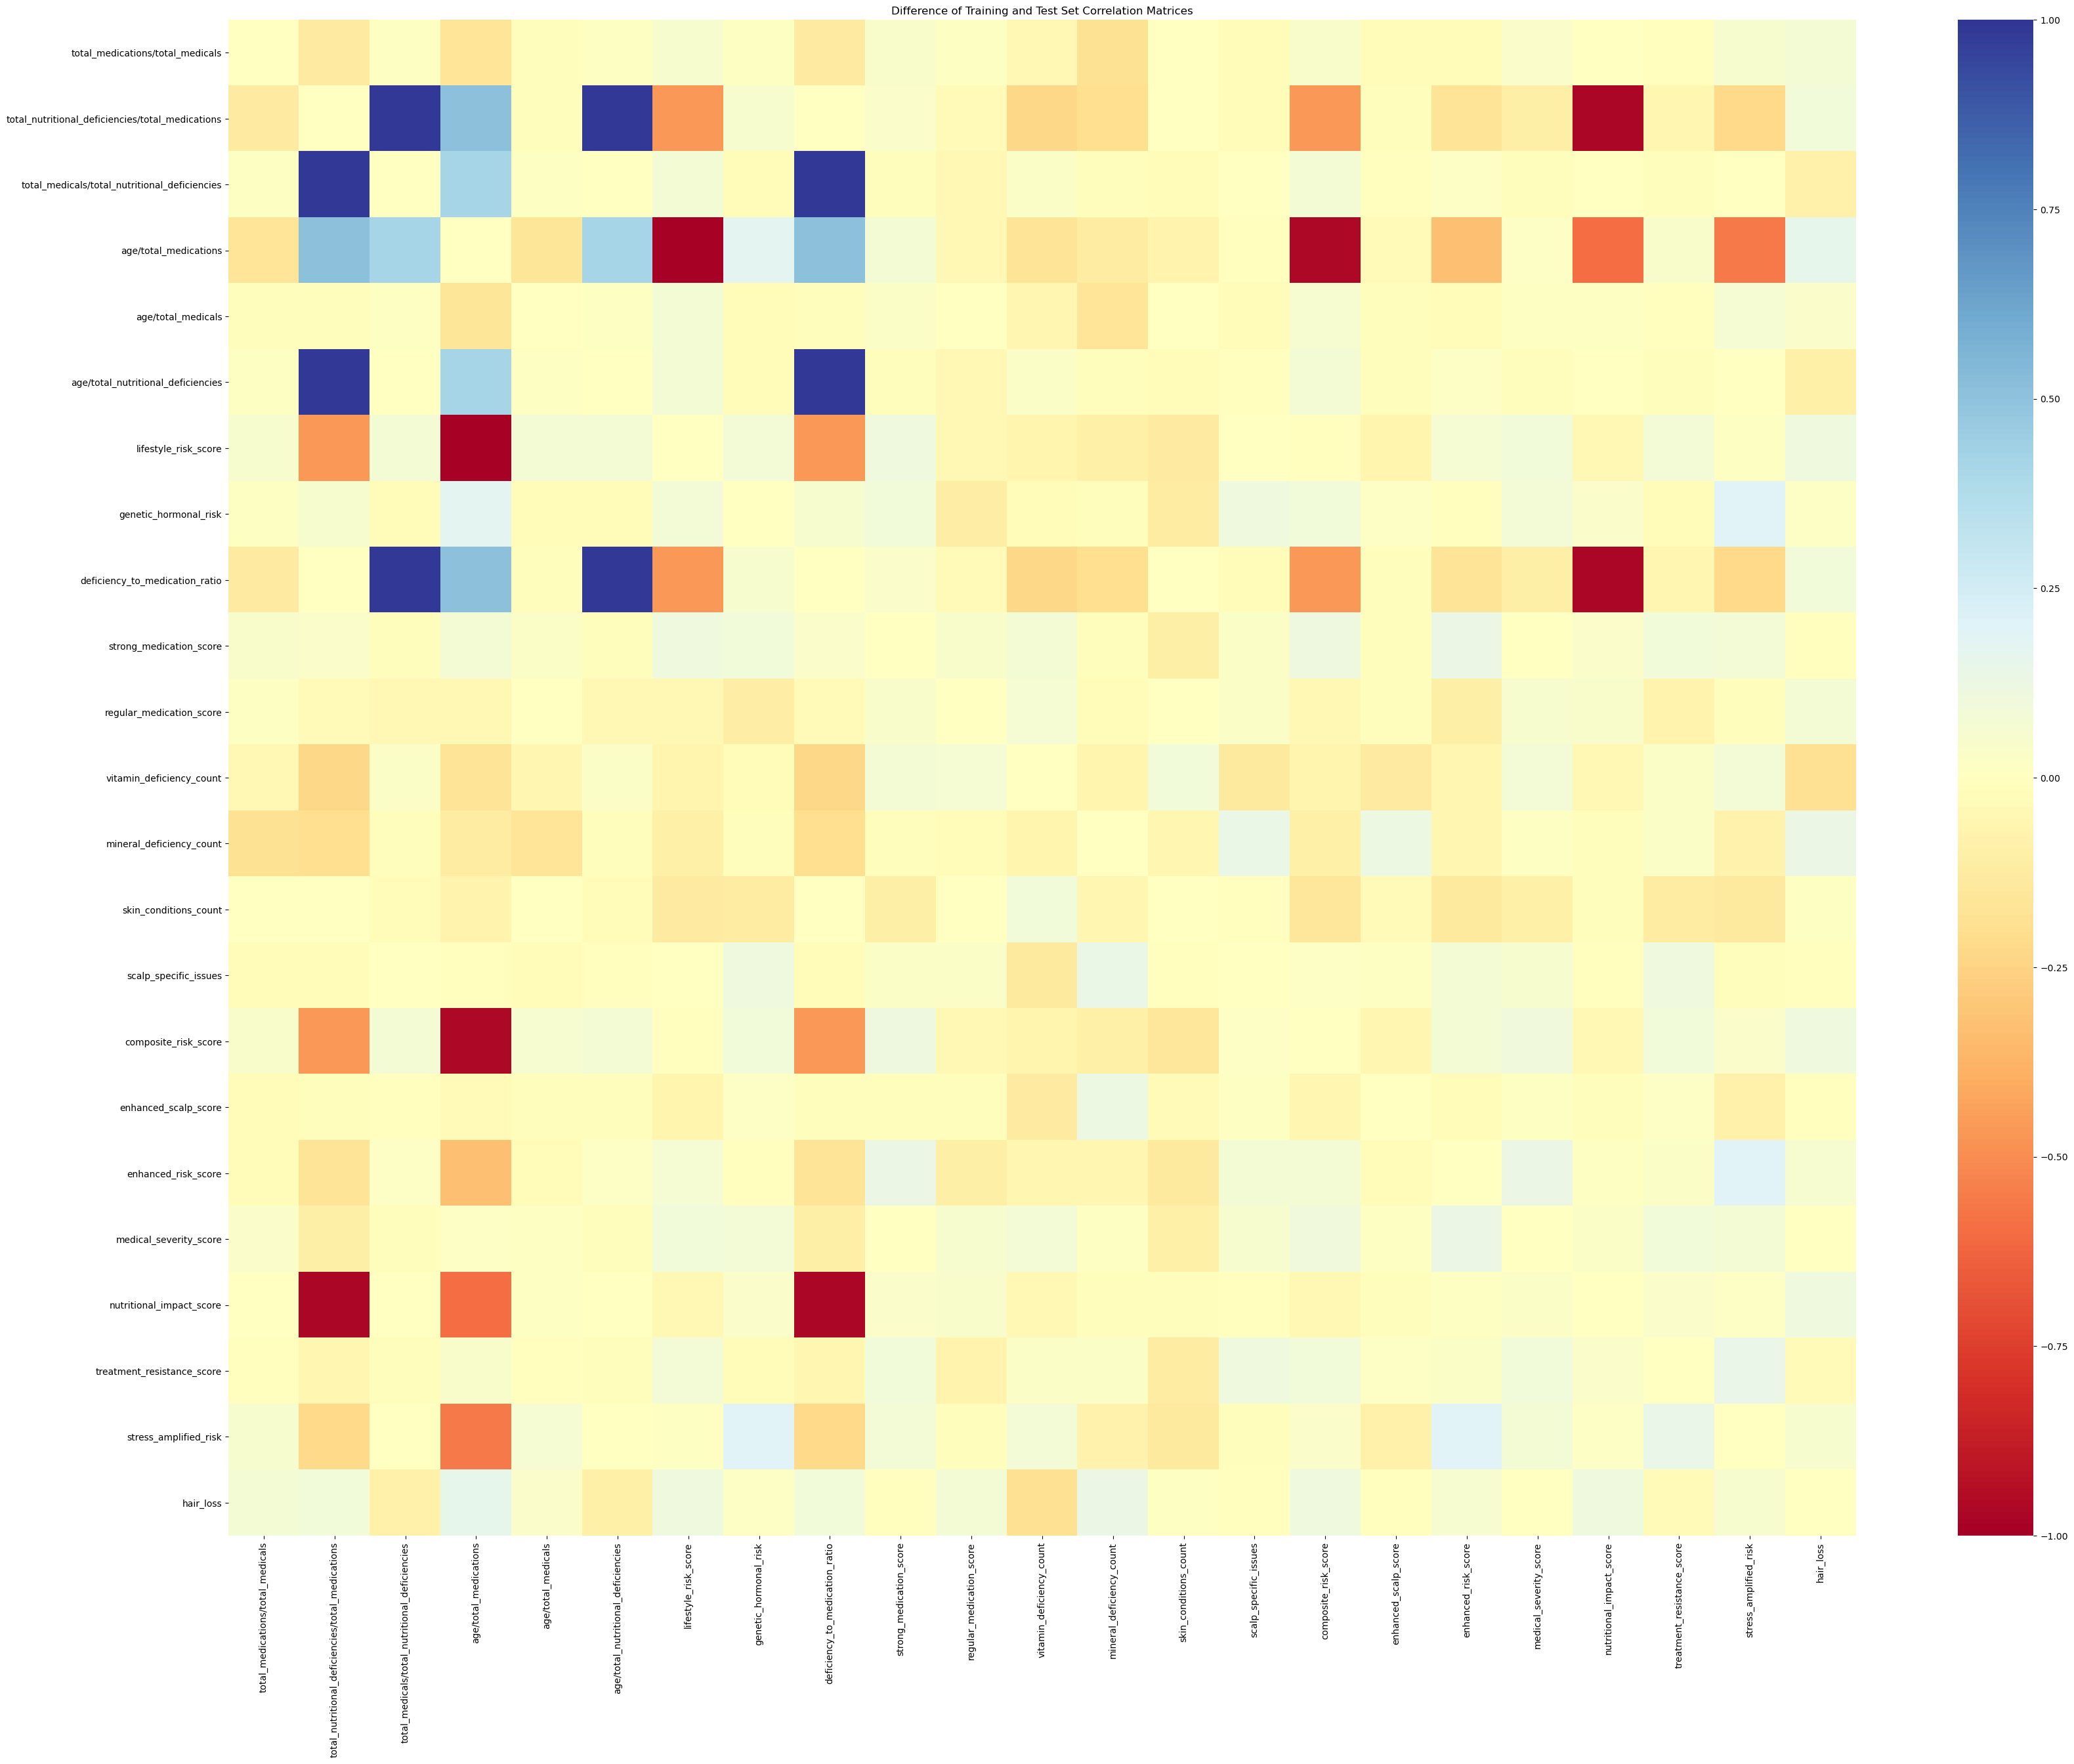

In [174]:
# Compare correlation of training and test sets
print(f"Correlation between training and test sets: {np.round(np.corrcoef(train_data, test_data)[0, 1], 2)}")

# could you please visualize difference of train_data and test_data correlation matrices
plt.figure(figsize=(40, 30))
sns.heatmap(train_data.corr() - test_data.corr(), annot=False, cmap='RdYlBu', center=0, vmin=-1, vmax=1)
plt.title('Difference of Training and Test Set Correlation Matrices')
plt.show()

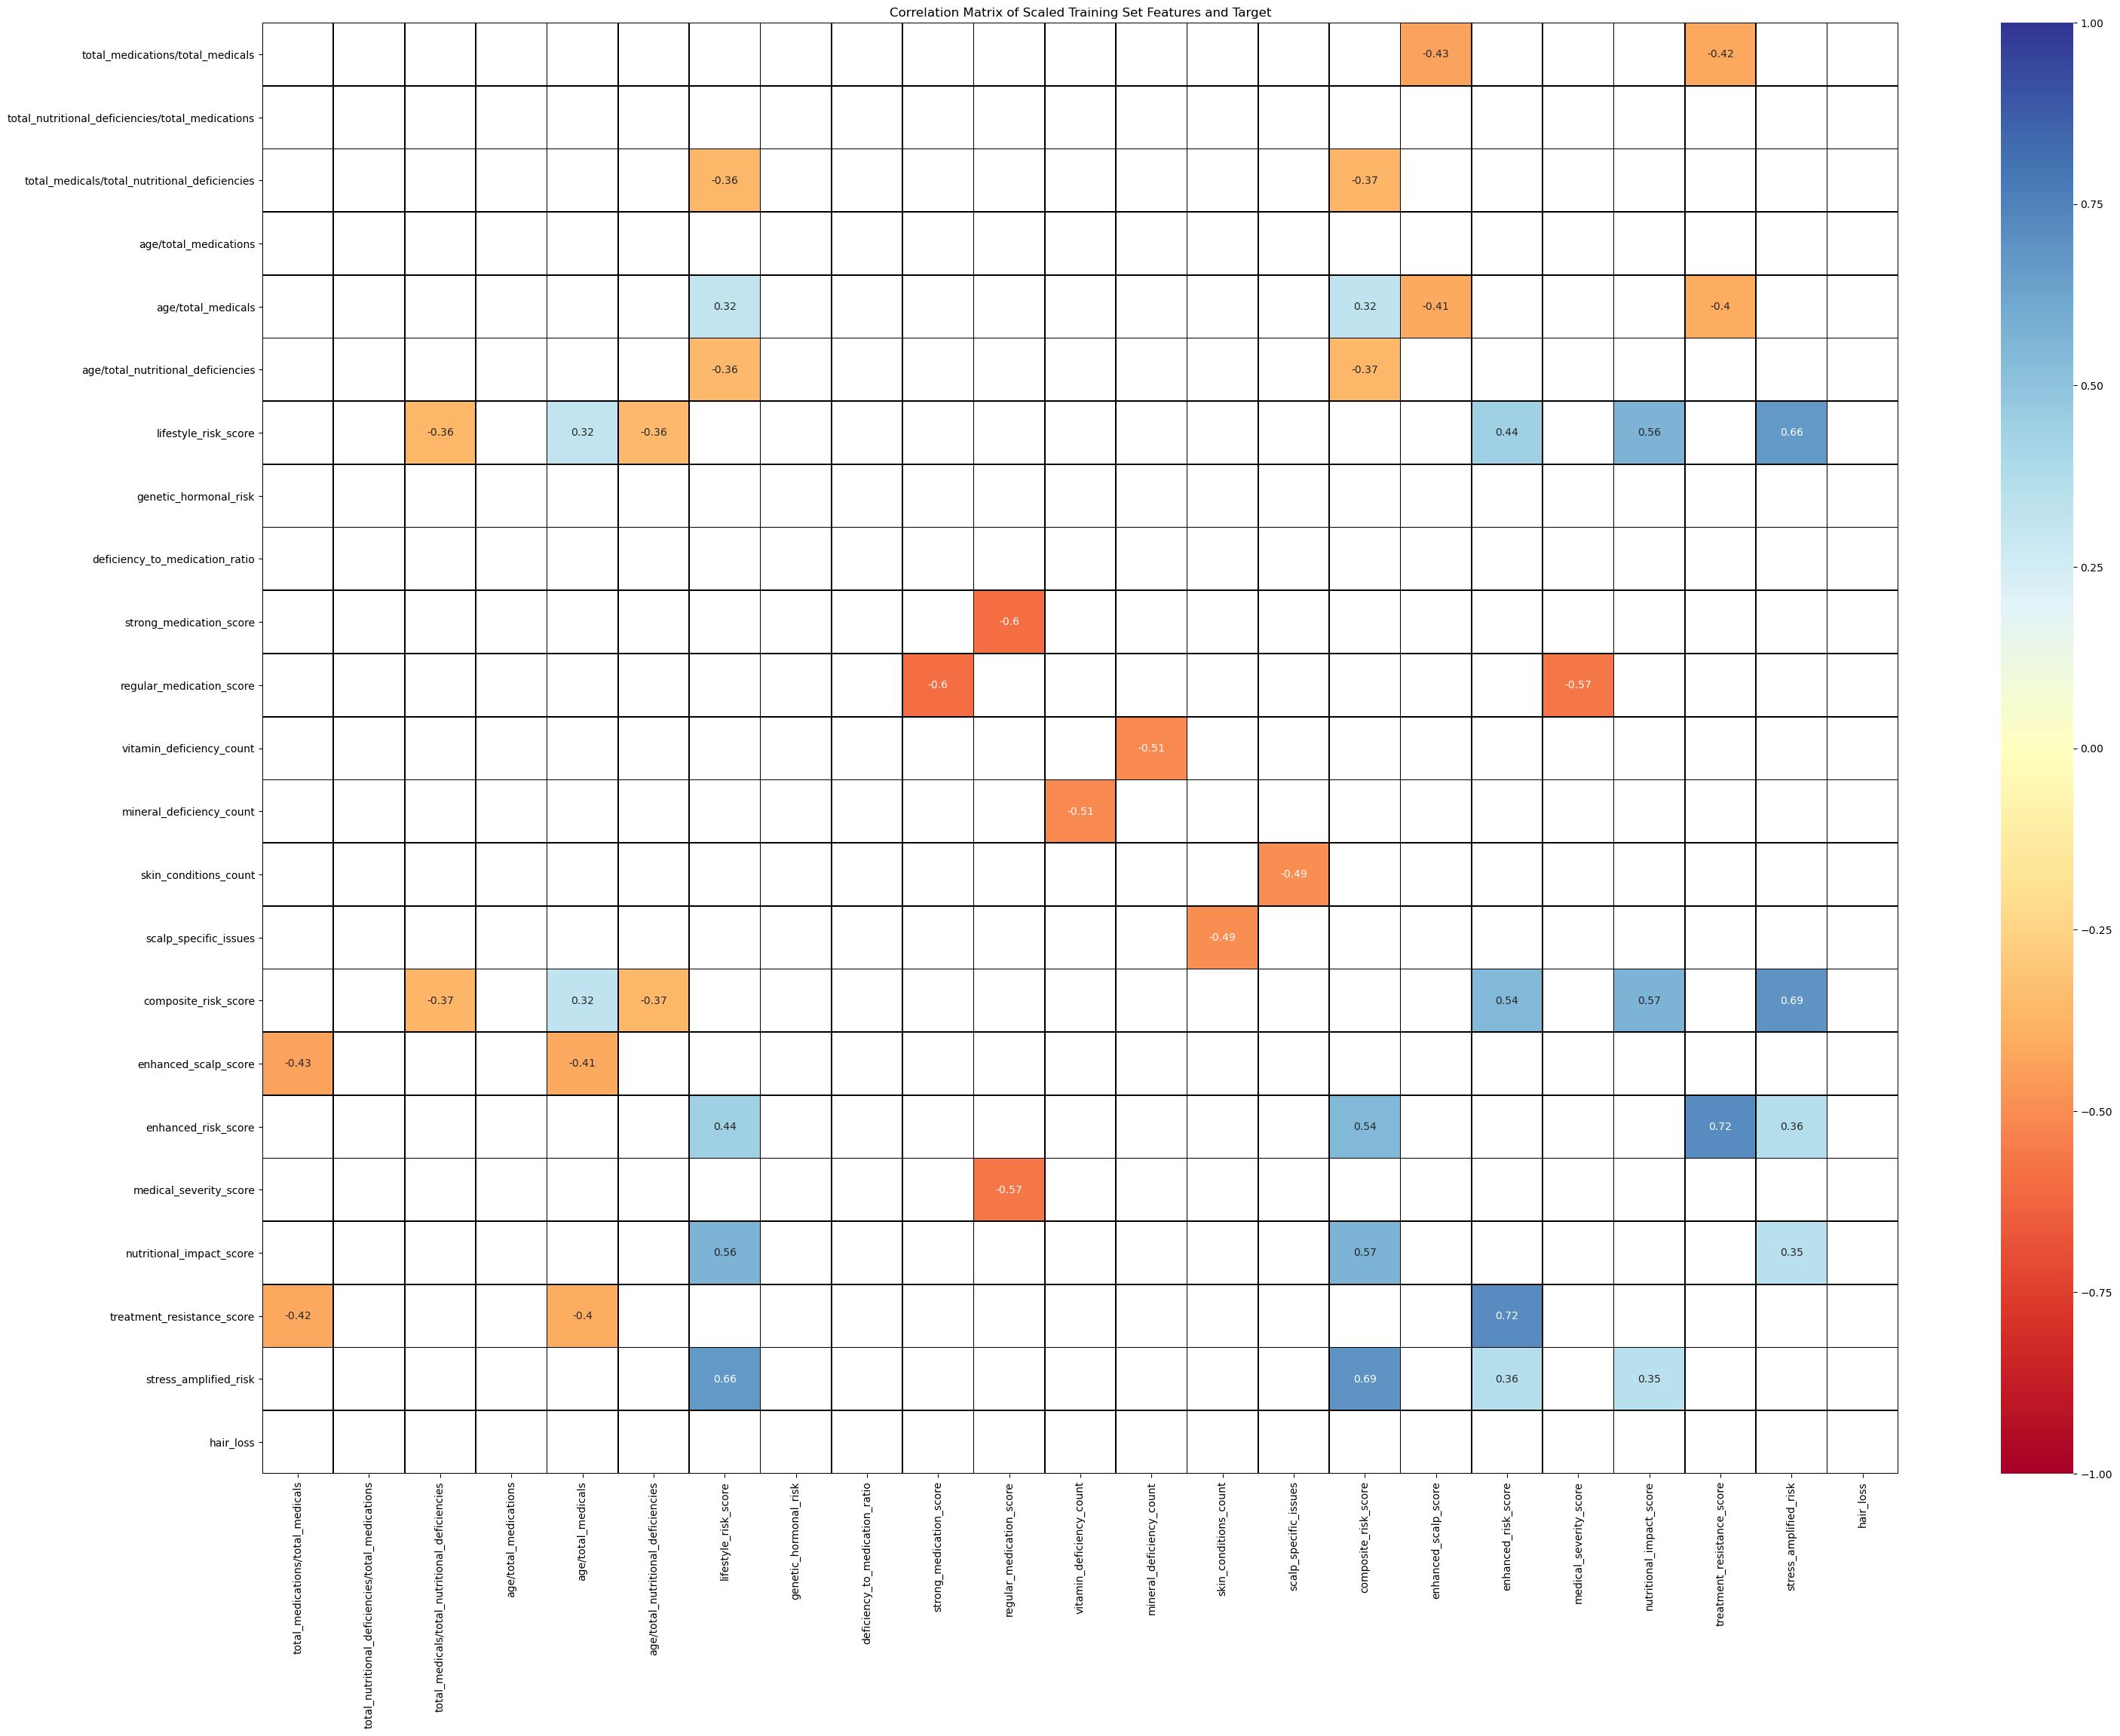

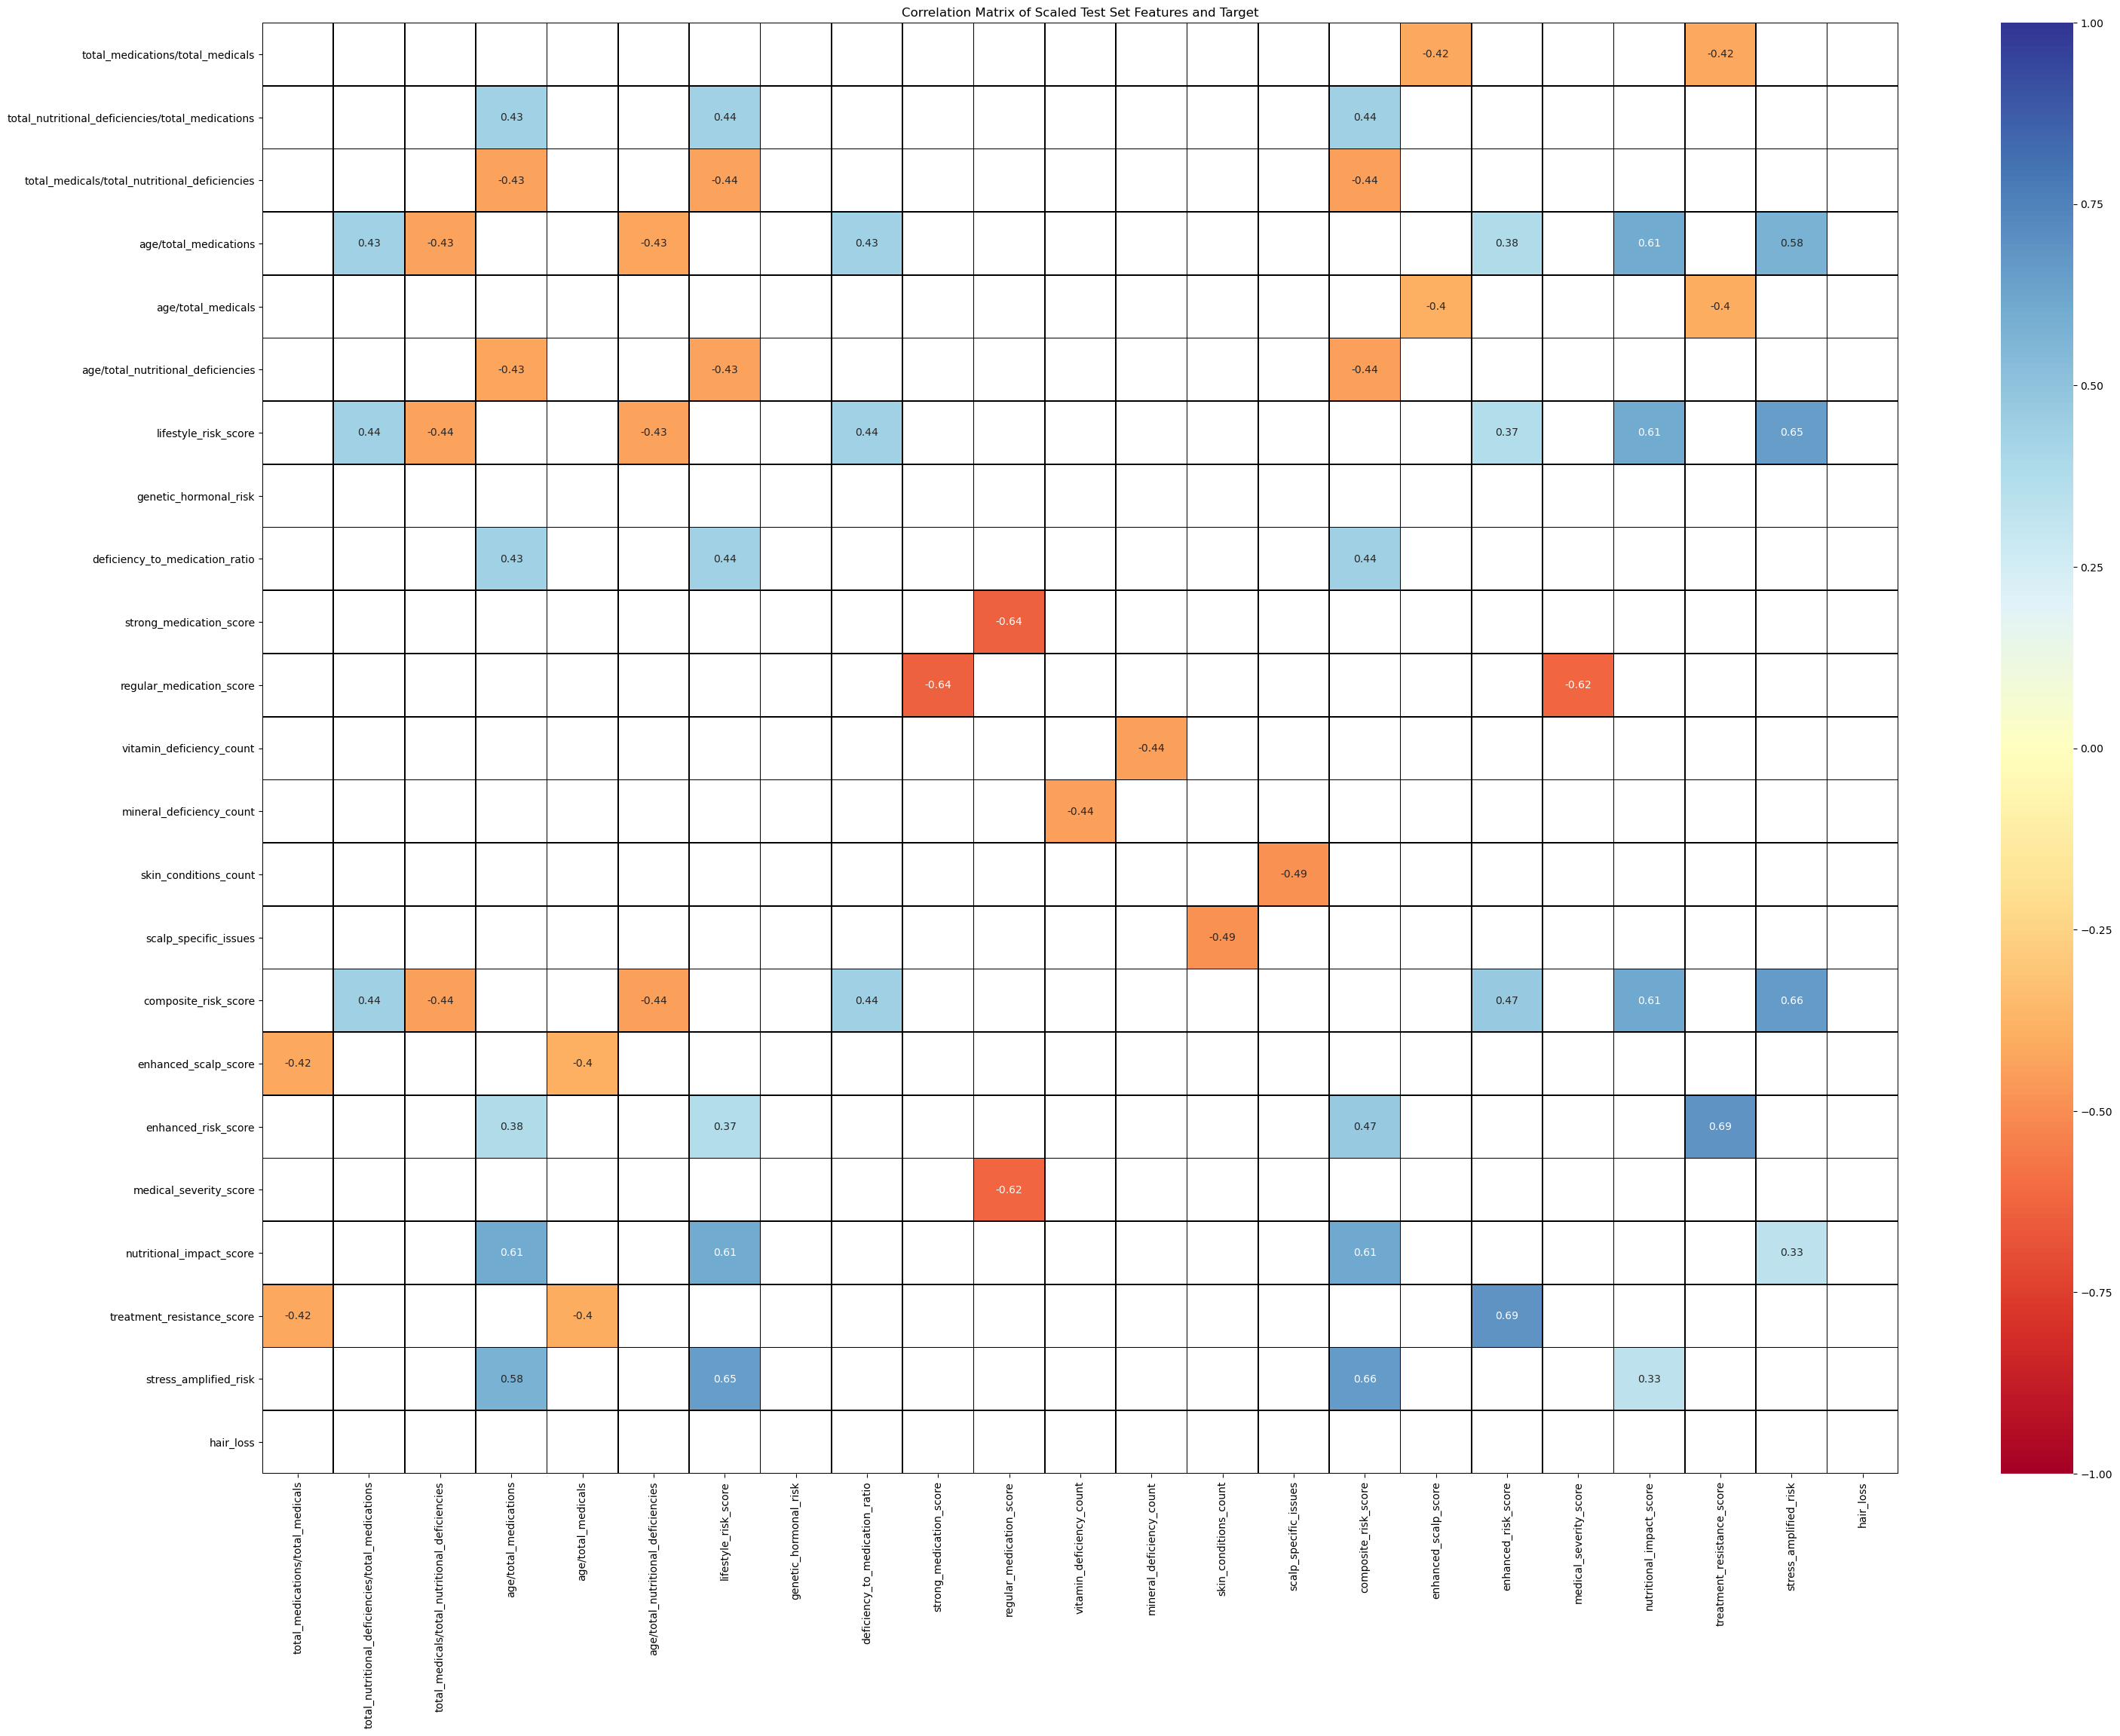

In [175]:
## How can i scale all columns between 0 and 1 in X_train and X_test using X_train statistics?
# Calculate mean and std values from X_train
X_train_mean = X_train.mean()
X_train_std = X_train.std()

# Scale X_train using standardization formula: (X - mean)/std
X_train_scaled = (X_train - X_train_mean) / X_train_std

# Scale X_test using same mean/std values from X_train
X_test_scaled = (X_test - X_train_mean) / X_train_std

# please plot again correlation matrix of X_train_scaled and X_test_scaled by combine y_train and y_test
train_data_scaled = pd.concat([X_train_scaled, y_train], axis=1)
test_data_scaled = pd.concat([X_test_scaled, y_test], axis=1)

plt.figure(figsize=(35, 25))
corr_matrix = train_data_scaled.corr()
mask = (abs(corr_matrix) >= 0.3) & (abs(corr_matrix) <= 0.8)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1, mask=~mask, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Scaled Training Set Features and Target')
plt.show()

plt.figure(figsize=(35, 25))
corr_matrix = test_data_scaled.corr()
mask = (abs(corr_matrix) >= 0.3) & (abs(corr_matrix) <= 0.8)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1, mask=~mask, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Scaled Test Set Features and Target')
plt.show()

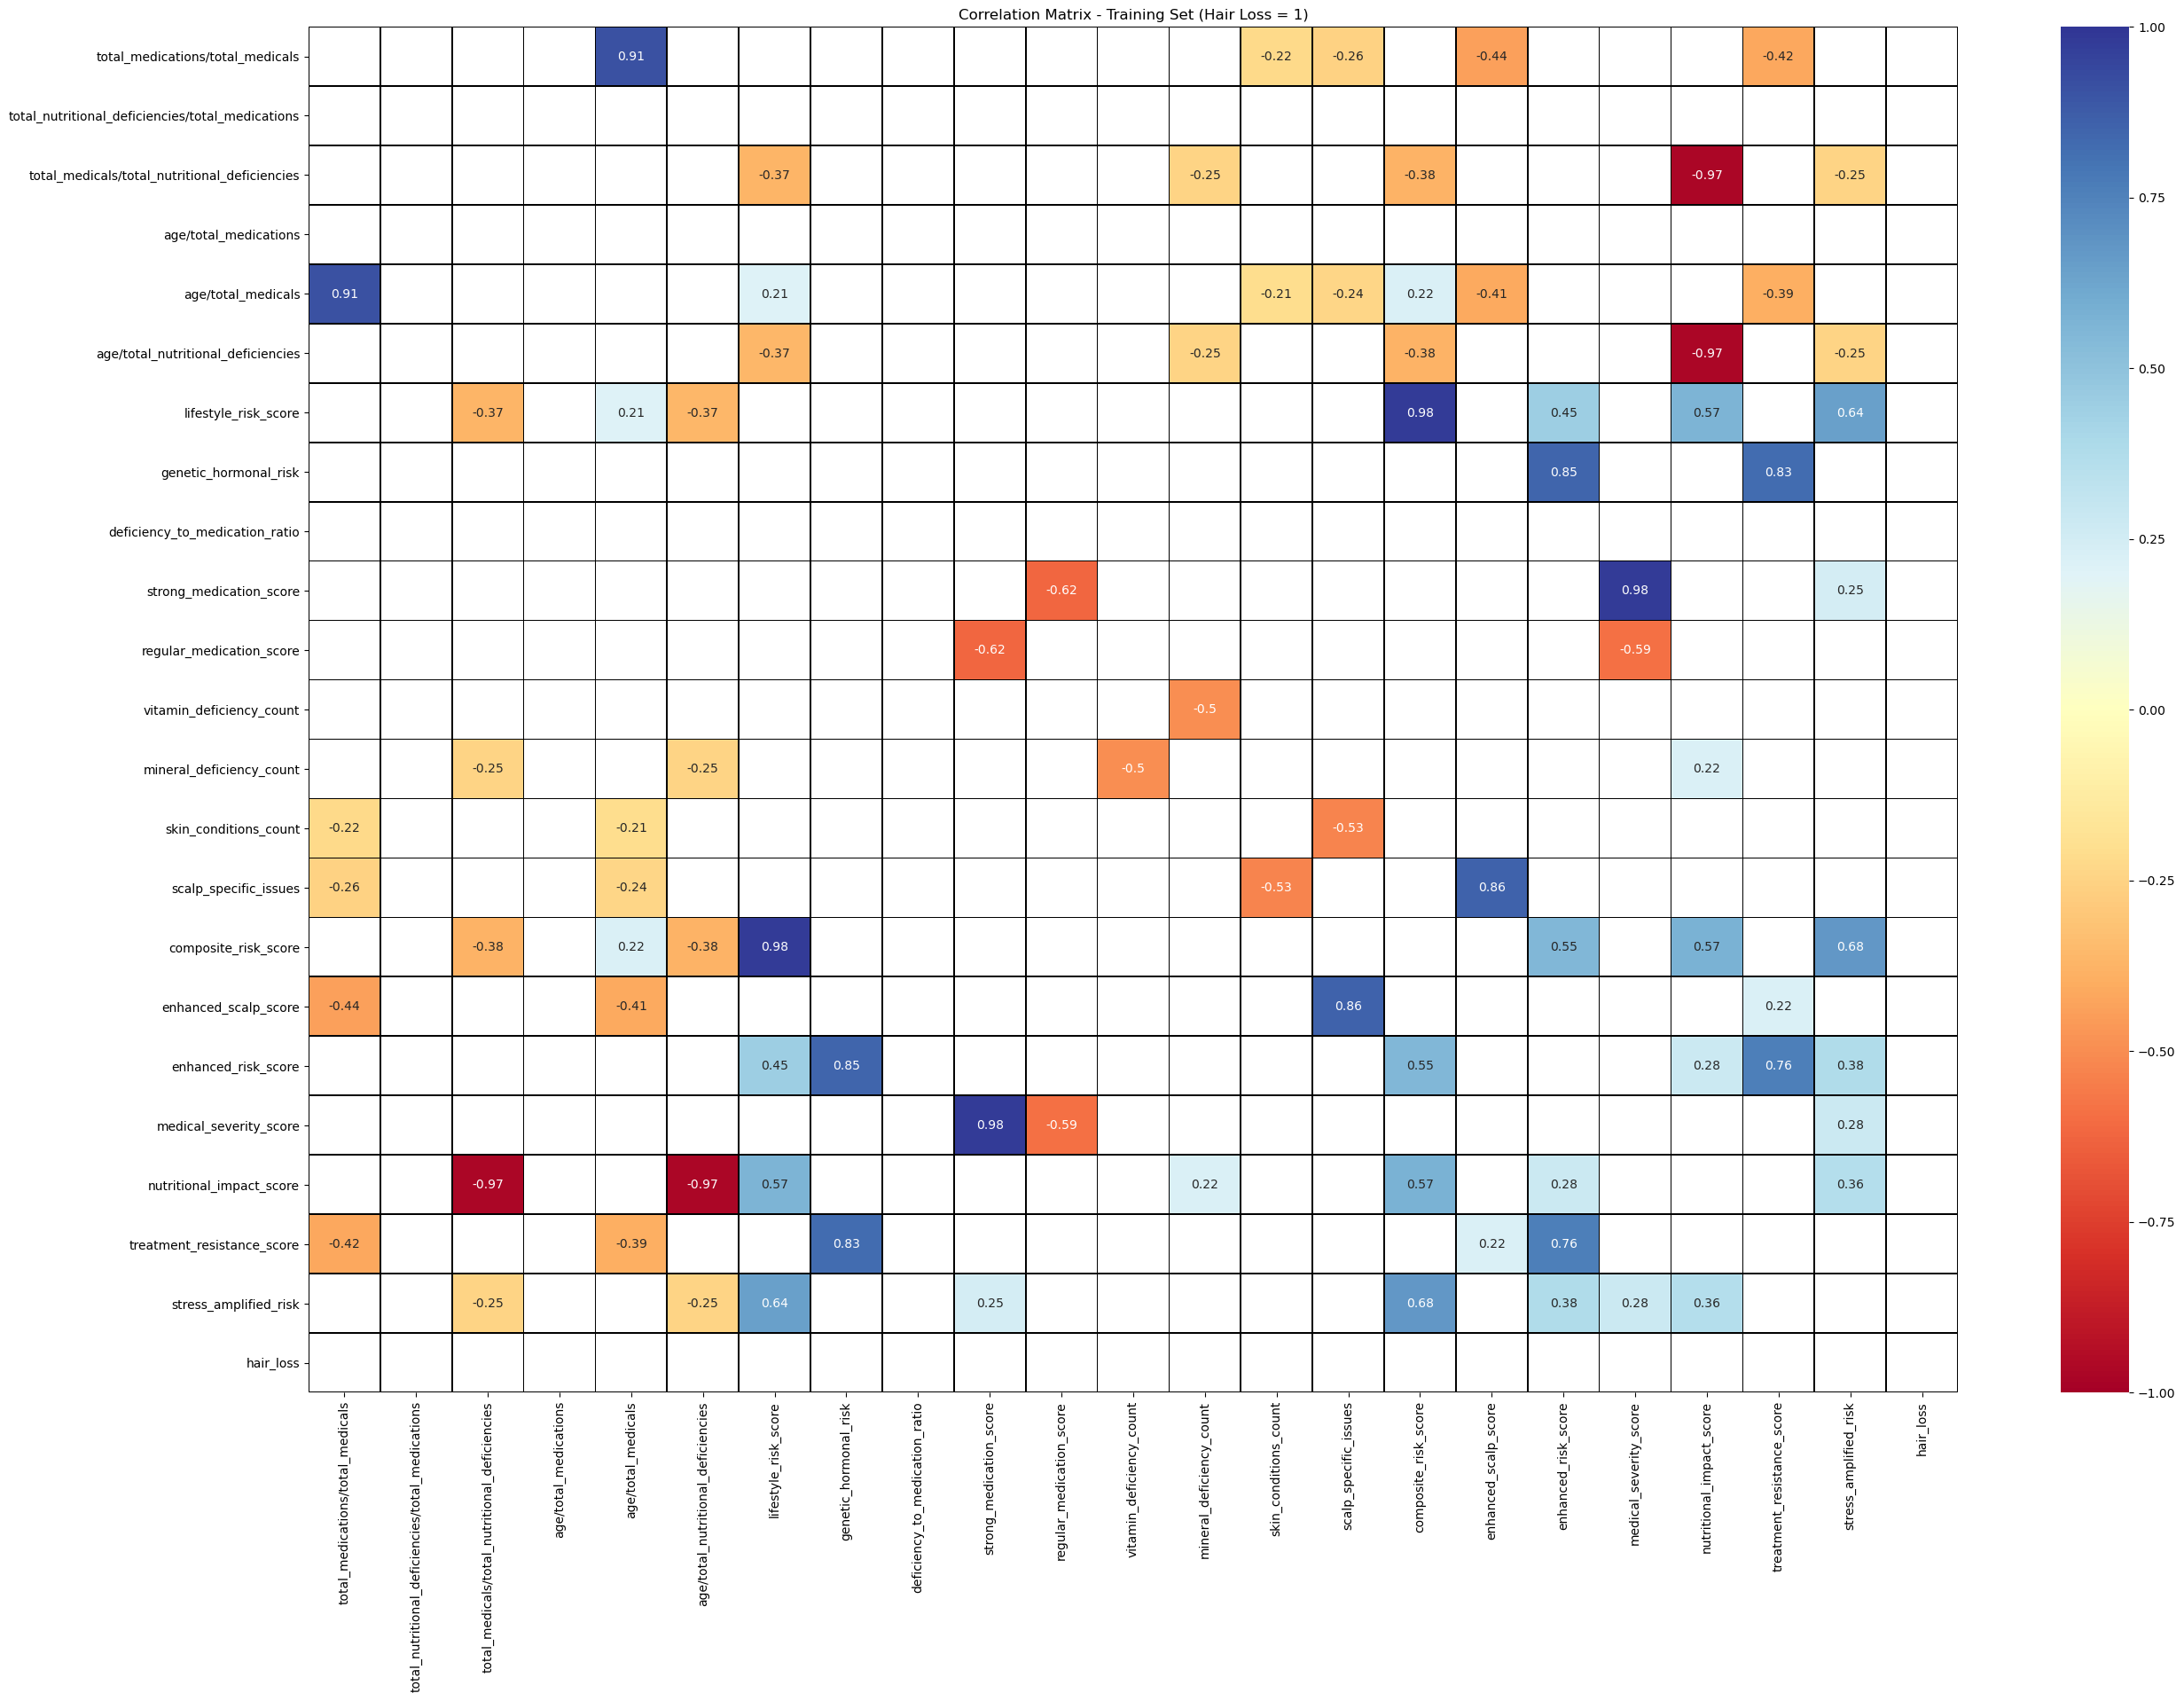

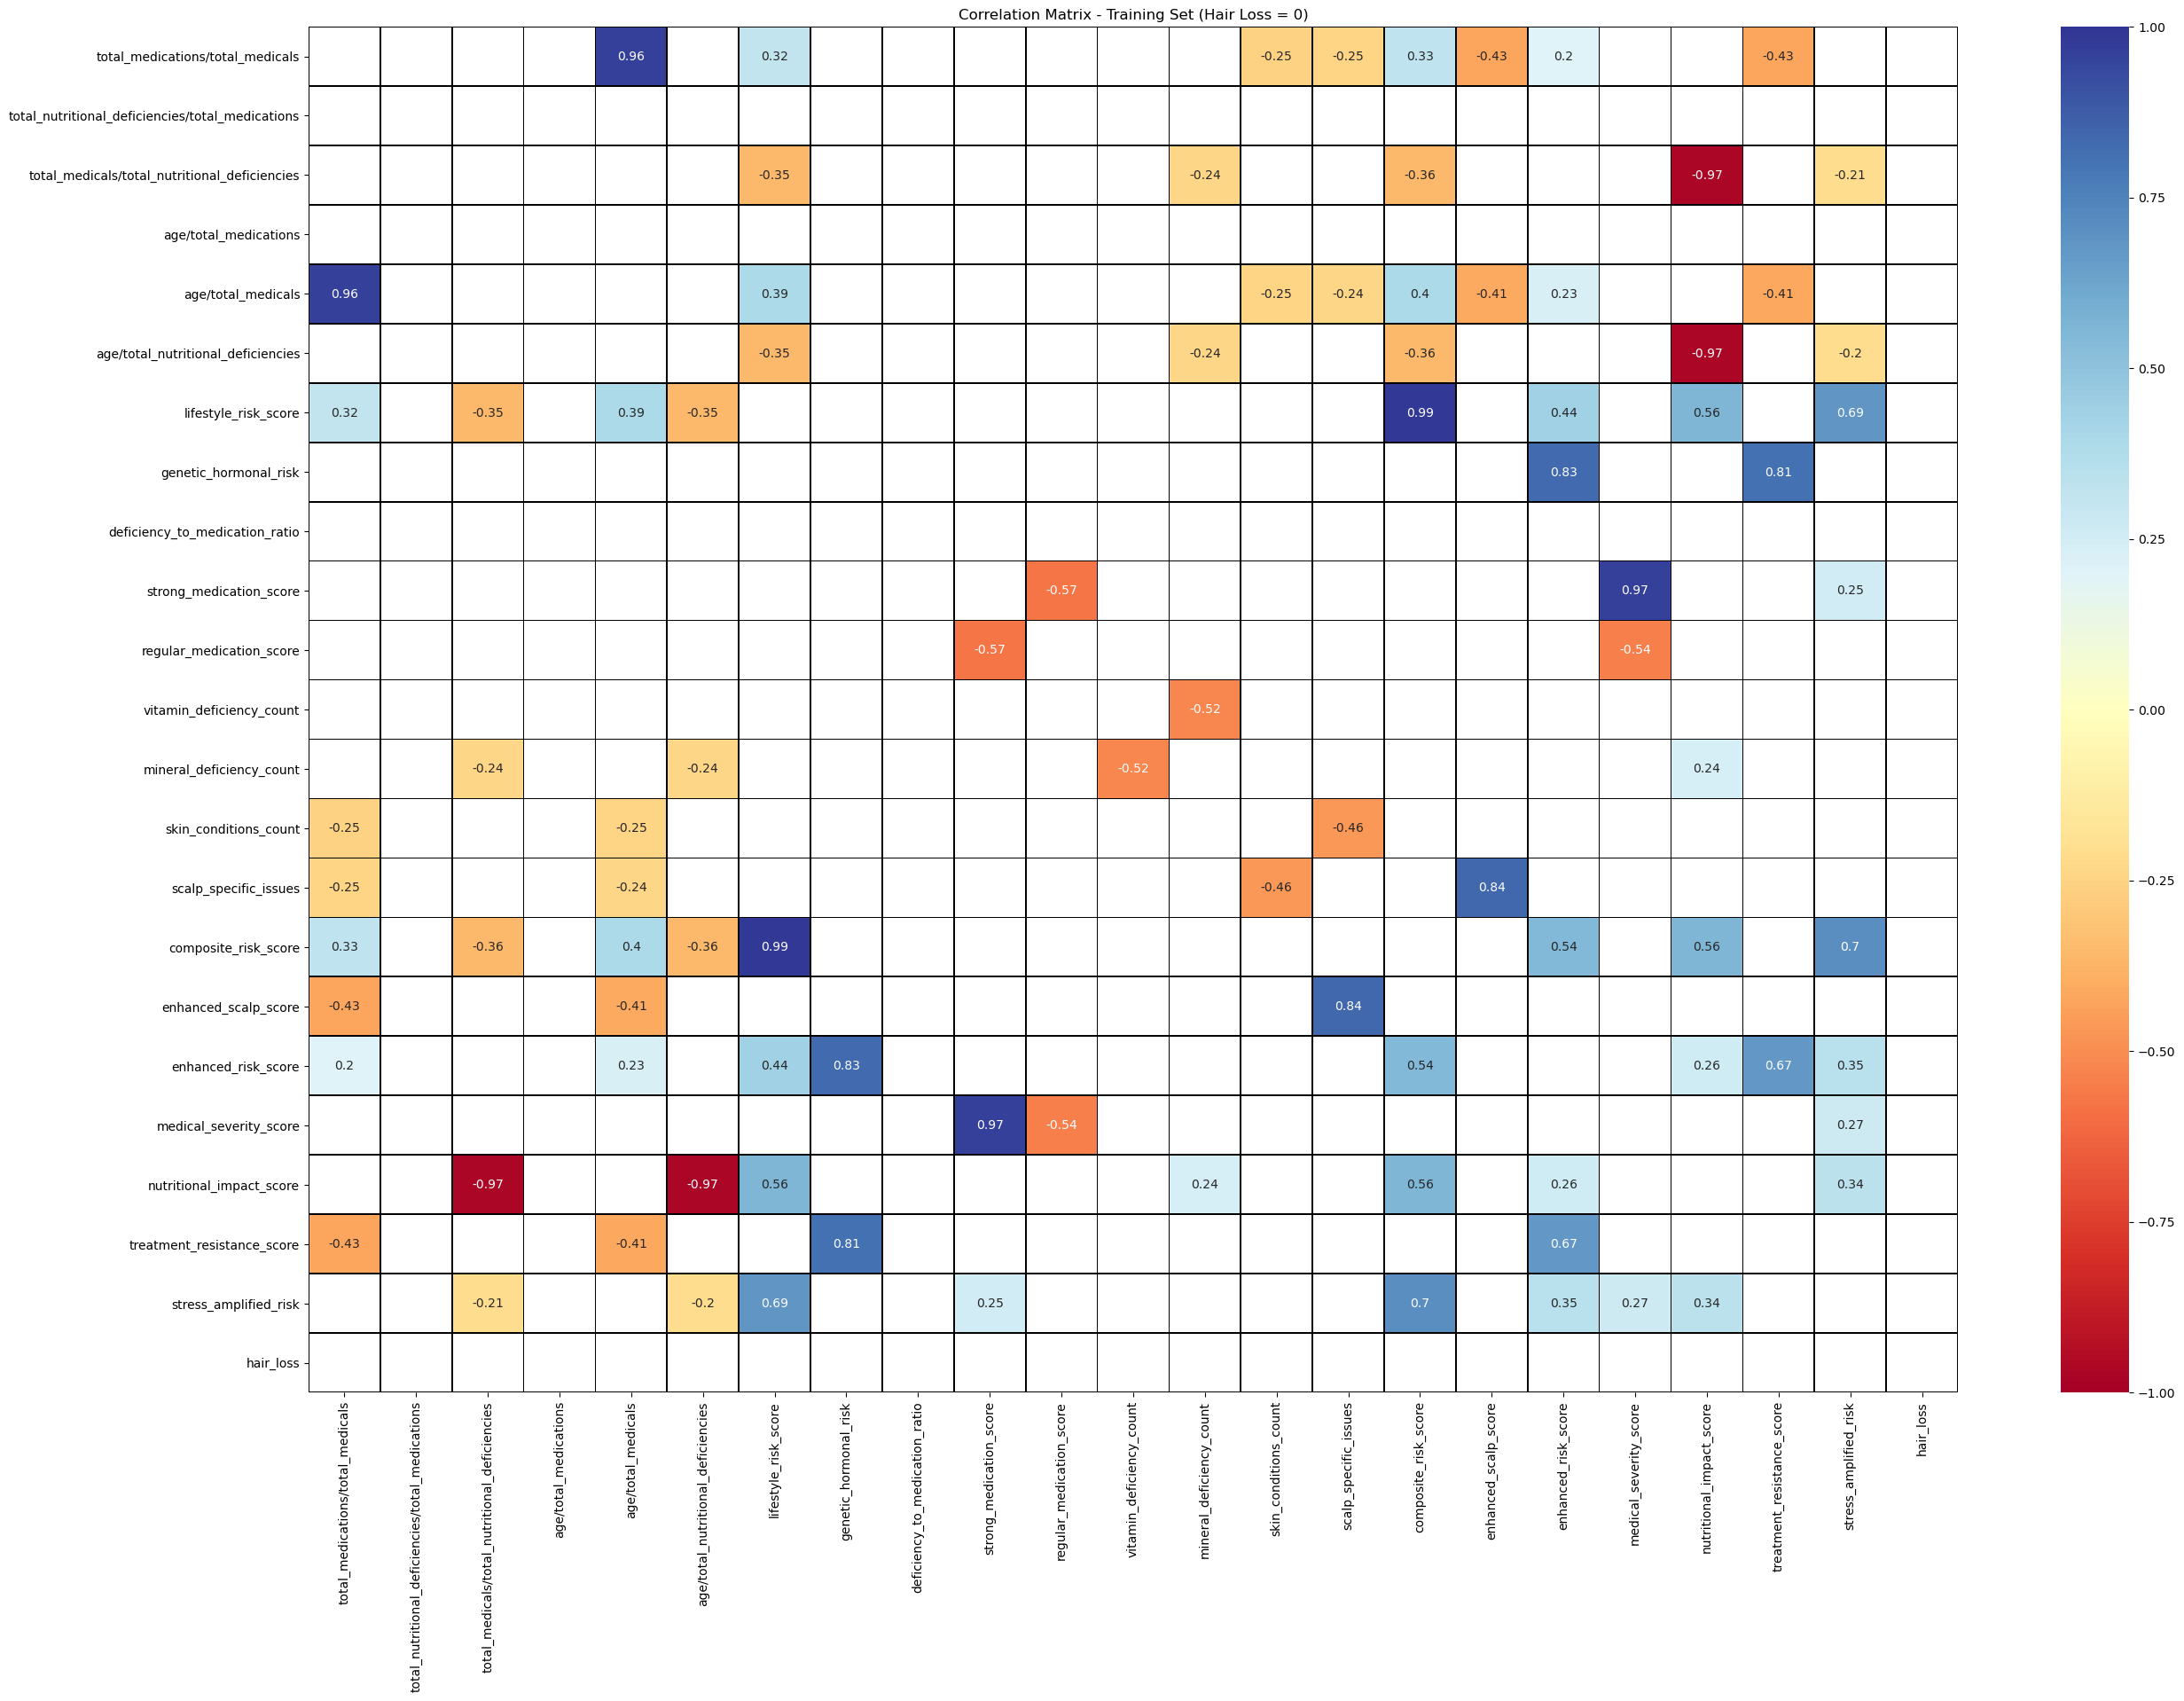

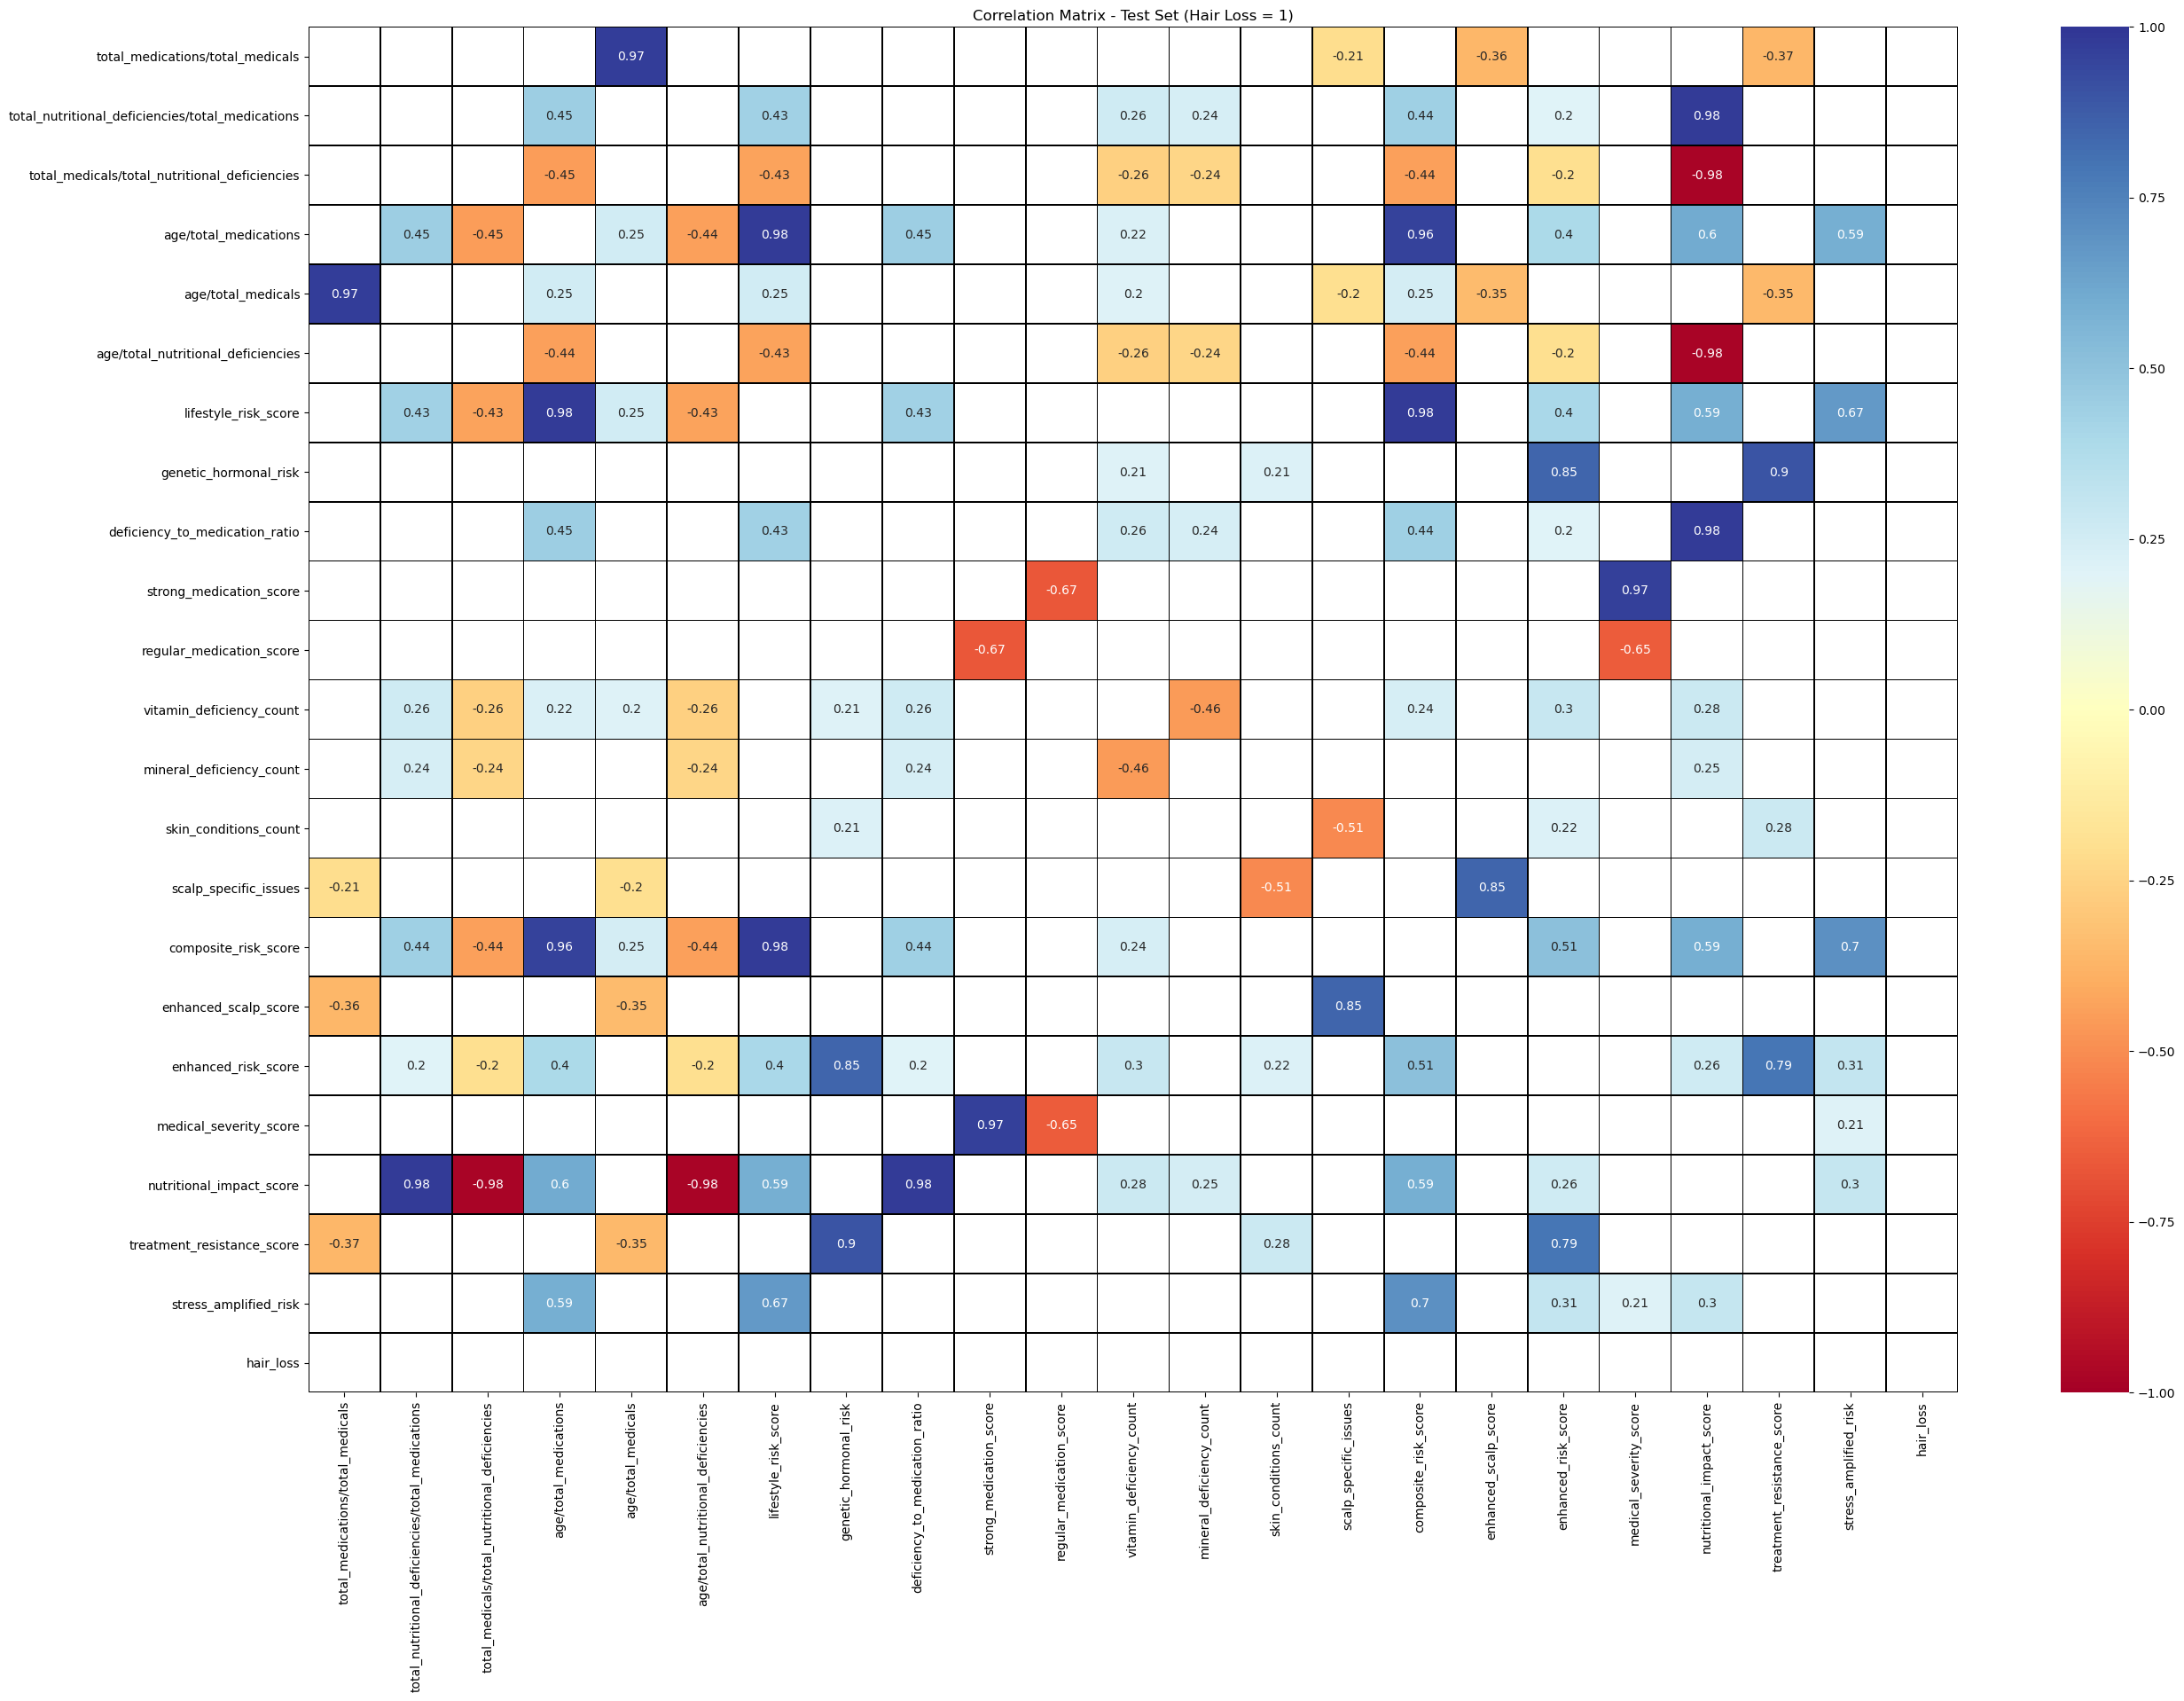

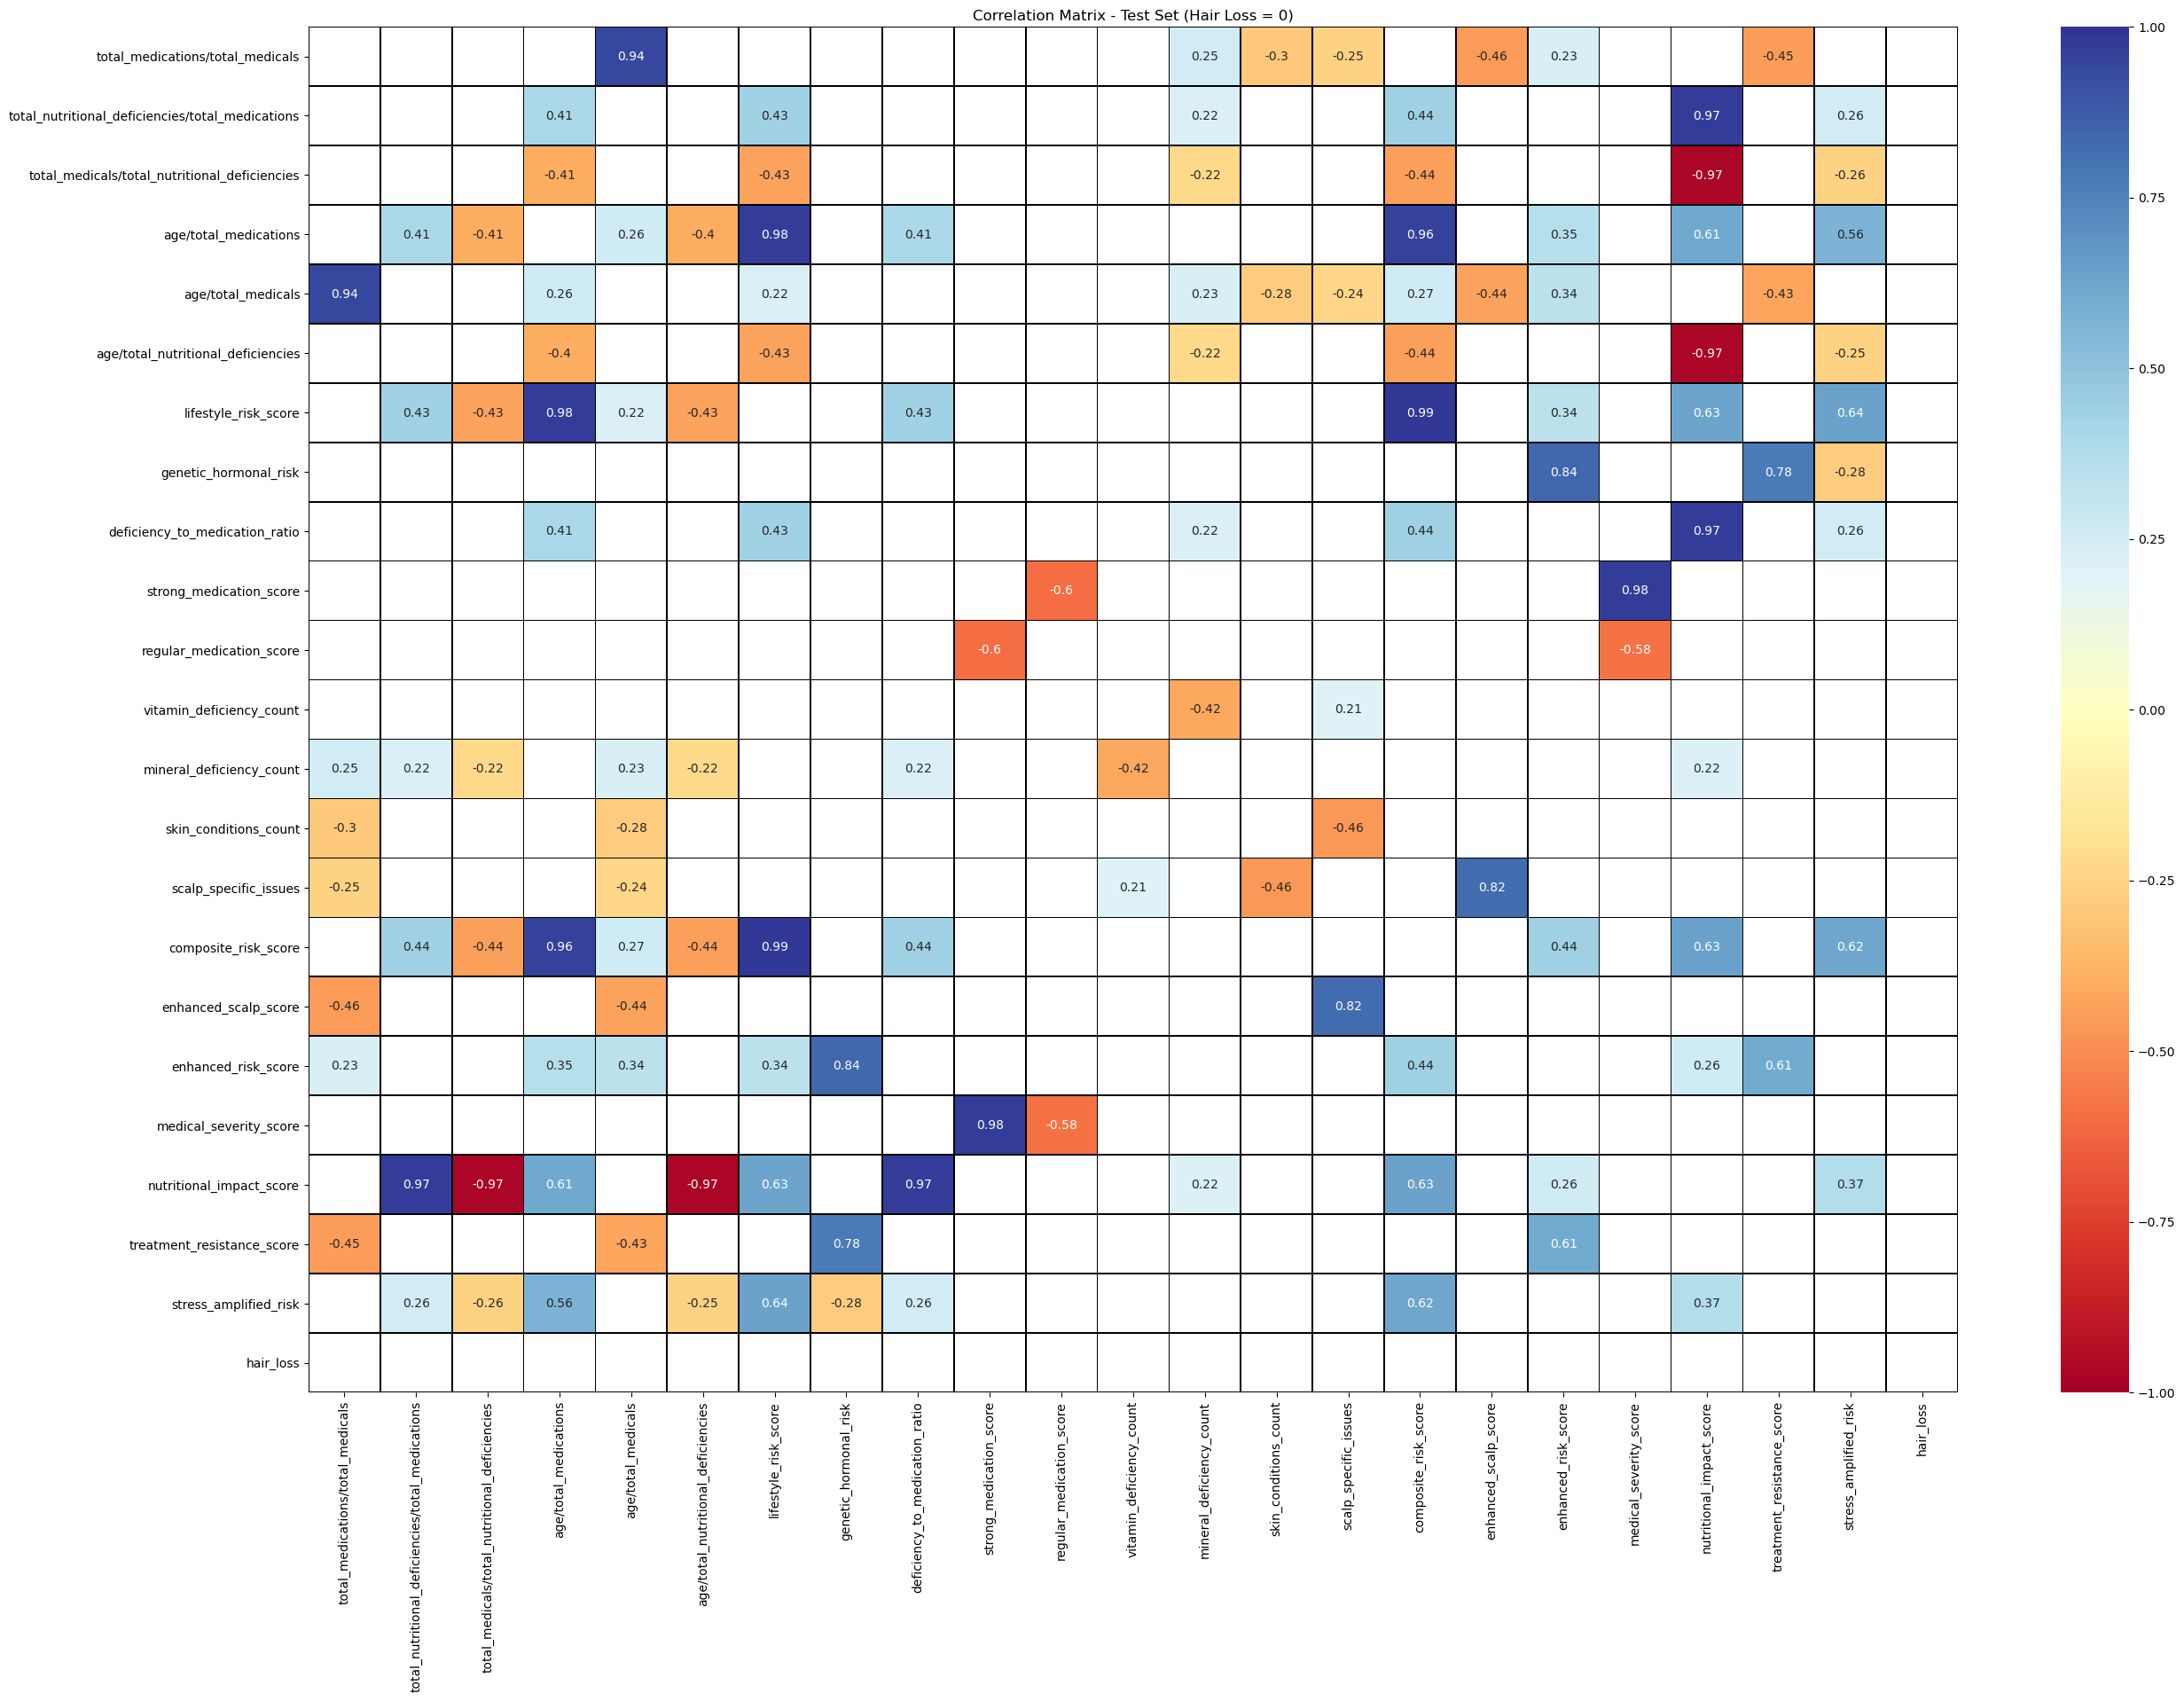

In [179]:
# Training set - Hair Loss = 1
train_hairloss = train_data_scaled[train_data_scaled['hair_loss'] == 1]
plt.figure(figsize=(30, 20))
corr_matrix = train_hairloss.corr()
mask = (abs(corr_matrix) >= 0.2) & (abs(corr_matrix) <= 0.99)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1, mask=~mask, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix - Training Set (Hair Loss = 1)')
plt.show()

# Training set - Hair Loss = 0 
train_no_hairloss = train_data_scaled[train_data_scaled['hair_loss'] == 0]
plt.figure(figsize=(30, 20))
corr_matrix = train_no_hairloss.corr()
mask = (abs(corr_matrix) >= 0.2) & (abs(corr_matrix) <= 0.99)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1, mask=~mask, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix - Training Set (Hair Loss = 0)')
plt.show()

# Test set - Hair Loss = 1
test_hairloss = test_data_scaled[test_data_scaled['hair_loss'] == 1]
plt.figure(figsize=(30, 20))
corr_matrix = test_hairloss.corr()
mask = (abs(corr_matrix) >= 0.2) & (abs(corr_matrix) <= 0.99)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1, mask=~mask, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix - Test Set (Hair Loss = 1)')
plt.show()

# Test set - Hair Loss = 0
test_no_hairloss = test_data_scaled[test_data_scaled['hair_loss'] == 0]
plt.figure(figsize=(30, 20))
corr_matrix = test_no_hairloss.corr()
mask = (abs(corr_matrix) >= 0.2) & (abs(corr_matrix) <= 0.99)
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1, mask=~mask, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix - Test Set (Hair Loss = 0)')
plt.show()

In [161]:
# using ml_data_one_hot_ver columns
# calculate meaningful new features such as ratios like total_medications/total_medicals, total_nutritional_deficiencies/total_medications, total_medicals/total_nutritional_deficiencies
# risk scores such as lifestyle_risk_score, genetic_hormonal_risk, deficiency_to_medication_ratio, composite_risk_score
# impacts such as strong_medication_score, regular_medication_score
# proportions such as vitamin_deficiency_count, mineral_deficiency_count, skin_conditions_count, scalp_specific_issues_count
# add you related columns like that
# please save the new dataset as ml_data_one_hot_ver_calc with hair loss column

ml_data_one_hot_ver_calc = pd.DataFrame()

# Calculate new features

# Copy hair loss column
ml_data_one_hot_ver_calc['hair_loss'] = ml_data_one_hot_ver['Hair Loss']

# Calculate ratios
ml_data_one_hot_ver_calc['total_medications/total_medicals'] = ml_data_one_hot_ver['total_medications'] / (ml_data_one_hot_ver['total_medicals'] + 1e-5)
ml_data_one_hot_ver_calc['total_nutritional_deficiencies/total_medications'] = ml_data_one_hot_ver['total_nutritional_deficiencies'] / (ml_data_one_hot_ver['total_medications'] + 1e-5)
ml_data_one_hot_ver_calc['total_medicals/total_nutritional_deficiencies'] = ml_data_one_hot_ver['total_medicals'] / (ml_data_one_hot_ver['total_nutritional_deficiencies'] + 1e-5)
# please add a ratio with age
ml_data_one_hot_ver_calc['age/total_medications'] = ml_data_one_hot_ver['Age'] / (ml_data_one_hot_ver['total_medications'] + 1e-5)
ml_data_one_hot_ver_calc['age/total_medicals'] = ml_data_one_hot_ver['Age'] / (ml_data_one_hot_ver['total_medicals'] + 1e-5)
ml_data_one_hot_ver_calc['age/total_nutritional_deficiencies'] = ml_data_one_hot_ver['Age'] / (ml_data_one_hot_ver['total_nutritional_deficiencies'] + 1e-5)

# Calculate risk scores
ml_data_one_hot_ver_calc['lifestyle_risk_score'] = (ml_data_one_hot_ver['Poor Hair Care Habits'].astype(int) * 3 + 
                                                   ml_data_one_hot_ver['Environmental Factors'].astype(int) * 4 +
                                                   ml_data_one_hot_ver['Smoking'].astype(int) * 5 + 
                                                   ml_data_one_hot_ver['Weight Loss'].astype(int) * 3 +
                                                   ml_data_one_hot_ver['Age'].astype(int) * 2 +
                                                   ml_data_one_hot_ver['low'].astype(int) * 1 +
                                                   ml_data_one_hot_ver['moderate'].astype(int) * 3 +
                                                   ml_data_one_hot_ver['high'].astype(int) * 5)

ml_data_one_hot_ver_calc['genetic_hormonal_risk'] = (ml_data_one_hot_ver['Genetics'].astype(int) * 4+ 
                                                    ml_data_one_hot_ver['Hormonal Changes'].astype(int)* 3)

ml_data_one_hot_ver_calc['deficiency_to_medication_ratio'] = (ml_data_one_hot_ver['total_nutritional_deficiencies'] / 
                                                             (ml_data_one_hot_ver['total_medications'] + 1e-5))

# Calculate medication impact scores
ml_data_one_hot_ver_calc['strong_medication_score'] = (ml_data_one_hot_ver['chemotherapy'].astype(int) * 2 + 
                                                      ml_data_one_hot_ver['accutane'].astype(int) * 3 +
                                                      ml_data_one_hot_ver['steroids'].astype(int) * 5 +
                                                      ml_data_one_hot_ver['high'].astype(int) * 2)

ml_data_one_hot_ver_calc['regular_medication_score'] = (ml_data_one_hot_ver['antibiotics'].astype(int) * 4 + 
                                                       ml_data_one_hot_ver['antidepressants'].astype(int) * 3 +
                                                       ml_data_one_hot_ver['blood pressure medication'].astype(int) * 4 +
                                                       ml_data_one_hot_ver['heart medication'].astype(int) * 4 + 
                                                       ml_data_one_hot_ver['low'].astype(int) * 2 +
                                                       ml_data_one_hot_ver['moderate'].astype(int) * 3)

# Calculate deficiency counts
ml_data_one_hot_ver_calc['vitamin_deficiency_count'] = (ml_data_one_hot_ver['vitamin a deficiency'].astype(int) * 2 +
                                                       ml_data_one_hot_ver['vitamin d deficiency'].astype(int) * 4 +
                                                       ml_data_one_hot_ver['vitamin e deficiency'].astype(int) * 4)

ml_data_one_hot_ver_calc['mineral_deficiency_count'] = (ml_data_one_hot_ver['magnesium deficiency'].astype(int) * 4 +
                                                        ml_data_one_hot_ver['biotin deficiency'].astype(int) * 5 +
                                                       ml_data_one_hot_ver['iron deficiency'].astype(int) * 2 +
                                                       ml_data_one_hot_ver['selenium deficiency'].astype(int) * 2 +
                                                       ml_data_one_hot_ver['zinc deficiency'].astype(int) * 4)

ml_data_one_hot_ver_calc['skin_conditions_count'] = (ml_data_one_hot_ver['eczema'].astype(int) * 2 +
                                                    ml_data_one_hot_ver['dermatosis'].astype(int) * 3 + 
                                                    ml_data_one_hot_ver['psoriasis'].astype(int) * 4 +
                                                    ml_data_one_hot_ver['dermatitis'].astype(int) * 2)

ml_data_one_hot_ver_calc['scalp_specific_issues'] = (ml_data_one_hot_ver['alopecia areata'].astype(int) * 4 +
                                                    ml_data_one_hot_ver['scalp infection'].astype(int) * 3 + 
                                                    ml_data_one_hot_ver['seborrheic dermatitis'].astype(int) * 2 +
                                                    ml_data_one_hot_ver['androgenetic alopecia'].astype(int) * 5)

# Calculate composite risk score
ml_data_one_hot_ver_calc['composite_risk_score'] = (ml_data_one_hot_ver_calc['genetic_hormonal_risk'] * 0.2 +
                                                   ml_data_one_hot_ver_calc['strong_medication_score'] * 0.2 + 
                                                   ml_data_one_hot_ver_calc['lifestyle_risk_score'] * 0.2 +
                                                   ml_data_one_hot_ver_calc['vitamin_deficiency_count'] * 0.1 +
                                                   ml_data_one_hot_ver_calc['mineral_deficiency_count'] * 0.1 +
                                                   ml_data_one_hot_ver['low'].astype(int) * 0.05 +
                                                   ml_data_one_hot_ver['moderate'].astype(int) * 0.07 +
                                                   ml_data_one_hot_ver['high'].astype(int) * 0.08)

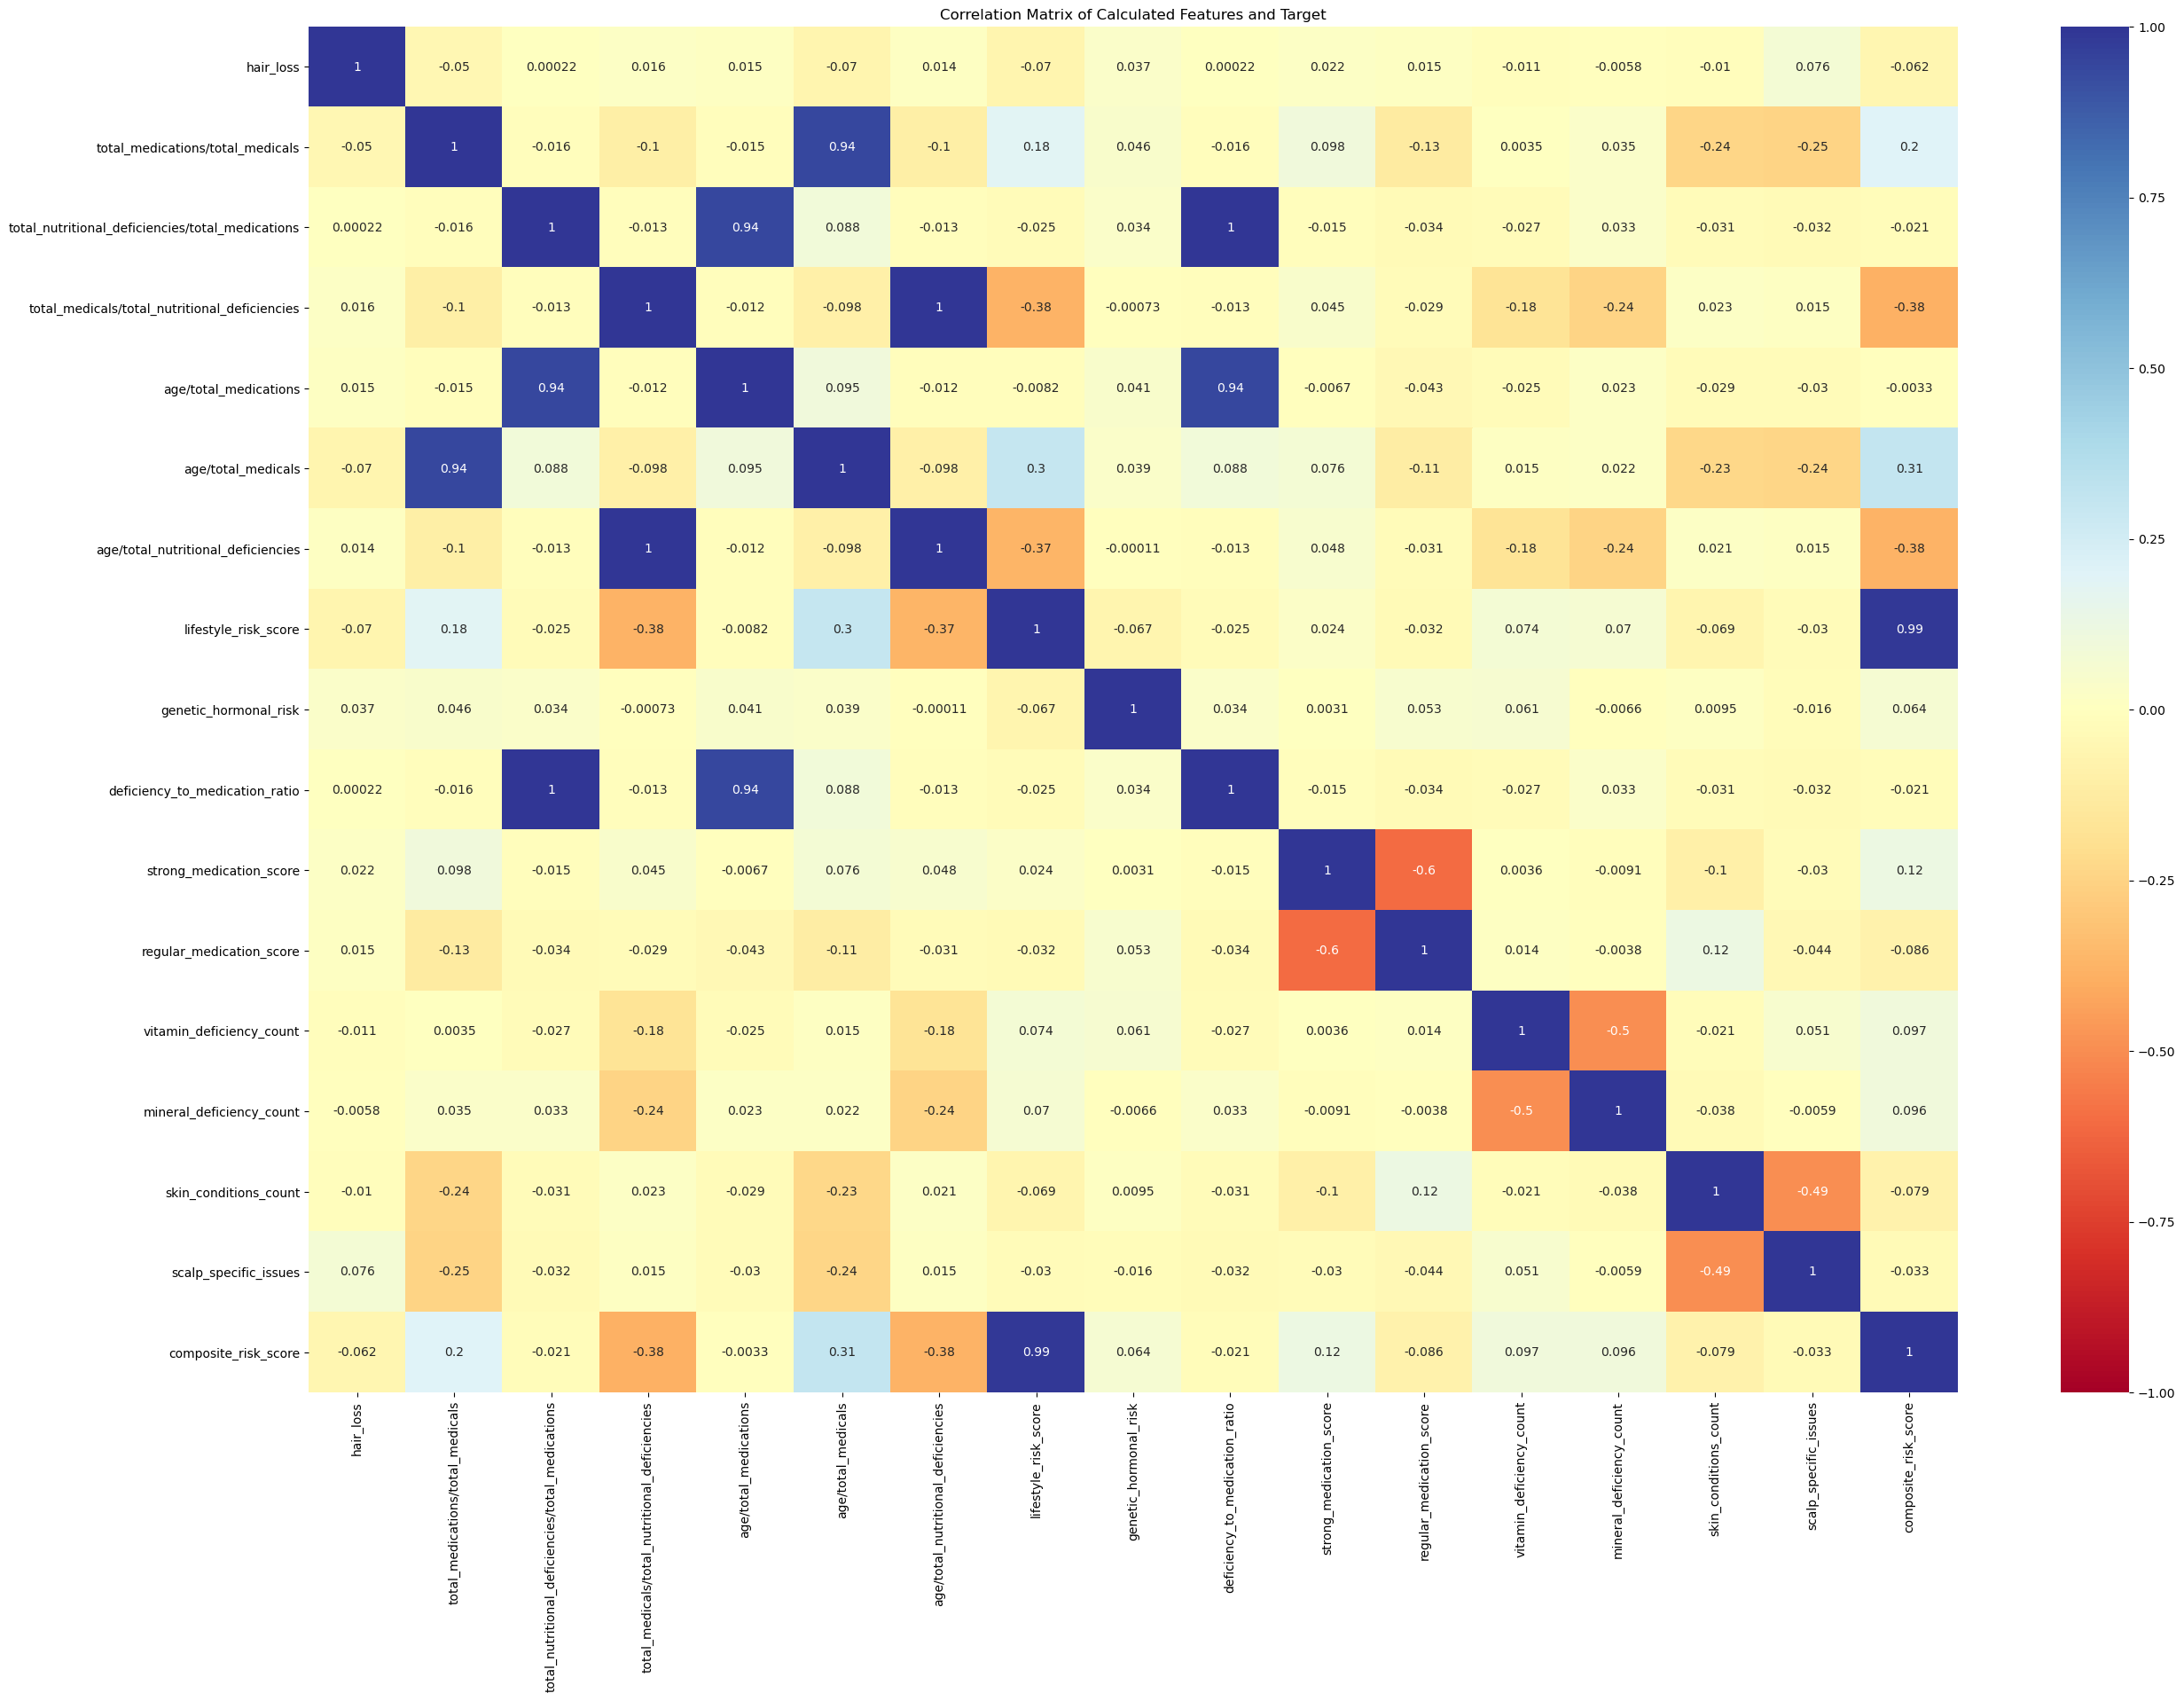

In [162]:
# now, check correlations of ml_data_one_hot_ver_calc with heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(ml_data_one_hot_ver_calc.corr(), annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Calculated Features and Target')
plt.show()

In [168]:
# 1. Improve Scalp-Related Features (highest correlation among current features)
ml_data_one_hot_ver_calc['enhanced_scalp_score'] = (
    3.0 * ml_data_one_hot_ver_calc['scalp_specific_issues'] +  # Already shows better correlation
    2.0 * ml_data_one_hot_ver_calc['skin_conditions_count'] +
    ml_data_one_hot_ver['Poor Hair Care Habits'] * 
    (1 + ml_data_one_hot_ver['Environmental Factors'])  # Multiplicative interaction
)

# 2. Enhanced Risk Score with Interaction Terms
ml_data_one_hot_ver_calc['enhanced_risk_score'] = (
    3.0 * ml_data_one_hot_ver['Genetics'] * ml_data_one_hot_ver['Hormonal Changes'] +  # Interaction between key factors
    2.0 * ml_data_one_hot_ver['Age'] * ml_data_one_hot_ver_calc['genetic_hormonal_risk'] +
    1.5 * ml_data_one_hot_ver_calc['lifestyle_risk_score']
)

# 3. Medical Impact Score with Conditional Effects
ml_data_one_hot_ver_calc['medical_severity_score'] = (
    3.0 * (ml_data_one_hot_ver['total_medicals'] * ml_data_one_hot_ver['total_medications']) +
    2.0 * ml_data_one_hot_ver_calc['strong_medication_score'] * 
    (1 + ml_data_one_hot_ver['total_nutritional_deficiencies'])
)

# 4. Nutritional Impact with Synergistic Effects
ml_data_one_hot_ver_calc['nutritional_impact_score'] = (
    2.0 * ml_data_one_hot_ver_calc['mineral_deficiency_count'] * 
    ml_data_one_hot_ver_calc['vitamin_deficiency_count'] +
    1.5 * ml_data_one_hot_ver['total_nutritional_deficiencies'] * 
    (1 + ml_data_one_hot_ver['Age']/100)  # Age-weighted deficiency impact
)

# 5. Treatment Resistance Score
ml_data_one_hot_ver_calc['treatment_resistance_score'] = (
    ml_data_one_hot_ver_calc['genetic_hormonal_risk'] * 
    ml_data_one_hot_ver['total_medicals'] * 
    (1 + ml_data_one_hot_ver['Age']/50)
)

# 6. Stress-Amplified Risk
ml_data_one_hot_ver_calc['stress_amplified_risk'] = (
    ml_data_one_hot_ver_calc['composite_risk_score'] * 
    (1 + ml_data_one_hot_ver[['high', 'moderate']].sum(axis=1))
)

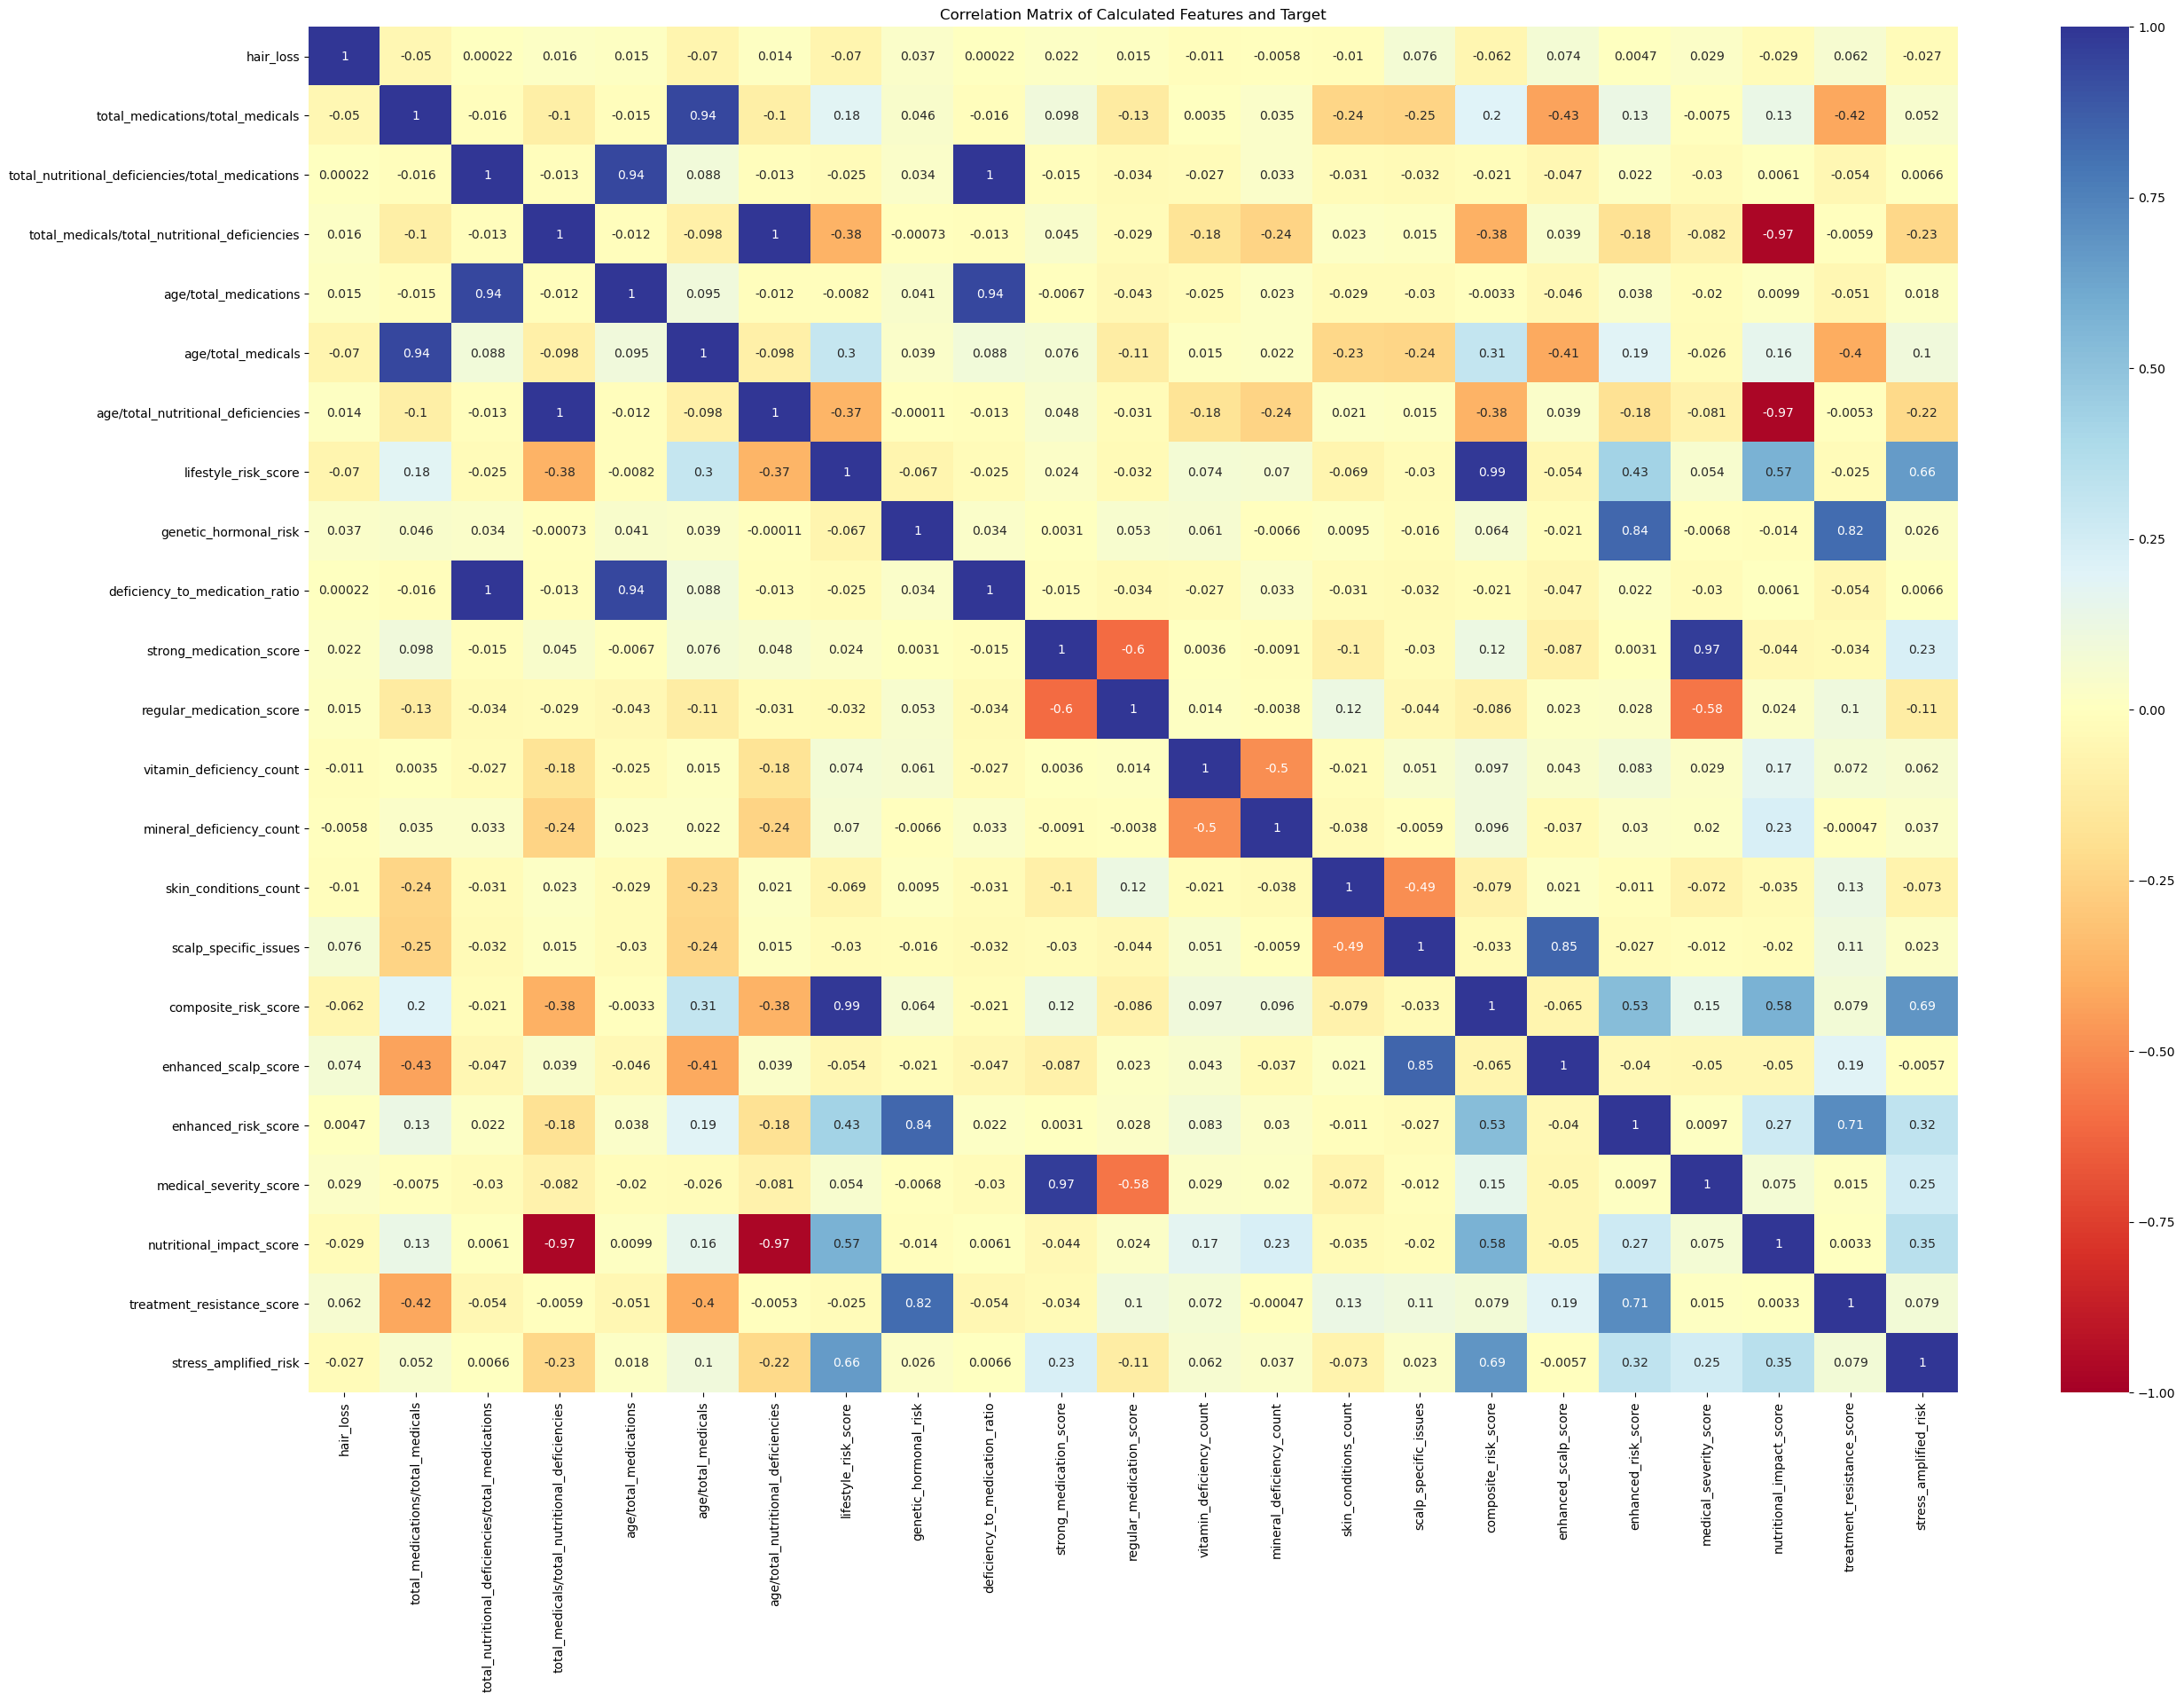

In [169]:
# now, check correlations of ml_data_one_hot_ver_calc with heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(ml_data_one_hot_ver_calc.corr(), annot=True, cmap='RdYlBu', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Calculated Features and Target')
plt.show()

In [184]:
# Binary classification using X_train_scaled and y_train with tree based models
# If some features are dependent, they have absolute 0.8 correlation, please remove one of them
# please use RandomForestClassifier and GradientBoostingClassifier and compare their results with each other
# please use cross validation score to compare their results
# please print the results and confusion matrix and classification report

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Find highly correlated features (absolute correlation > 0.8)
corr_matrix = ml_data_one_hot_ver_calc.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Create modified datasets without highly correlated features
modified_X_train_scaled = X_train_scaled.drop(columns=to_drop)
modified_X_test_scaled = X_test_scaled.drop(columns=to_drop)

# Split training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    modified_X_train_scaled, y_train, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train
)

# Initialize models
rfc = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
gbc = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=10)

# Train models with validation
rfc.fit(X_train_final, y_train_final)
gbc.fit(X_train_final, y_train_final)

# Validation scores
rfc_val_score = rfc.score(X_val, y_val)
gbc_val_score = gbc.score(X_val, y_val)

# Cross validation scores
rfc_cv = cross_val_score(rfc, modified_X_train_scaled, y_train, cv=5)
gbc_cv = cross_val_score(gbc, modified_X_train_scaled, y_train, cv=5)

# Make predictions
rfc_pred = rfc.predict(modified_X_test_scaled)
gbc_pred = gbc.predict(modified_X_test_scaled)

# Print results
print("Random Forest Results:")
print(f"Validation Score: {rfc_val_score:.3f}")
print(f"Cross Validation Score (mean): {rfc_cv.mean():.3f} (+/- {rfc_cv.std() * 2:.3f})")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))
print("\nClassification Report:")
print(classification_report(y_test, rfc_pred))

print("\nGradient Boosting Results:")
print(f"Validation Score: {gbc_val_score:.3f}")
print(f"Cross Validation Score (mean): {gbc_cv.mean():.3f} (+/- {gbc_cv.std() * 2:.3f})")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gbc_pred))
print("\nClassification Report:")
print(classification_report(y_test, gbc_pred))

Random Forest Results:
Validation Score: 0.531
Cross Validation Score (mean): 0.498 (+/- 0.043)

Confusion Matrix:
[[51 50]
 [48 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       101
           1       0.50      0.52      0.51        99

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200


Gradient Boosting Results:
Validation Score: 0.431
Cross Validation Score (mean): 0.502 (+/- 0.087)

Confusion Matrix:
[[54 47]
 [40 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       101
           1       0.56      0.60      0.58        99

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.57      0.56      0.56       200

